In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import os

In [3]:
def load_and_prepare_data(filename, coin_name):
    
    df = pd.read_csv(filename)

    df.rename(columns={"time_period_end": "time"}, inplace=True)

    df["time"] = pd.to_datetime(df["time"])

    df.sort_values("time", inplace=True)

    df[coin_name + "_return"] = df["price_close"].pct_change()
    
    return df[["time", coin_name + "_return"]]

In [ ]:
avax_df  = load_and_prepare_data("../Data/price_data/raw/avax_hourly.csv", "avax")
btc_df   = load_and_prepare_data("../Data/price_data/raw/btc_hourly.csv", "btc")
eth_df   = load_and_prepare_data("../Data/price_data/raw/eth_hourly.csv", "eth")
matic_df = load_and_prepare_data("../Data/price_data/raw/matic_hourly.csv", "matic")
sol_df   = load_and_prepare_data("../Data/price_data/raw/sol_hourly.csv", "sol")
bnb_df   = load_and_prepare_data("../Data/price_data/raw/bnb_hourly.csv", "bnb")
cardano_df   = load_and_prepare_data("../Data/price_data/raw/cardano_hourly.csv", "cardano")
link_df   = load_and_prepare_data("../Data/price_data/raw/link_hourly.csv", "link")
xrp_df   = load_and_prepare_data("../Data/price_data/raw/xrp_hourly.csv", "xrp")
tron_df   = load_and_prepare_data("../Data/price_data/raw/tron_hourly.csv", "tron")
arbitrum_df   = load_and_prepare_data("../Data/price_data/raw/arbitrum_hourly.csv", "arbitrum")
bch_df   = load_and_prepare_data("../Data/price_data/raw/bch_hourly.csv", "bch")

In [ ]:
avax_df.head()

In [6]:
btc_df.head()

time  btc_return
0 2015-01-14 17:00:00+00:00         NaN
1 2015-01-14 19:00:00+00:00    0.000484
2 2015-01-14 20:00:00+00:00   -0.354839
3 2015-01-15 02:00:00+00:00    0.600000
4 2015-01-15 05:00:00+00:00   -0.218750

In [7]:
eth_df.head()

time  eth_return
0 2017-08-17 05:00:00+00:00         NaN
1 2017-08-17 06:00:00+00:00    0.004940
2 2017-08-17 07:00:00+00:00   -0.001386
3 2017-08-17 08:00:00+00:00    0.017444
4 2017-08-17 09:00:00+00:00    0.002143

In [8]:
matic_df.head()

time  matic_return
0 2019-04-26 16:00:00+00:00           NaN
1 2019-04-26 17:00:00+00:00     -0.080952
2 2019-04-26 18:00:00+00:00     -0.082902
3 2019-04-26 19:00:00+00:00     -0.058380
4 2019-04-26 20:00:00+00:00     -0.010000

In [9]:
sol_df.head()

time  sol_return
0 2020-08-11 07:00:00+00:00         NaN
1 2020-08-11 08:00:00+00:00   -0.009859
2 2020-08-11 09:00:00+00:00    0.012866
3 2020-08-11 10:00:00+00:00   -0.035709
4 2020-08-11 11:00:00+00:00    0.015170

In [10]:
def plot_cumulative_return_data(df, coin_name, title='Cumulative Returns', figsize=(10, 6)):
    return_column = coin_name + "_return"
    df["cumulative_return"] = (1 + df[return_column]).cumprod() - 1

    plt.figure(figsize=figsize)
    plt.plot(df["time"], df["cumulative_return"], linestyle='-', color='b')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Cumulative Return')
    plt.grid(True)
    plt.show()


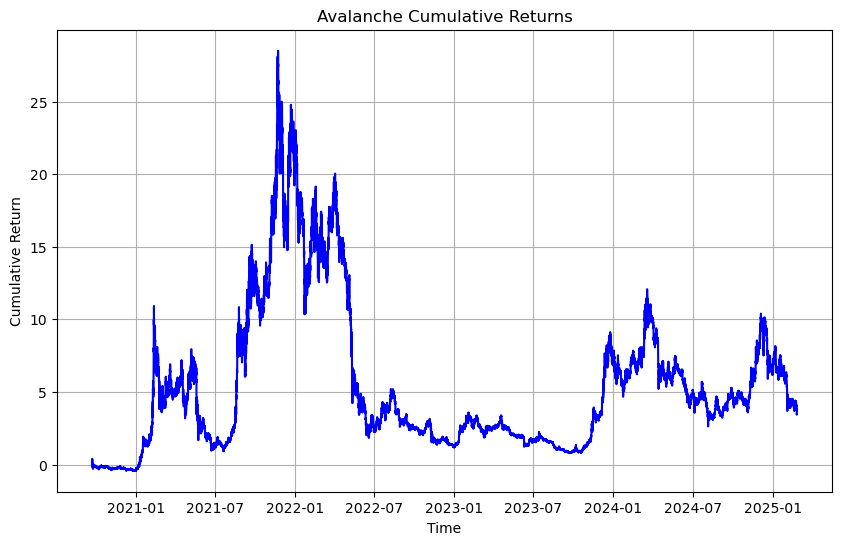

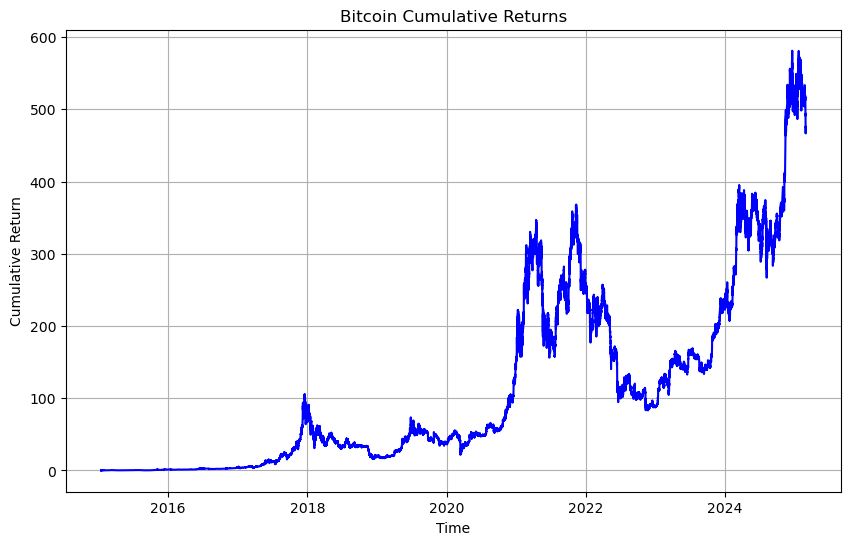

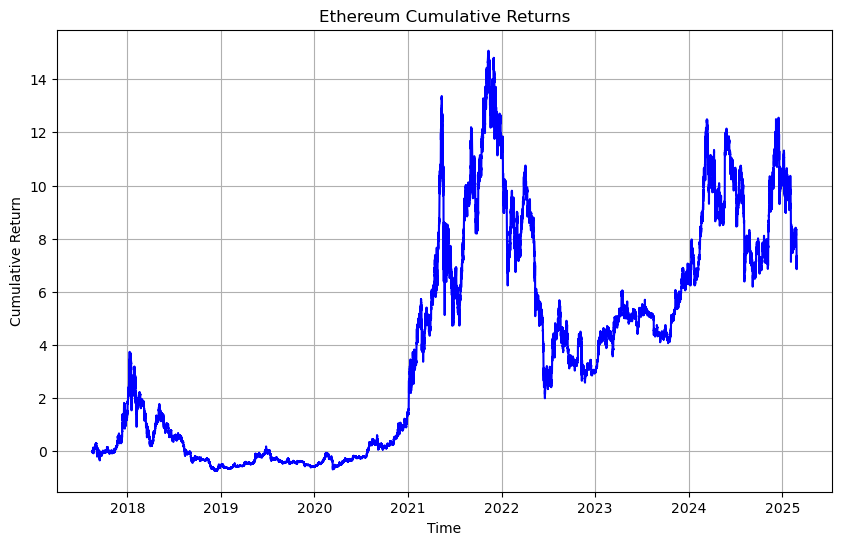

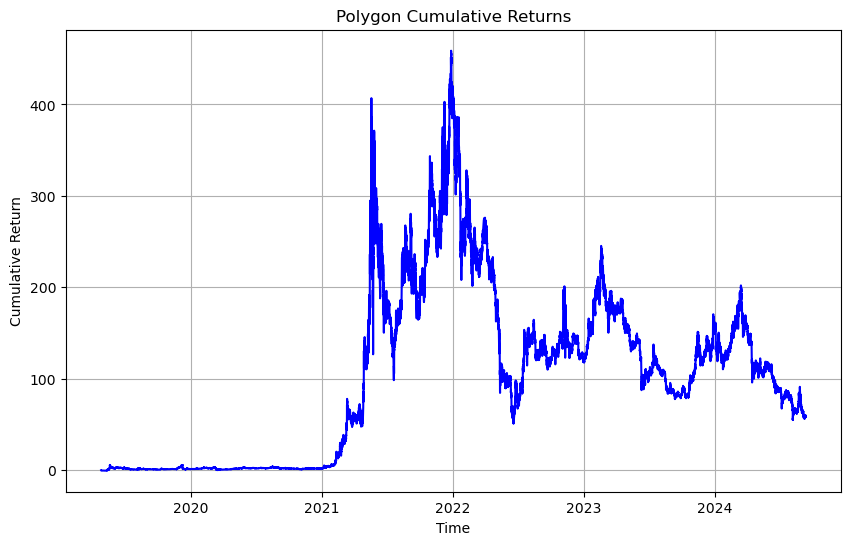

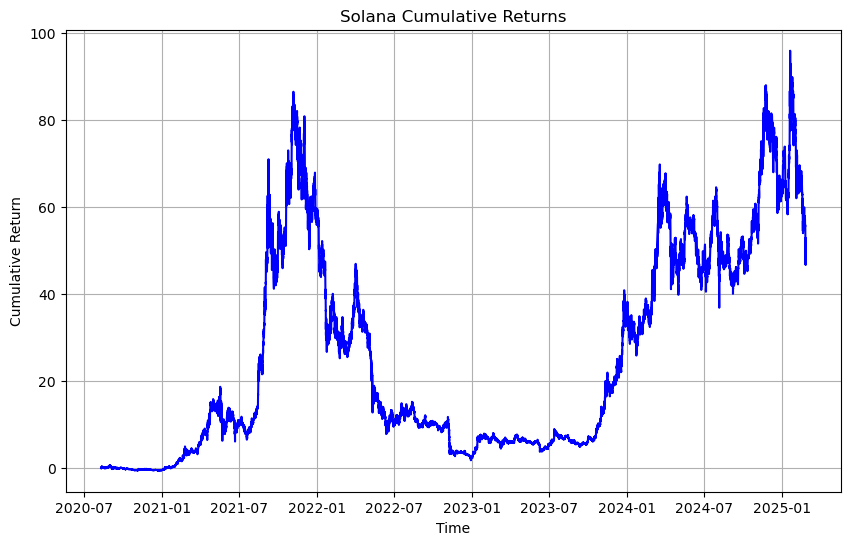

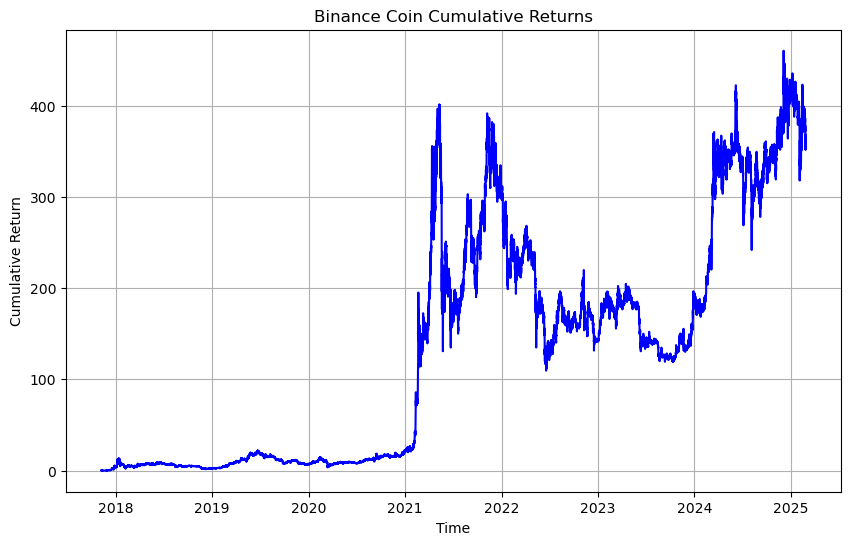

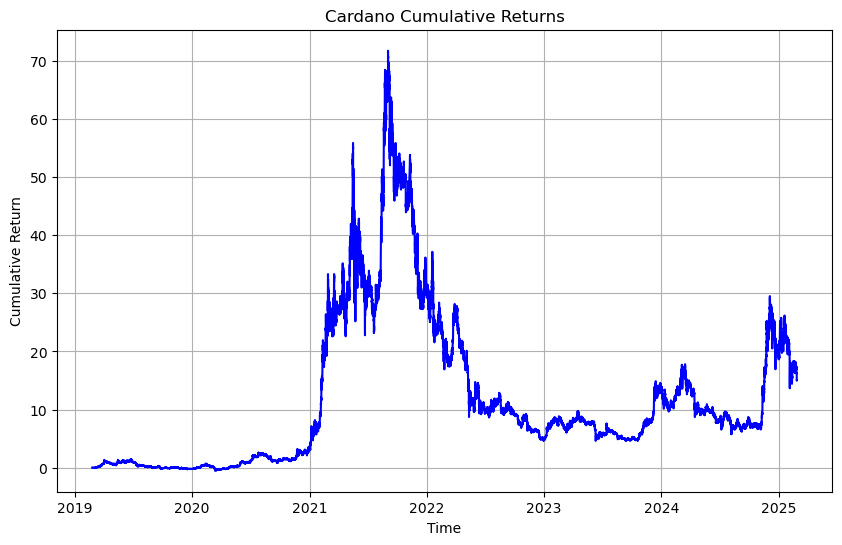

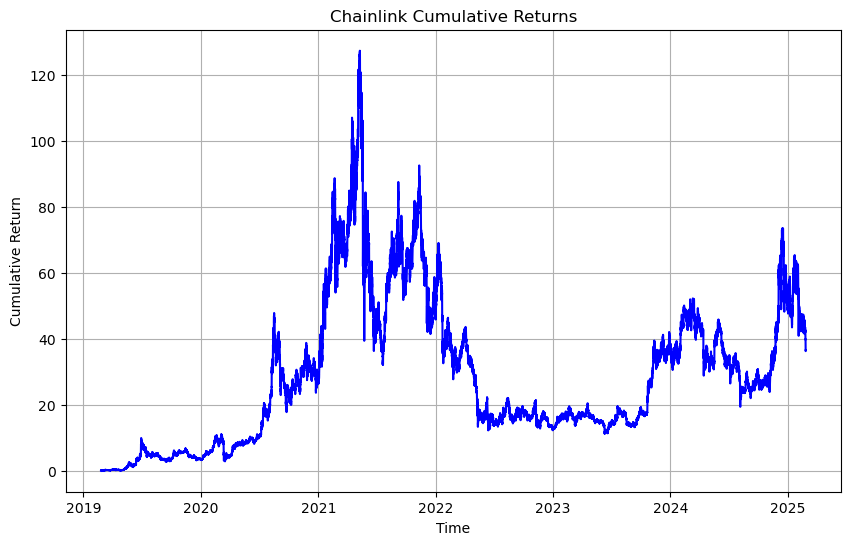

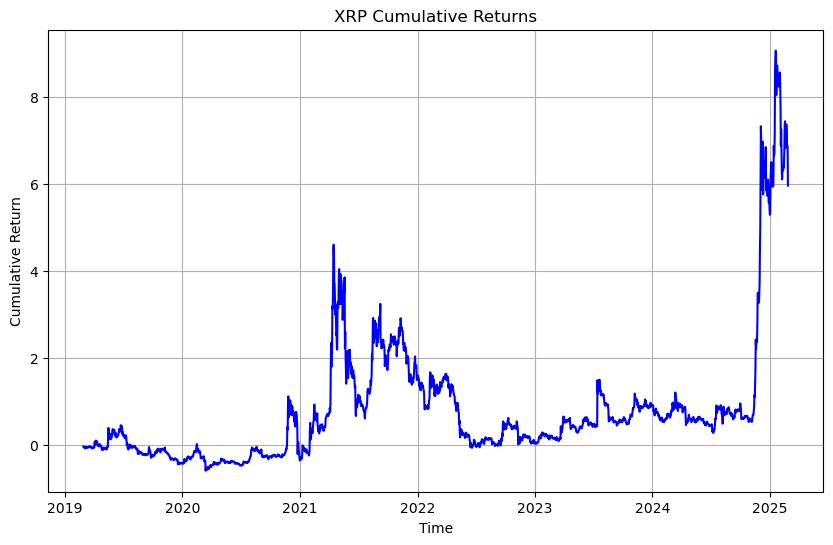

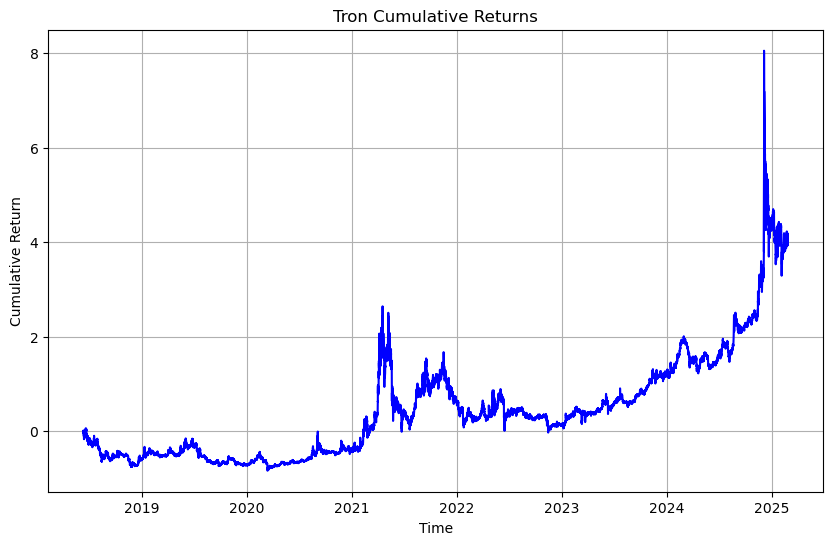

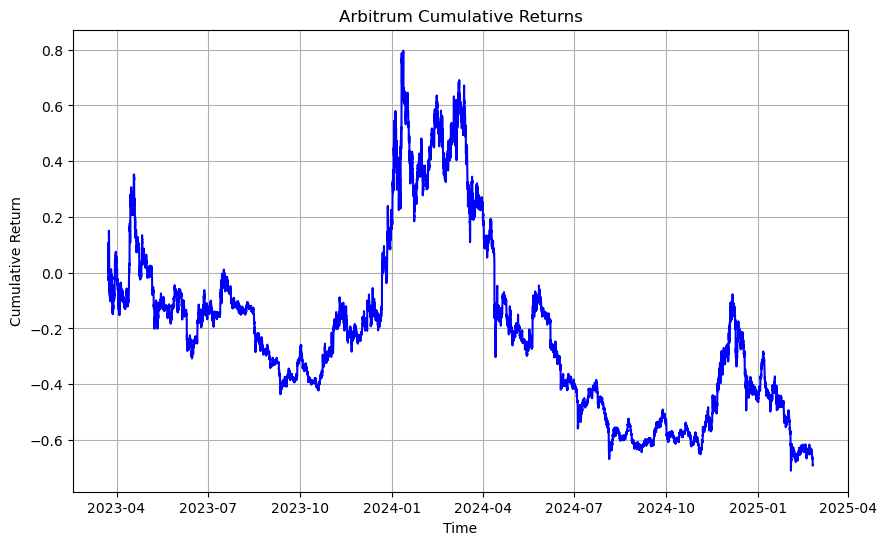

In [11]:
plot_cumulative_return_data(avax_df, "avax", title='Avalanche Cumulative Returns')
plot_cumulative_return_data(btc_df, "btc", title='Bitcoin Cumulative Returns')
plot_cumulative_return_data(eth_df, "eth", title='Ethereum Cumulative Returns')
plot_cumulative_return_data(matic_df, "matic", title='Polygon Cumulative Returns')
plot_cumulative_return_data(sol_df, "sol", title='Solana Cumulative Returns')
plot_cumulative_return_data(bnb_df, "bnb", title='Binance Coin Cumulative Returns')
plot_cumulative_return_data(cardano_df, "cardano", title='Cardano Cumulative Returns')
plot_cumulative_return_data(link_df, "link", title='Chainlink Cumulative Returns')
plot_cumulative_return_data(xrp_df, "xrp", title='XRP Cumulative Returns')
plot_cumulative_return_data(tron_df, "tron", title='Tron Cumulative Returns')
plot_cumulative_return_data(arbitrum_df, "arbitrum", title='Arbitrum Cumulative Returns')

In [12]:
def plot_return_correlations(df, return_columns=None, title='Correlation of Returns', figsize=(10, 8)):

    if return_columns is None:
        return_columns = df.columns
    
    corr_matrix = df[return_columns].corr()
    
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
    plt.title(title)
    plt.show()

In [13]:
dfs = [
    avax_df[['time', 'avax_return']],
    btc_df[['time', 'btc_return']],
    eth_df[['time', 'eth_return']],
    matic_df[['time', 'matic_return']],
    sol_df[['time', 'sol_return']],
    bnb_df[['time', 'bnb_return']],
    cardano_df[['time', 'cardano_return']],
    link_df[['time', 'link_return']],
    xrp_df[['time', 'xrp_return']],
    tron_df[['time', 'tron_return']],
    arbitrum_df[['time', 'arbitrum_return']],
    bch_df[['time', 'bch_return']]
]

all_returns_df = reduce(lambda left, right: pd.merge(left, right, on='time', how='outer'), dfs)
all_returns_df = all_returns_df.drop('time', axis=1)

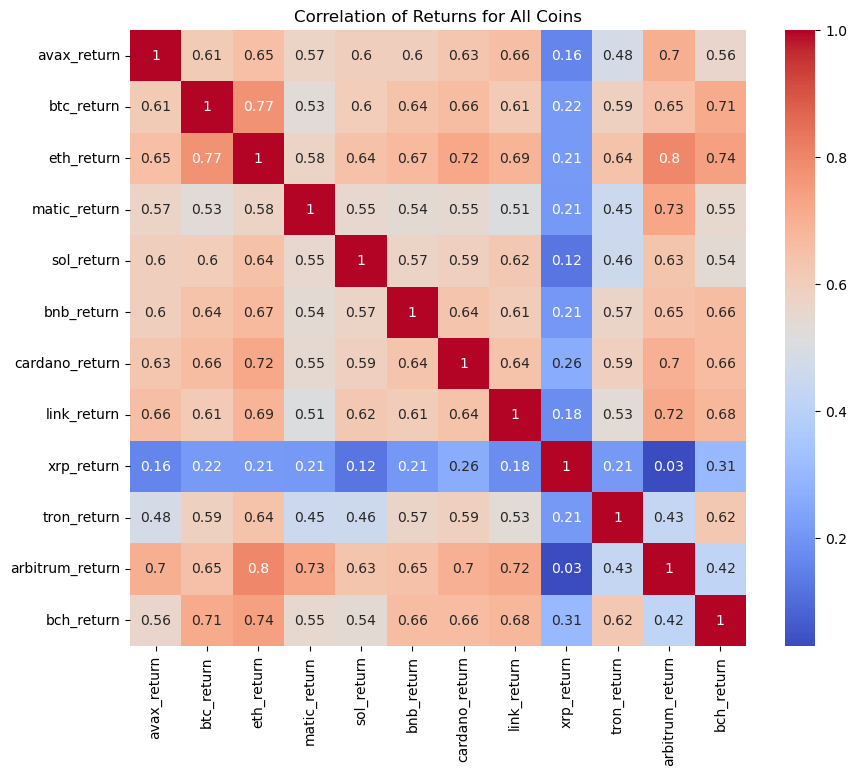

In [14]:
plot_return_correlations(all_returns_df, title='Correlation of Returns for All Coins')

In [15]:
sns.set(style='whitegrid', context='talk')

def fancy_return_histogram(df, return_col, bins=50, title="Return Distribution", figsize=(12,8), color="dodgerblue"):
    plt.figure(figsize=figsize)
    ax = sns.histplot(df[return_col].dropna(), bins=bins, kde=True, stat="density",
                      color=color, edgecolor='black', alpha=0.7)
    sns.rugplot(df[return_col].dropna(), color='black', ax=ax)
    
    mean_val = df[return_col].mean()
    std_val = df[return_col].std()
    
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_val:.4f}")
    ax.axvline(mean_val + std_val, color='green', linestyle='--', linewidth=2, label=f"+1 Std: {(mean_val+std_val):.4f}")
    ax.axvline(mean_val - std_val, color='green', linestyle='--', linewidth=2, label=f"-1 Std: {(mean_val-std_val):.4f}")
    
    ax.legend(fontsize=14)
    ax.set_title(title, fontsize=20, weight='bold')
    ax.set_xlabel("Returns", fontsize=16)
    ax.set_ylabel("Density", fontsize=16)
    plt.tight_layout()
    plt.show()


def fancy_rolling_volatility(df, return_col, window=24, title="Rolling Volatility", figsize=(12,8), line_color="darkorange"):
    df = df.copy()
    df["rolling_volatility"] = df[return_col].rolling(window=window).std()
    
    plt.figure(figsize=figsize)
    ax = plt.gca()
    ax.plot(df.index, df["rolling_volatility"], color=line_color, linewidth=2, label=f"{window}-Period Volatility")
    
    max_vol = df["rolling_volatility"].max()
    max_date = df["rolling_volatility"].idxmax()
    ax.annotate(f'Max Vol: {max_vol:.4f}', xy=(max_date, max_vol), xytext=(max_date, max_vol*1.1),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                fontsize=12, color='black')
    
    ax.set_title(title, fontsize=20, weight='bold')
    ax.set_xlabel("Time", fontsize=16)
    ax.set_ylabel("Volatility", fontsize=16)
    ax.legend(fontsize=14)
    plt.tight_layout()
    plt.show()


def fancy_return_acf(df, return_col, lags=20, title="Autocorrelation of Returns", 
                     figsize=(12,8), alpha=0.05, show_zero_lag=False, ylim=(-0.2, 0.2)):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    plot_acf(df[return_col].dropna(), 
             lags=lags, 
             alpha=alpha, 
             ax=ax, 
             zero=show_zero_lag)
    
    if ylim is not None:
        ax.set_ylim(ylim)
    
    ax.set_title(title, fontsize=20, weight='bold')
    ax.set_xlabel("Lags", fontsize=16)
    ax.set_ylabel("Autocorrelation", fontsize=16)
    plt.tight_layout()
    plt.show()



def fancy_return_qq(df, return_col, title="Q-Q Plot of Returns", figsize=(10,8)):
    plt.figure(figsize=figsize)
    qq = sm.qqplot(df[return_col].dropna(), line='s', alpha=0.5)
    plt.title(title, fontsize=20, weight='bold')
    plt.xlabel("Theoretical Quantiles", fontsize=16)
    plt.ylabel("Sample Quantiles", fontsize=16)
    plt.tight_layout()
    plt.show()

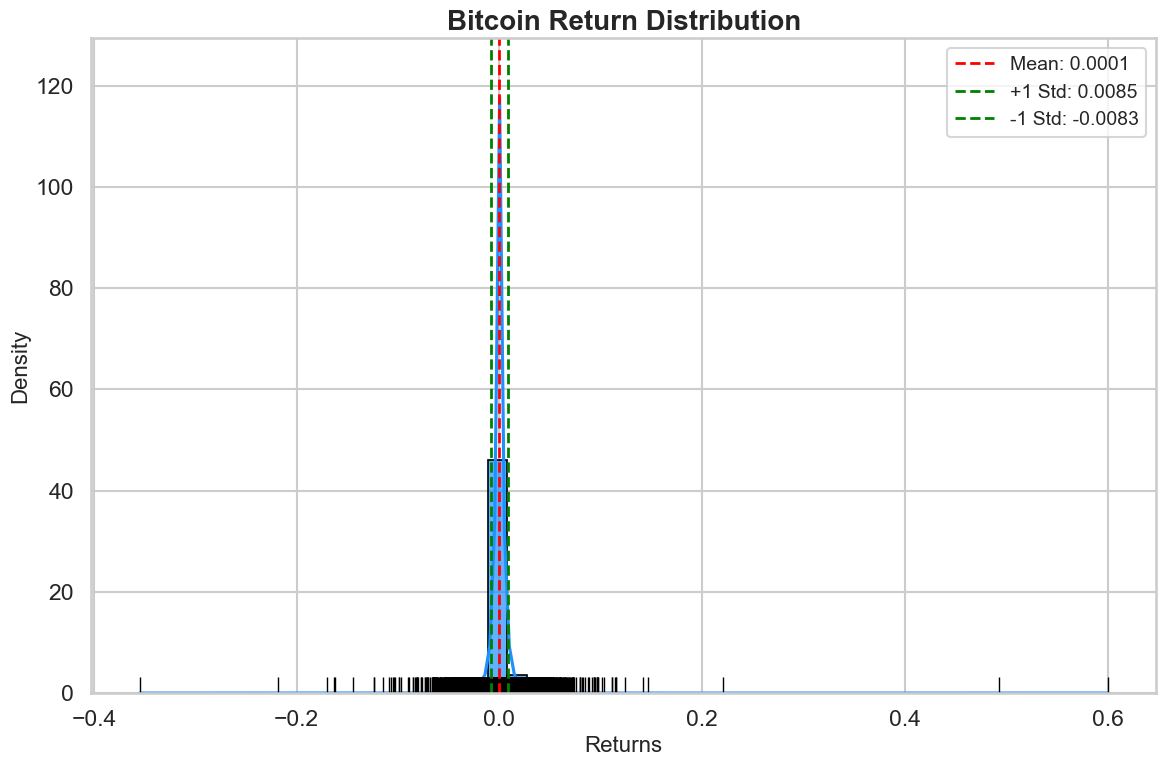

In [16]:
fancy_return_histogram(all_returns_df, "btc_return", title="Bitcoin Return Distribution")

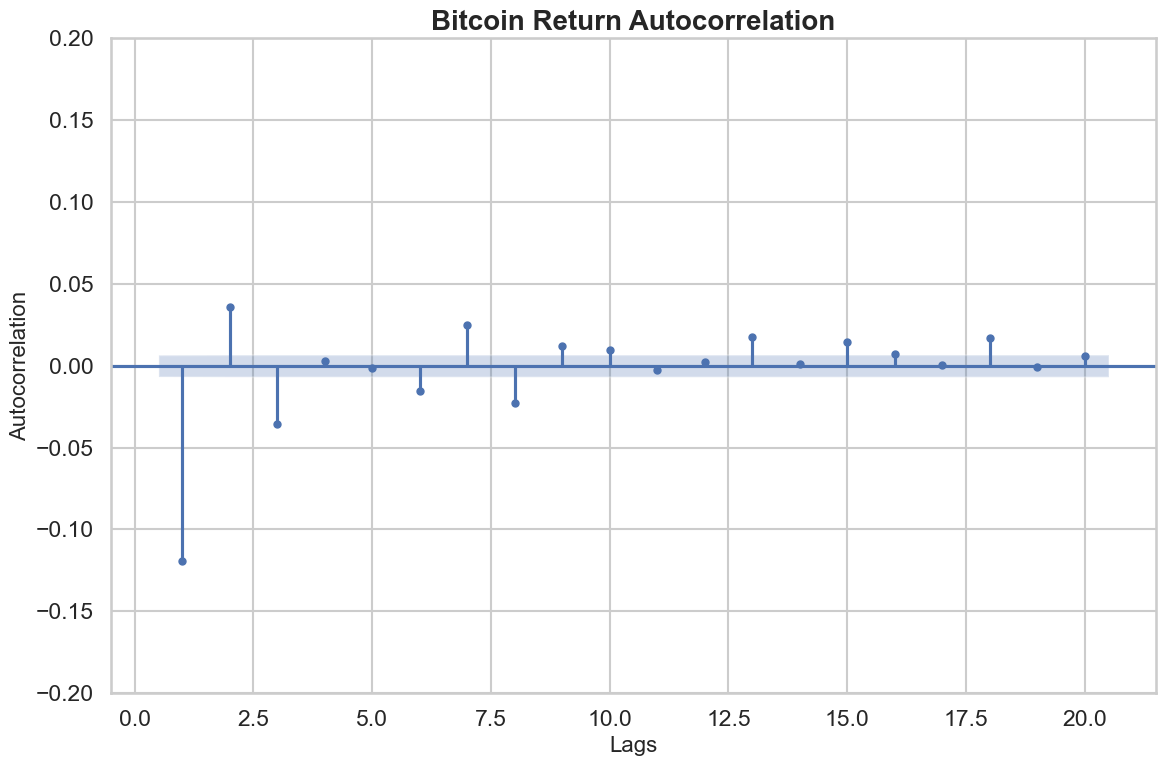

In [17]:
fancy_return_acf(all_returns_df, "btc_return", title="Bitcoin Return Autocorrelation")

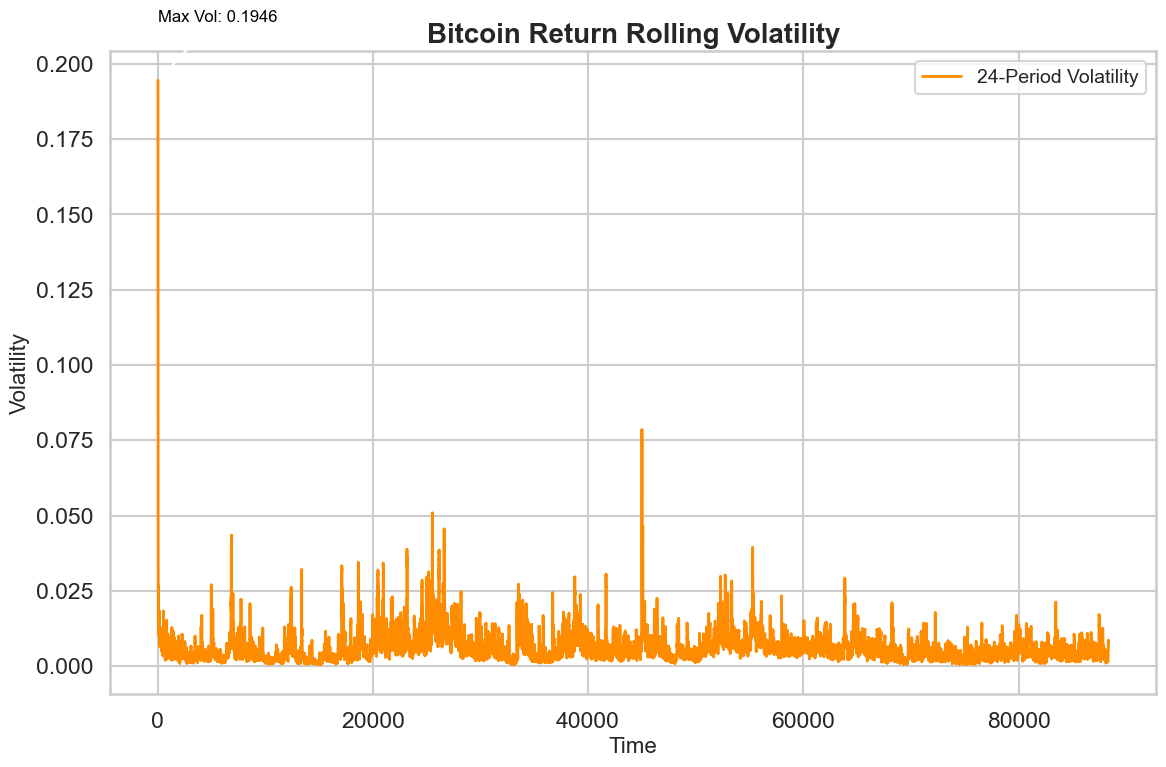

In [18]:
fancy_rolling_volatility(all_returns_df, "btc_return", title="Bitcoin Return Rolling Volatility")

<Figure size 1000x800 with 0 Axes>

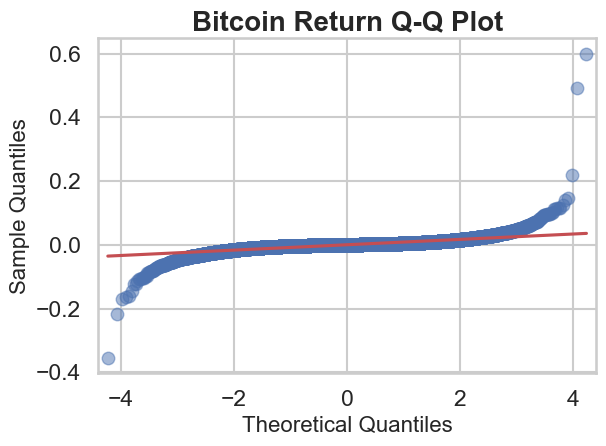

In [19]:
fancy_return_qq(all_returns_df, "btc_return", title="Bitcoin Return Q-Q Plot")

BTC On-Chain

In [ ]:
df_BTC_On_Chain = pd.read_parquet('../Data/on_chain_data/Parquet_Data/BTC_Hourly_On_Chain_Data_sorted.parquet')

In [ ]:
df_BTC_On_Chain.head()

In [22]:
df_BTC_On_Chain_clean = df_BTC_On_Chain.copy()

df_BTC_On_Chain_clean['hour'] = df_BTC_On_Chain_clean['hour'].str.replace(' UTC', '', regex=False)
df_BTC_On_Chain_clean['hour'] = pd.to_datetime(df_BTC_On_Chain_clean['hour'])

df_BTC_On_Chain_clean.set_index('hour', inplace=True)
df_BTC_On_Chain_clean.sort_index(inplace=True)

print(df_BTC_On_Chain_clean.info())
print(df_BTC_On_Chain_clean.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88744 entries, 2015-01-01 00:00:00 to 2025-02-23 23:00:00
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   average_height             88744 non-null  float64
 1   average_difficulty         88744 non-null  float64
 2   average_total_fees         88744 non-null  float64
 3   average_total_reward       88744 non-null  float64
 4   average_mint_reward        88744 non-null  float64
 5   average_transaction_count  88744 non-null  float64
 6   average_nonce              88744 non-null  float64
 7   average_size               88744 non-null  float64
 8   average_stripped_size      88744 non-null  float64
 9   average_version            88744 non-null  float64
 10  average_weight             88744 non-null  float64
dtypes: float64(11)
memory usage: 8.1 MB
None
                     average_height  average_difficulty  average_total_fees  \
hou

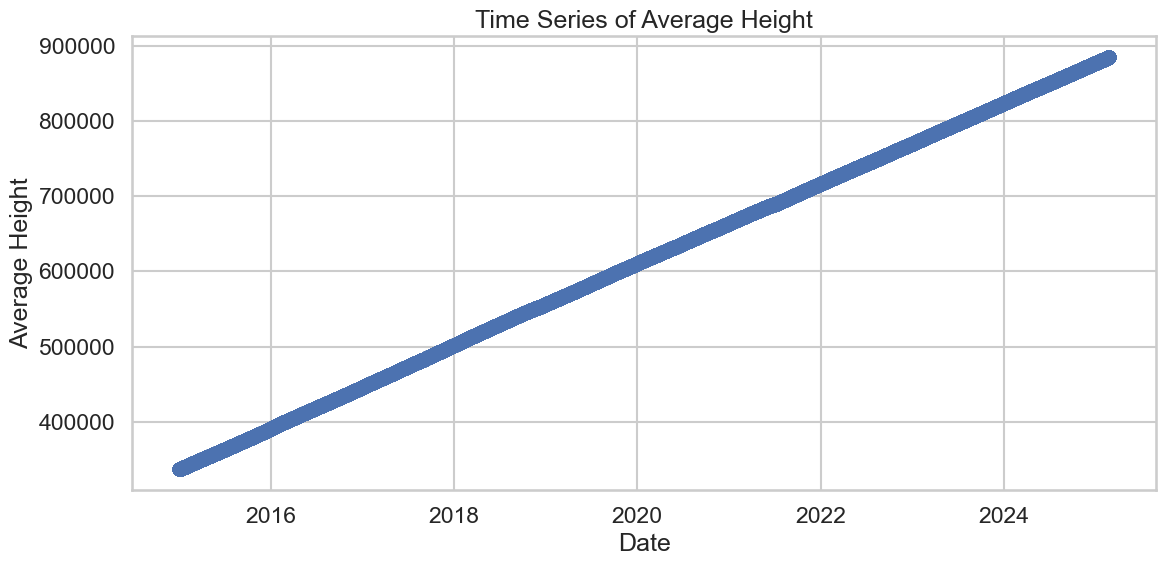

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df_BTC_On_Chain_clean.index, df_BTC_On_Chain_clean['average_height'], marker='o', linestyle='-')
plt.title('Time Series of Average Height')
plt.xlabel('Date')
plt.ylabel('Average Height')
plt.grid(True)
plt.tight_layout()
plt.show()

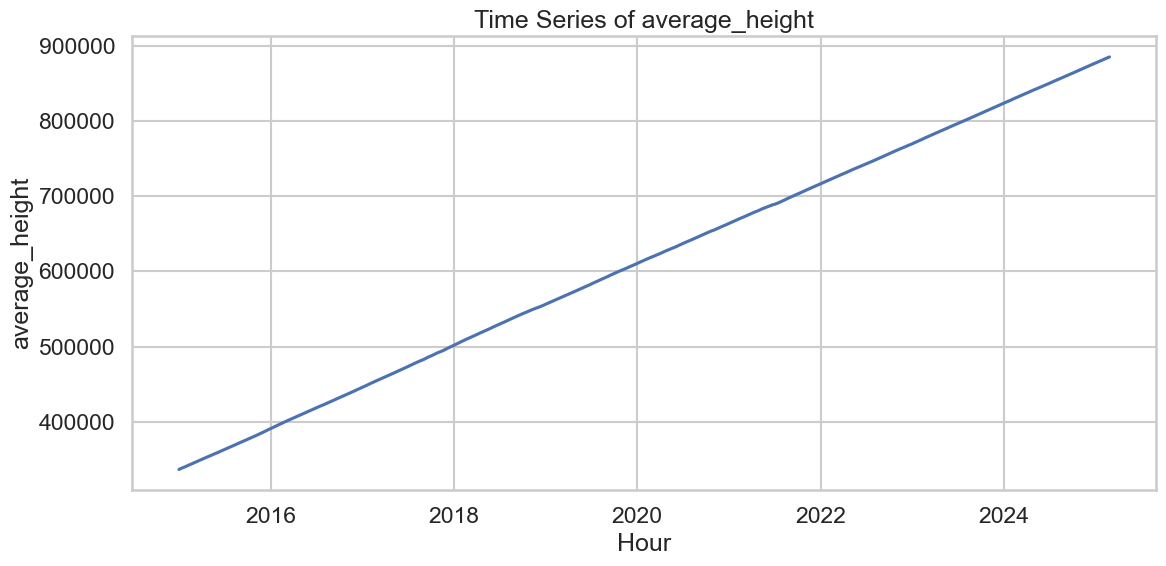

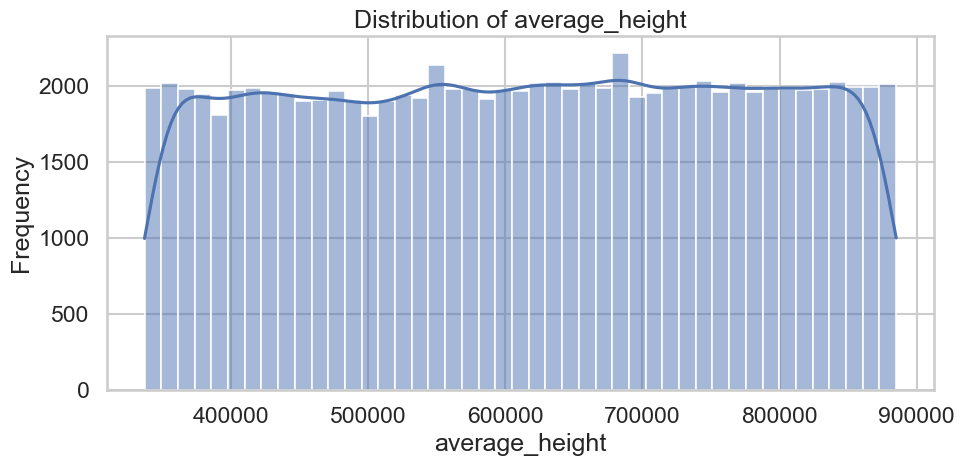

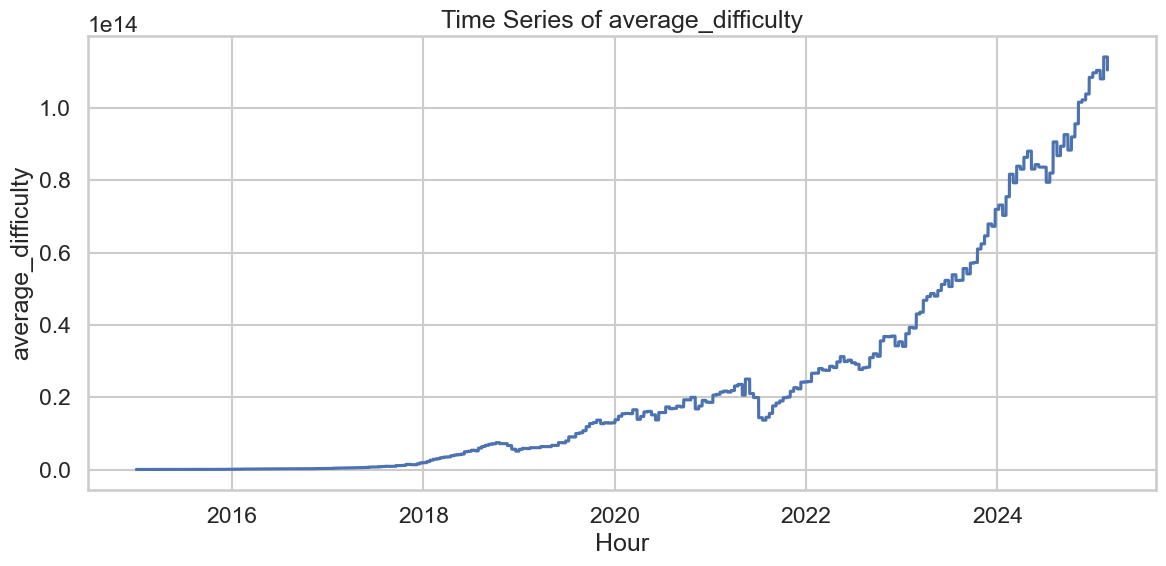

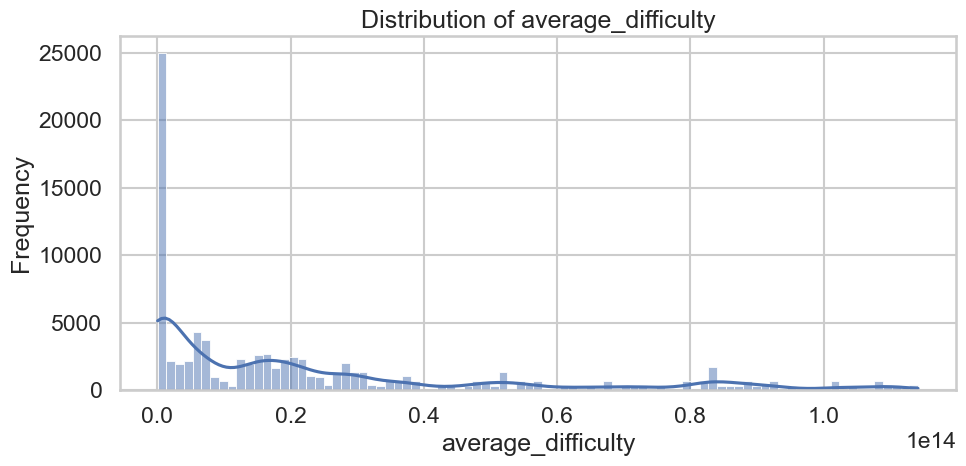

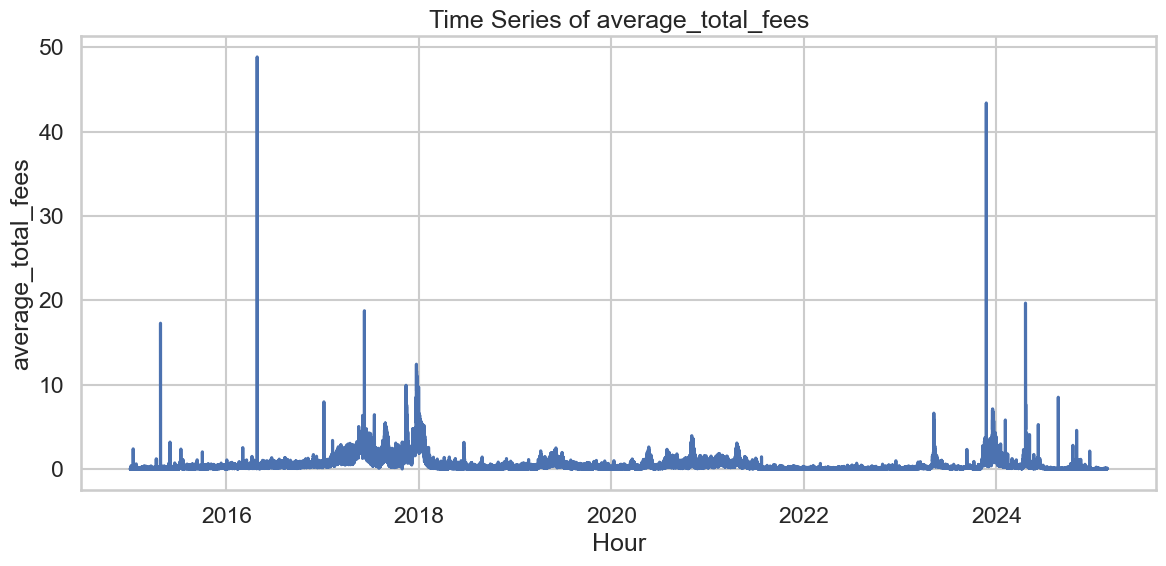

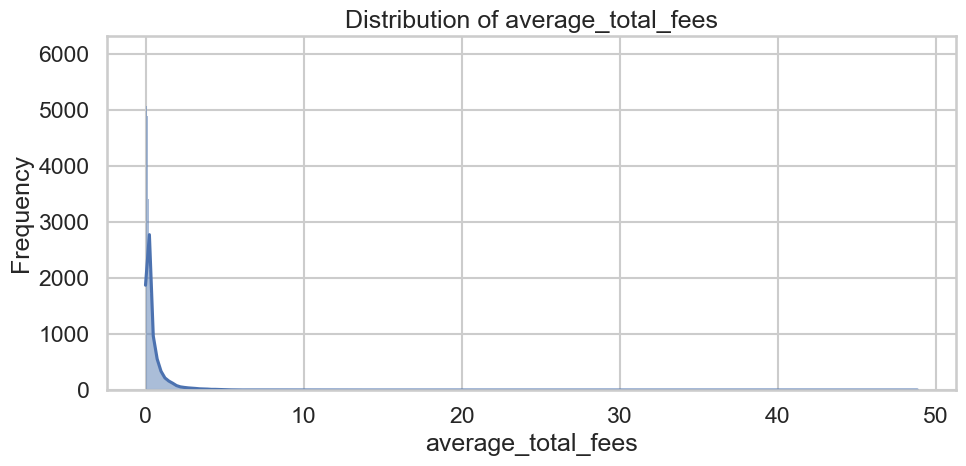

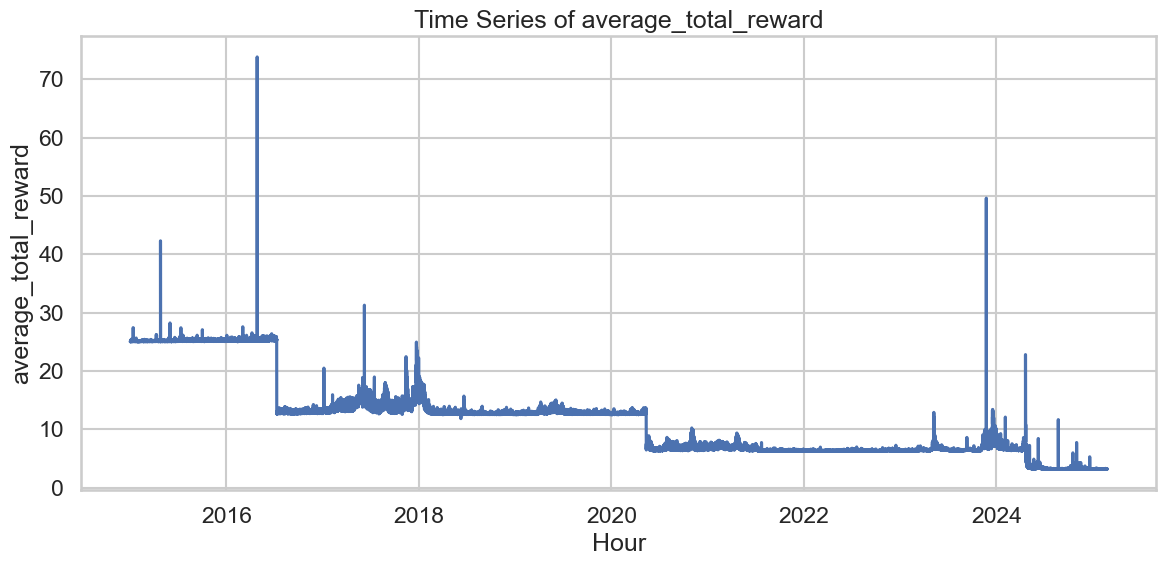

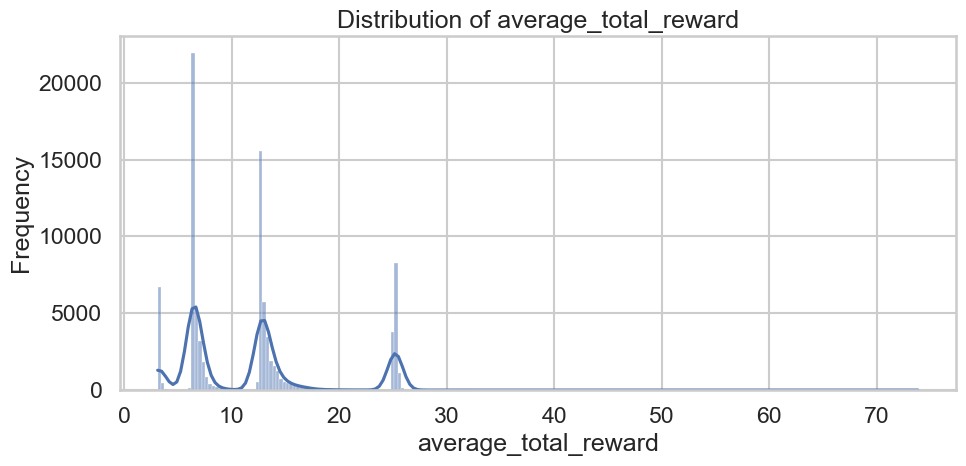

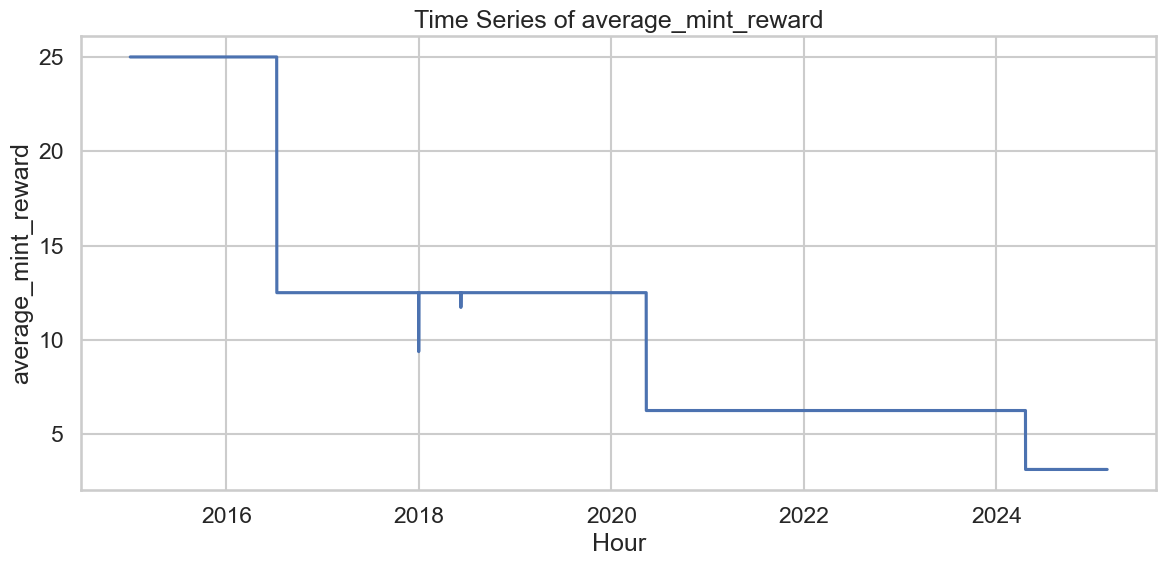

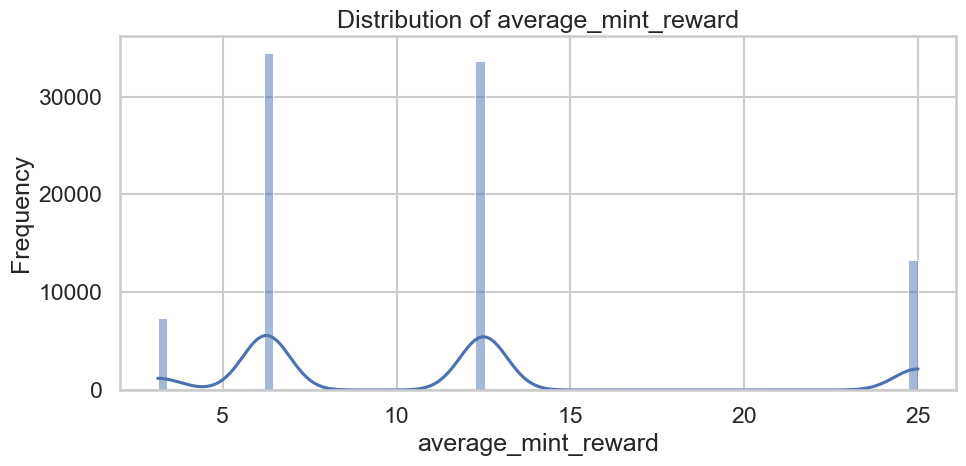

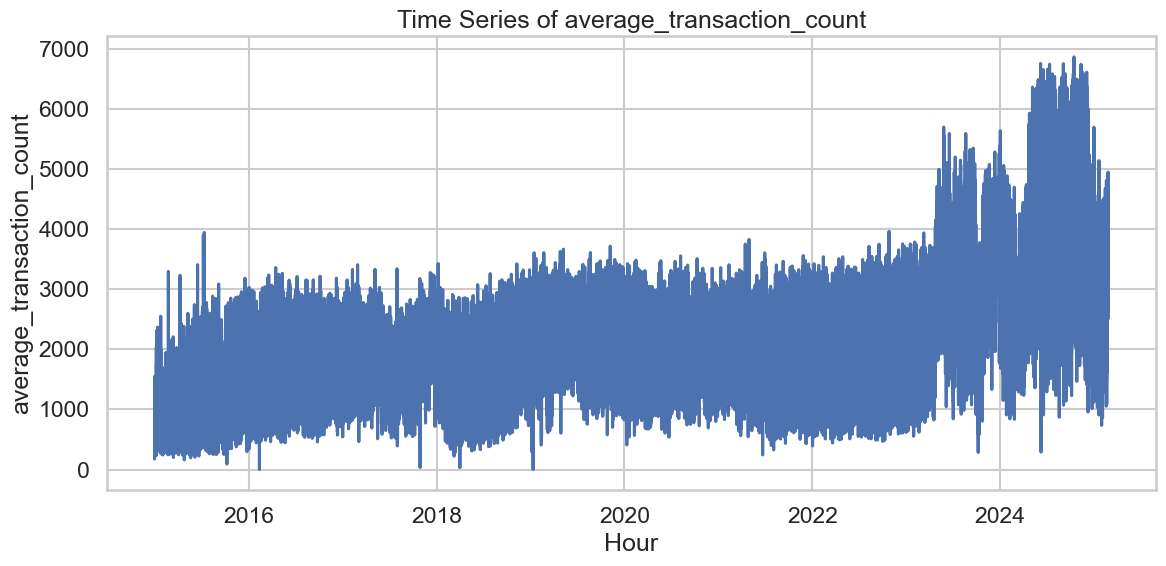

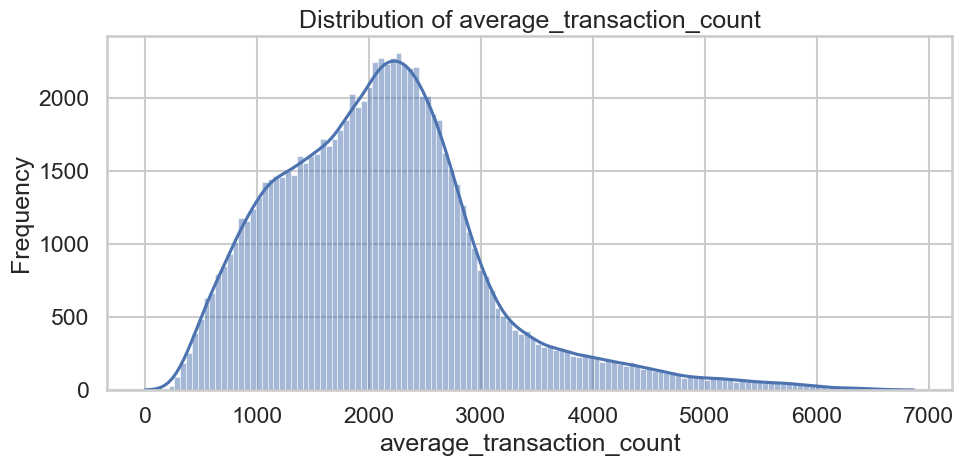

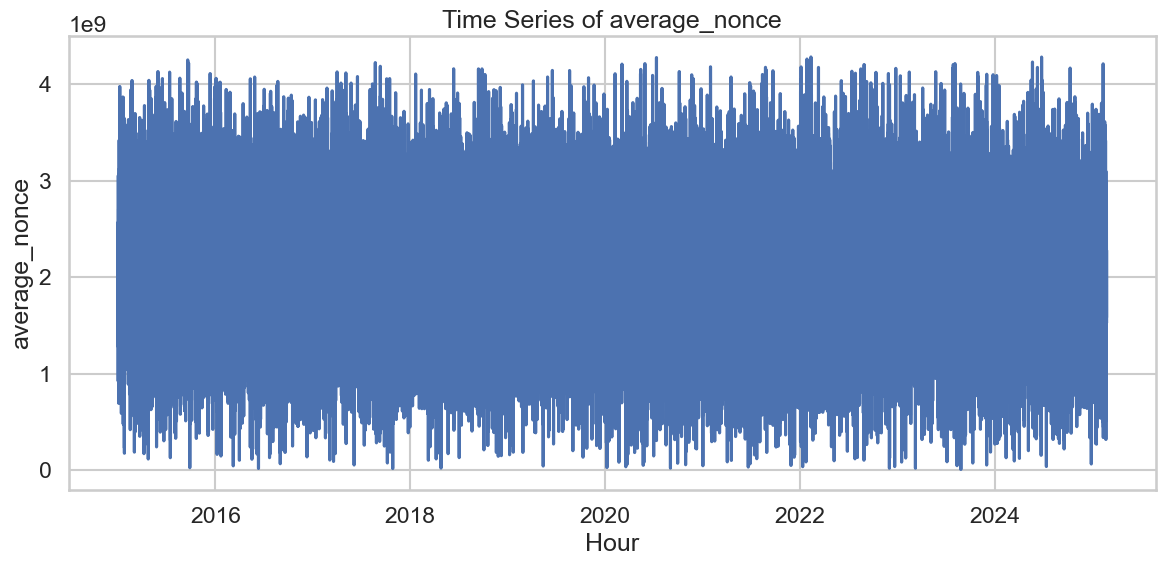

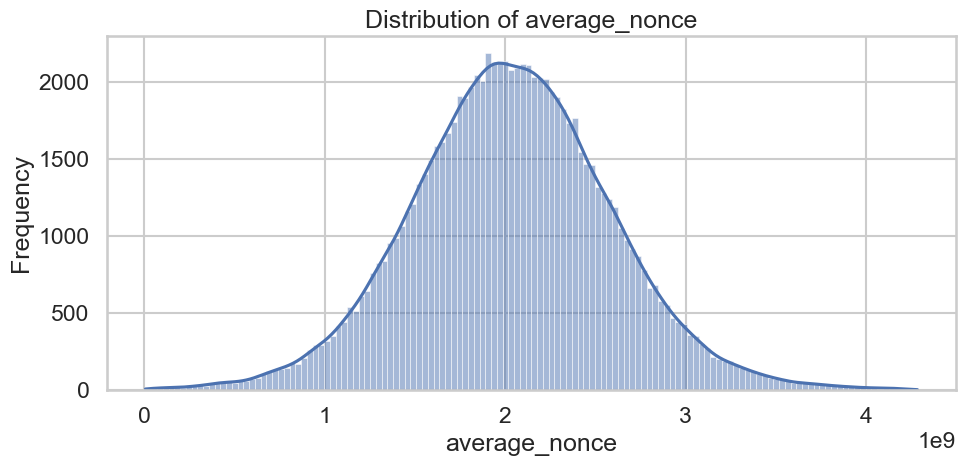

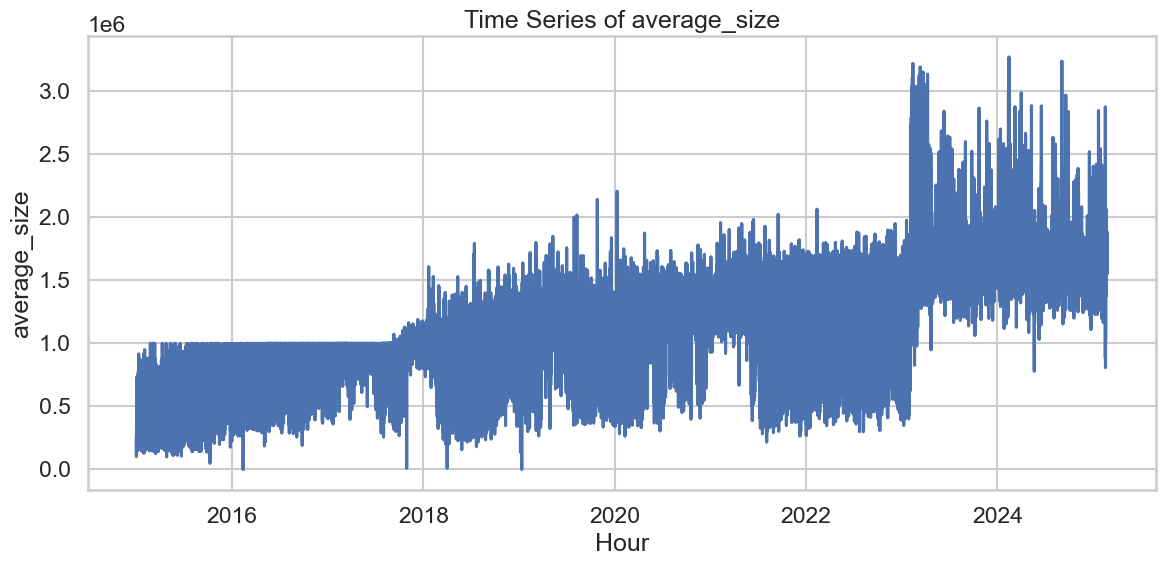

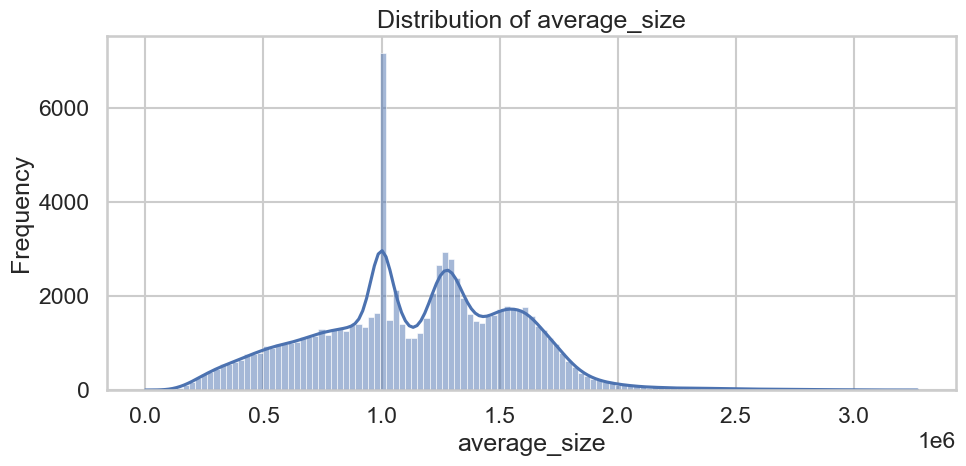

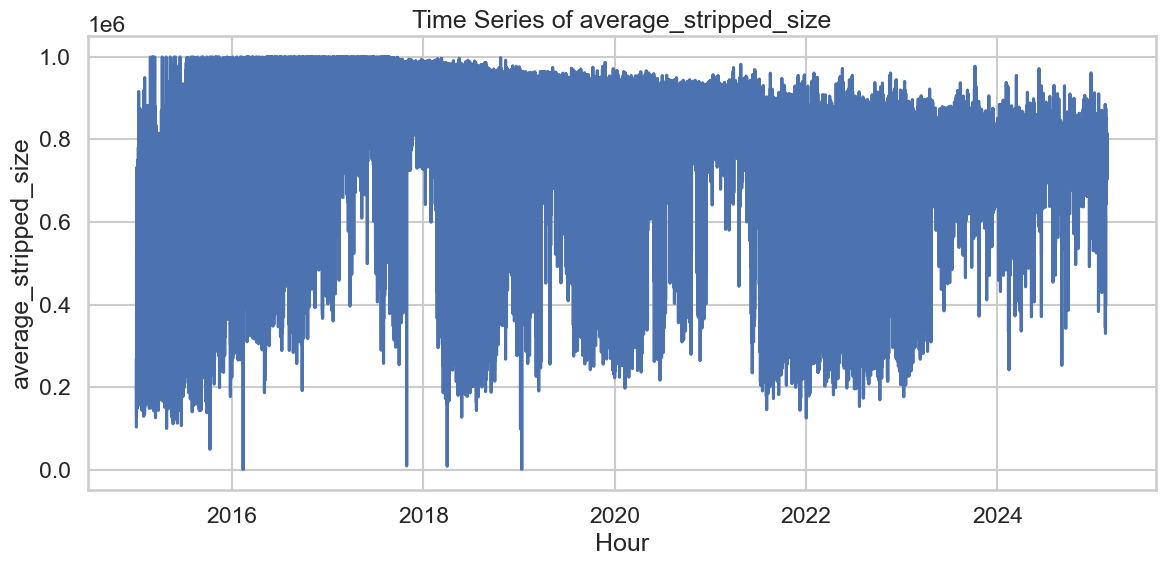

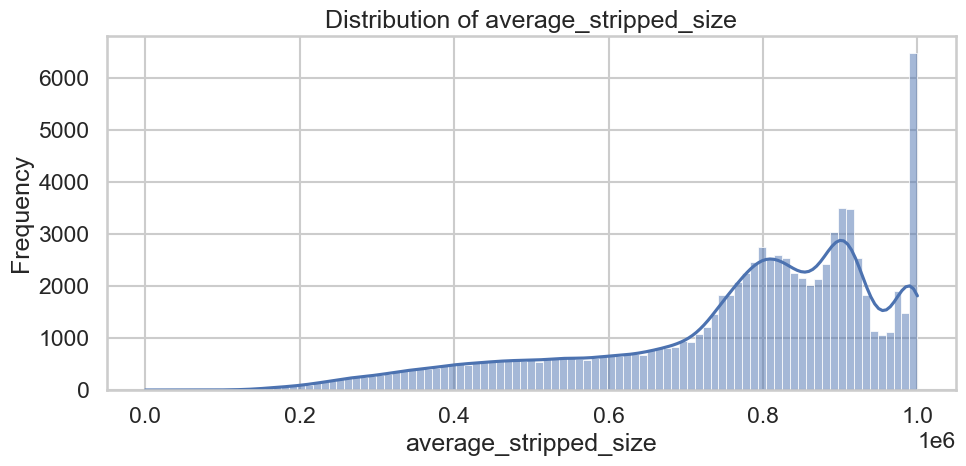

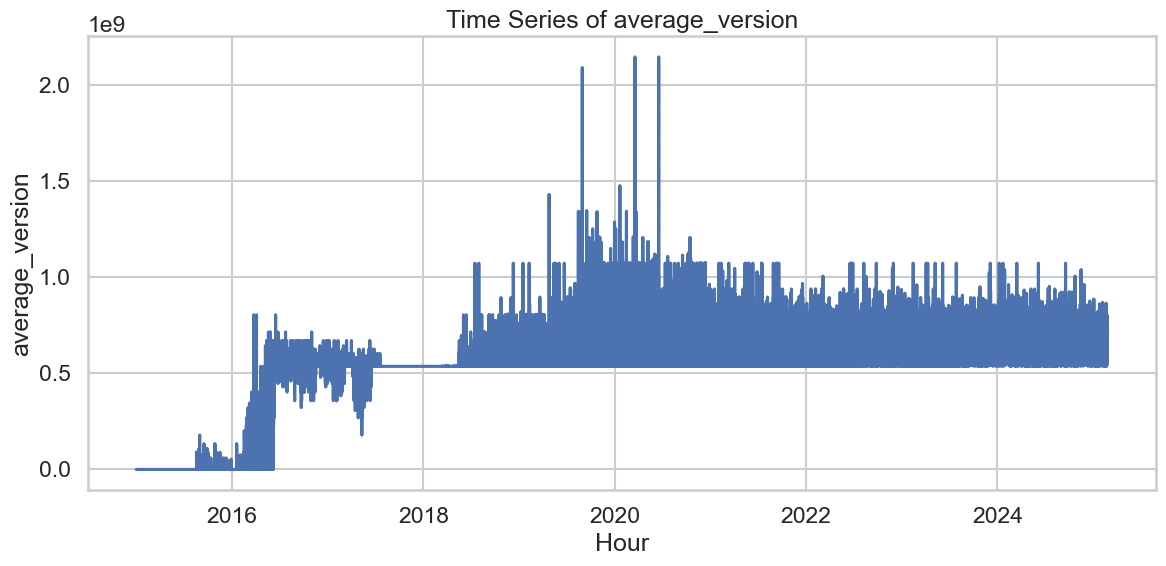

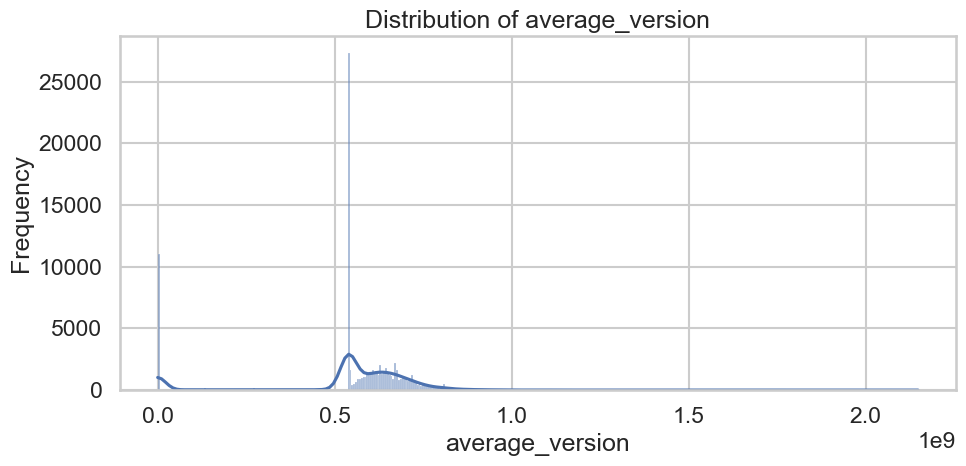

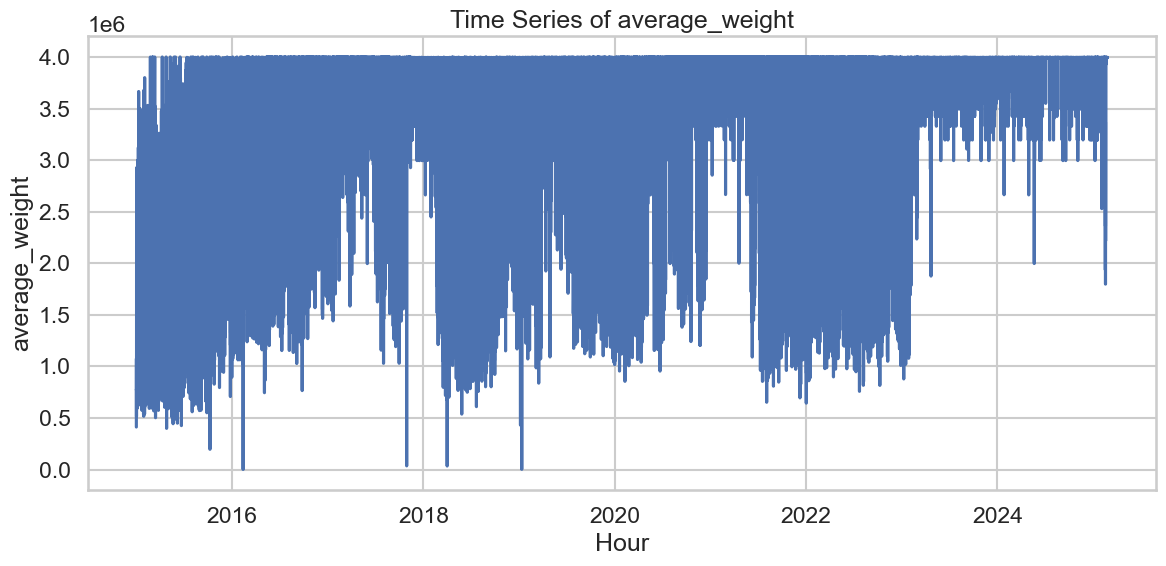

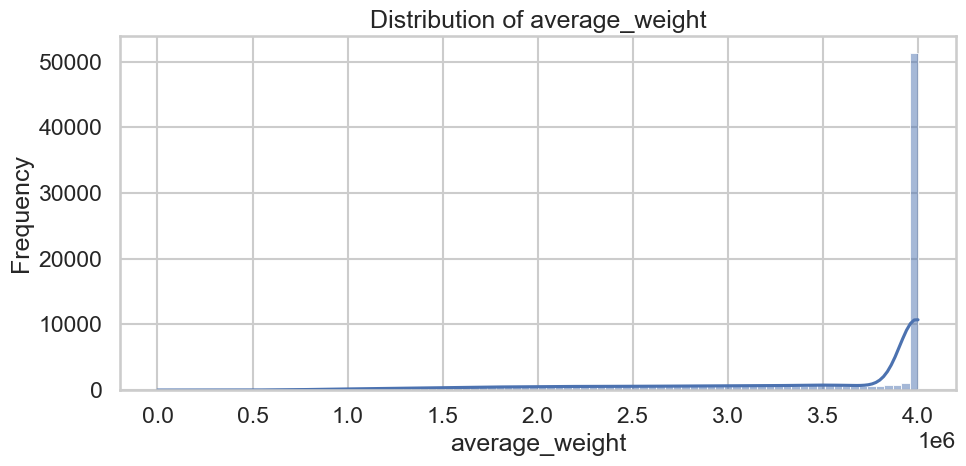

In [24]:
metrics = [col for col in df_BTC_On_Chain_clean.columns if col != 'hour']

for col in metrics:
    plt.figure(figsize=(12, 6))
    plt.plot(df_BTC_On_Chain_clean.index, df_BTC_On_Chain_clean[col], linestyle='-')
    plt.title(f'Time Series of {col}')
    plt.xlabel('Hour')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 5))
    sns.histplot(df_BTC_On_Chain_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [25]:
arb1_chain_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/arb1_chain_processed.parquet')
arb2_chain_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/arb2_chain_processed.parquet')
avax1_chain_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/avax1_chain_processed.parquet')
avax2_chain_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/avax2_chain_processed.parquet')
bnb_chain_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/bnb_chain_processed.parquet')
btc_chain_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/btc_chain_processed.parquet')
eth1_chain_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/eth1_chain_processed.parquet')
eth2_chain_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/eth2_chain_processed.parquet')
matic1_chain_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/matic1_chain_processed.parquet')
matic2_chain_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/matic2_chain_processed.parquet')
sol_chain_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/sol_chain_processed.parquet')
tron1_chain_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/tron1_chain_processed.parquet')
tron2_chain_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/tron2_chain_processed.parquet')

In [28]:
dataframes = [
    ("arb1_chain_processed", arb1_chain_processed),
    ("arb2_chain_processed", arb2_chain_processed),
    ("avax1_chain_processed", avax1_chain_processed),
    ("avax2_chain_processed", avax2_chain_processed),
    ("bnb_chain_processed", bnb_chain_processed),
    ("btc_chain_processed", btc_chain_processed),
    ("eth1_chain_processed", eth1_chain_processed),
    ("eth2_chain_processed", eth2_chain_processed),
    ("matic1_chain_processed", matic1_chain_processed),
    ("matic2_chain_processed", matic2_chain_processed),
    ("sol_chain_processed", sol_chain_processed),
    ("tron1_chain_processed", tron1_chain_processed),
    ("tron2_chain_processed", tron2_chain_processed)
]

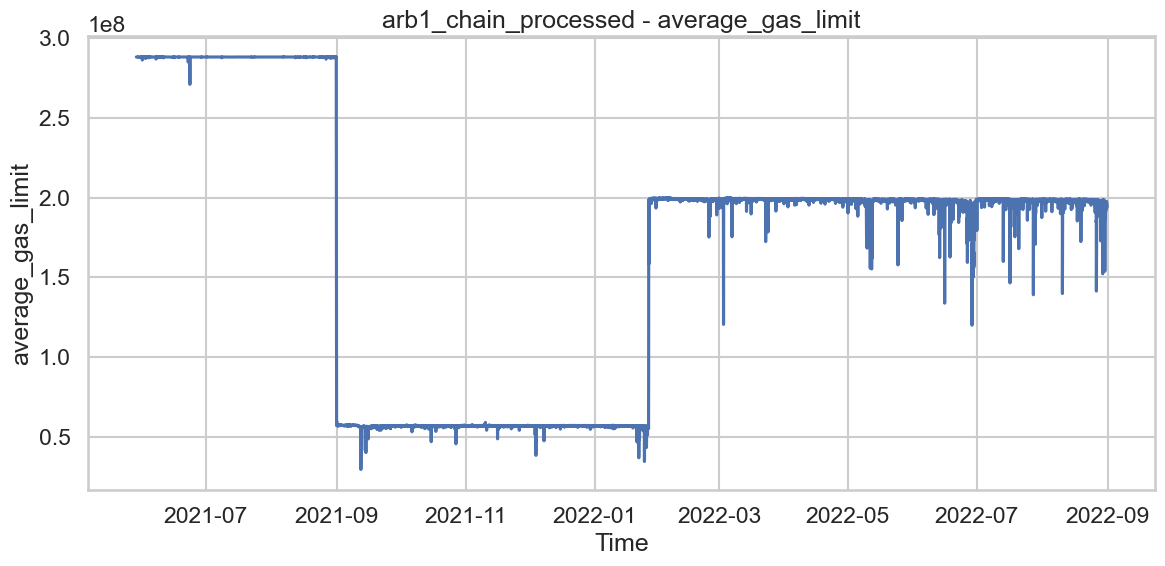

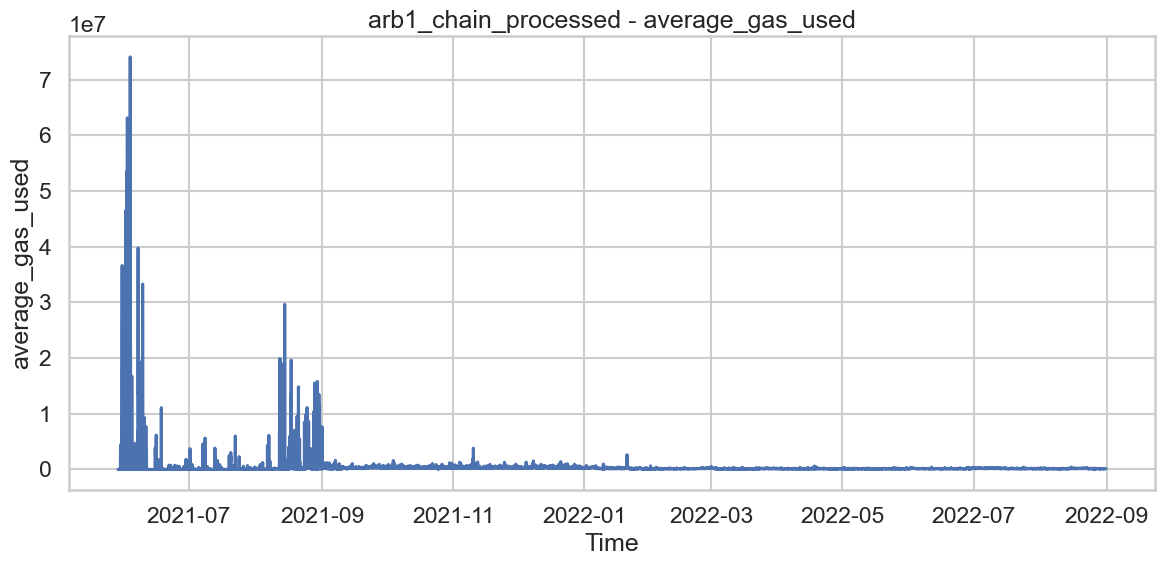

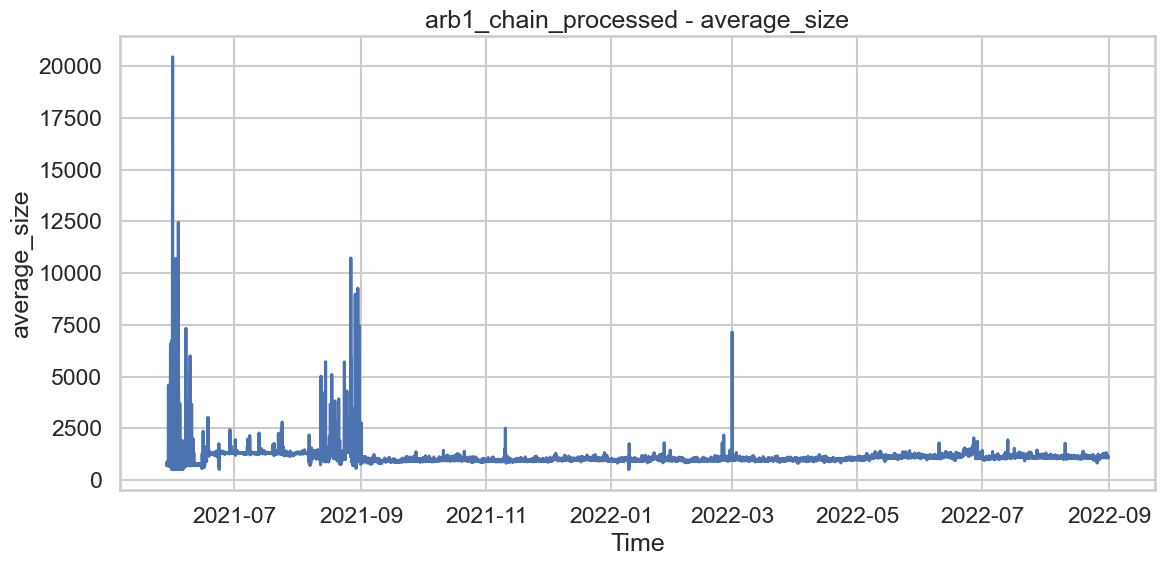

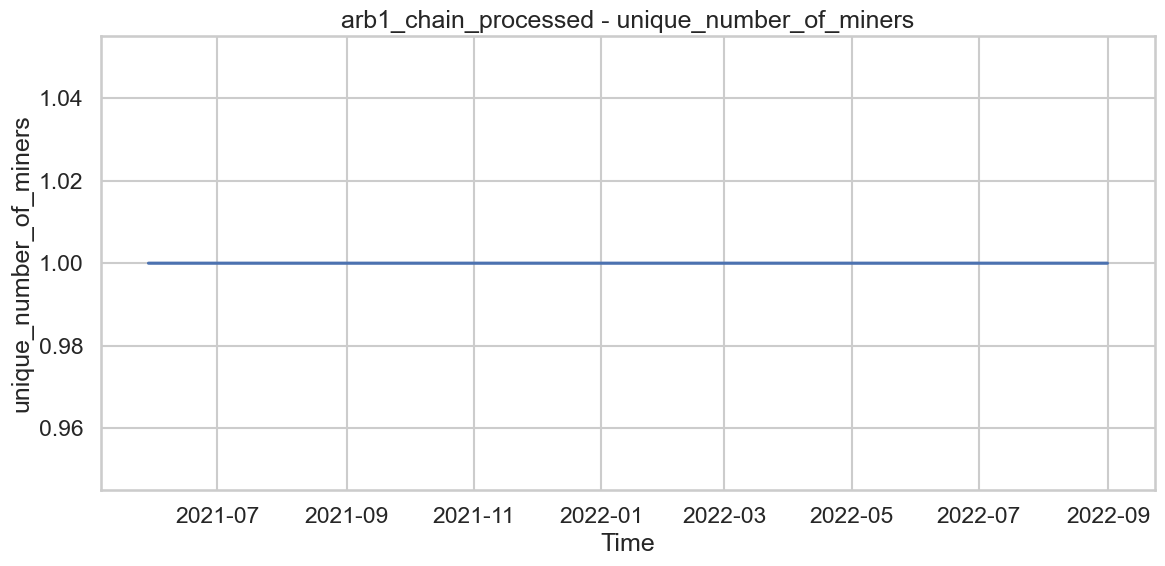

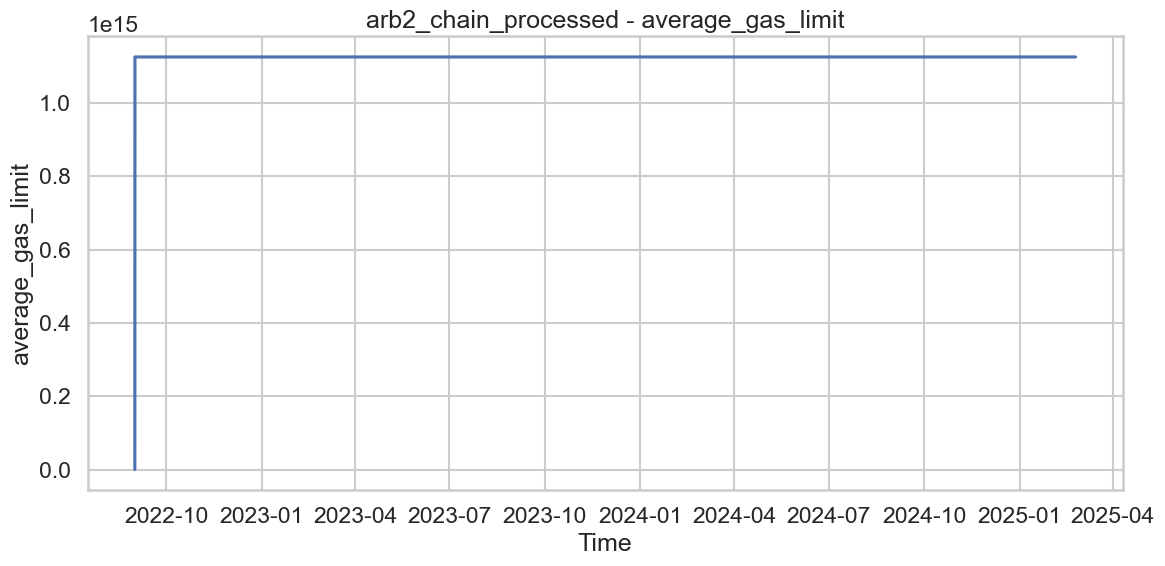

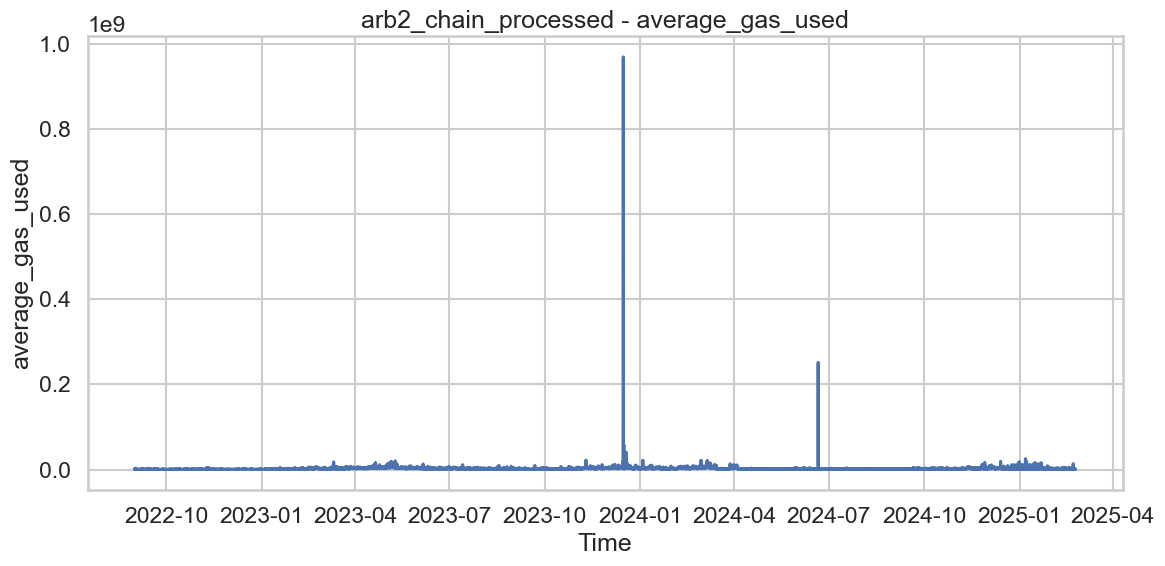

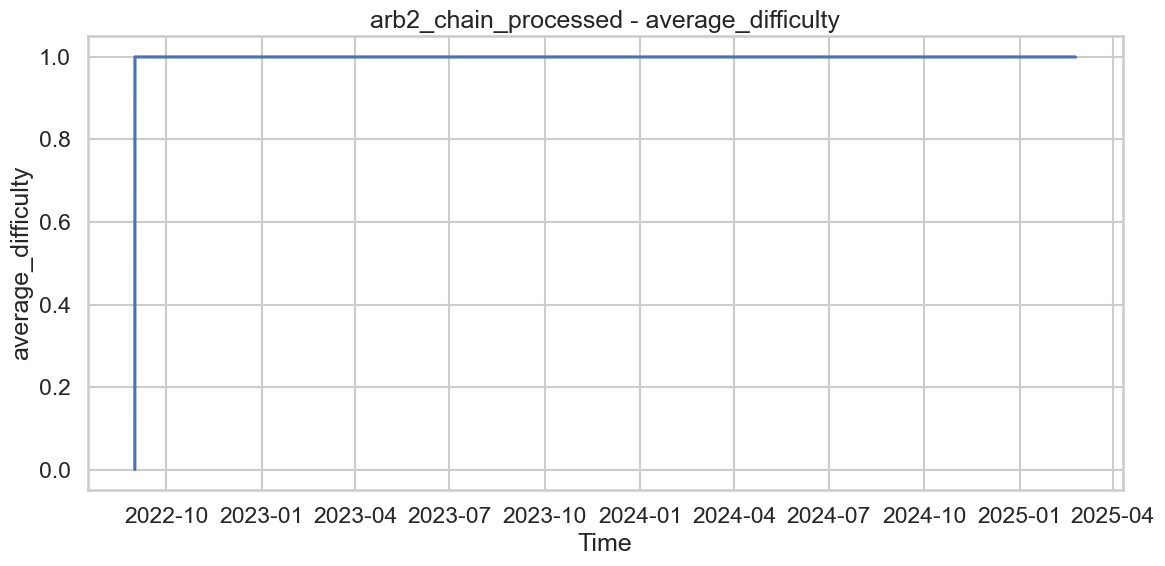

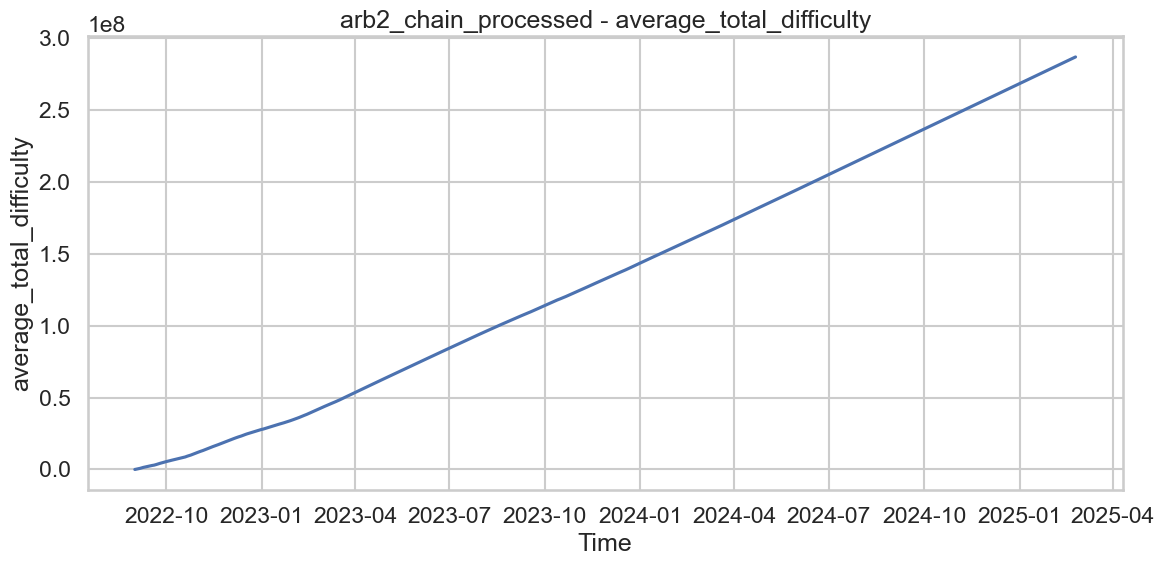

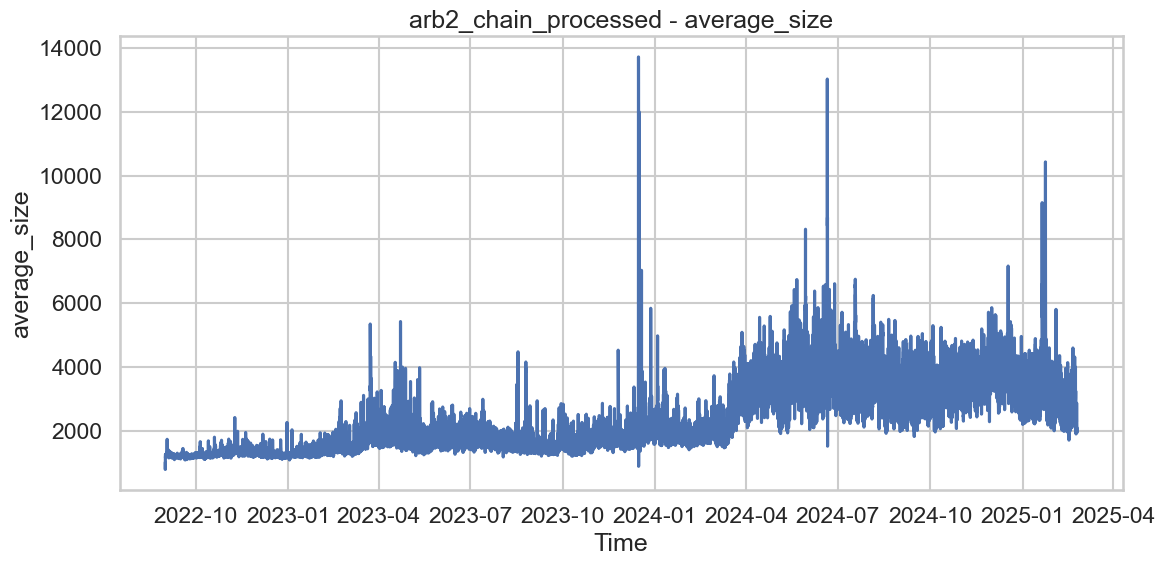

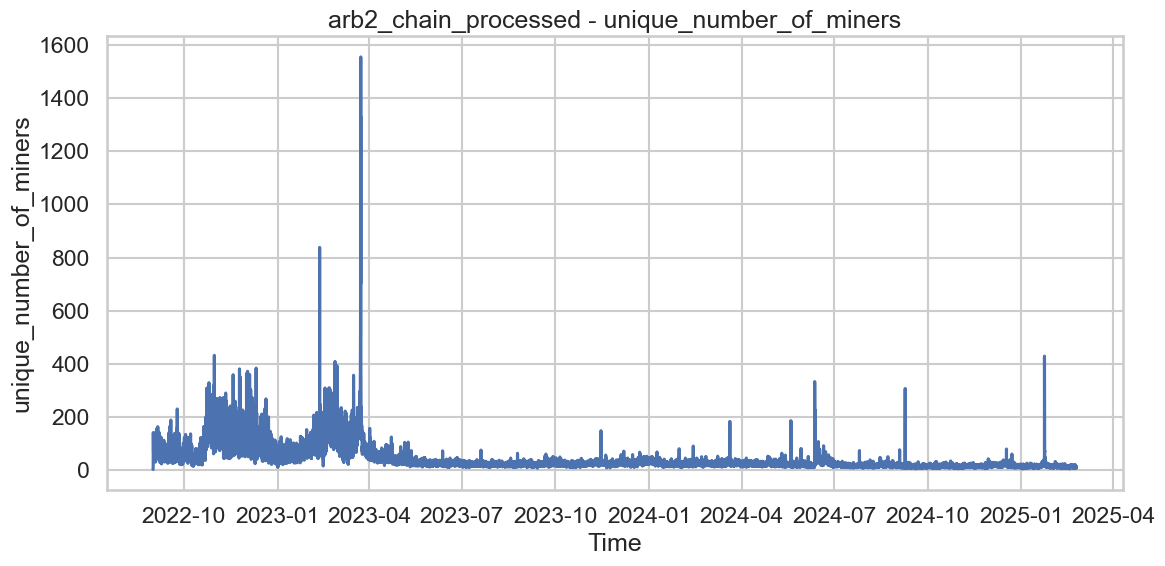

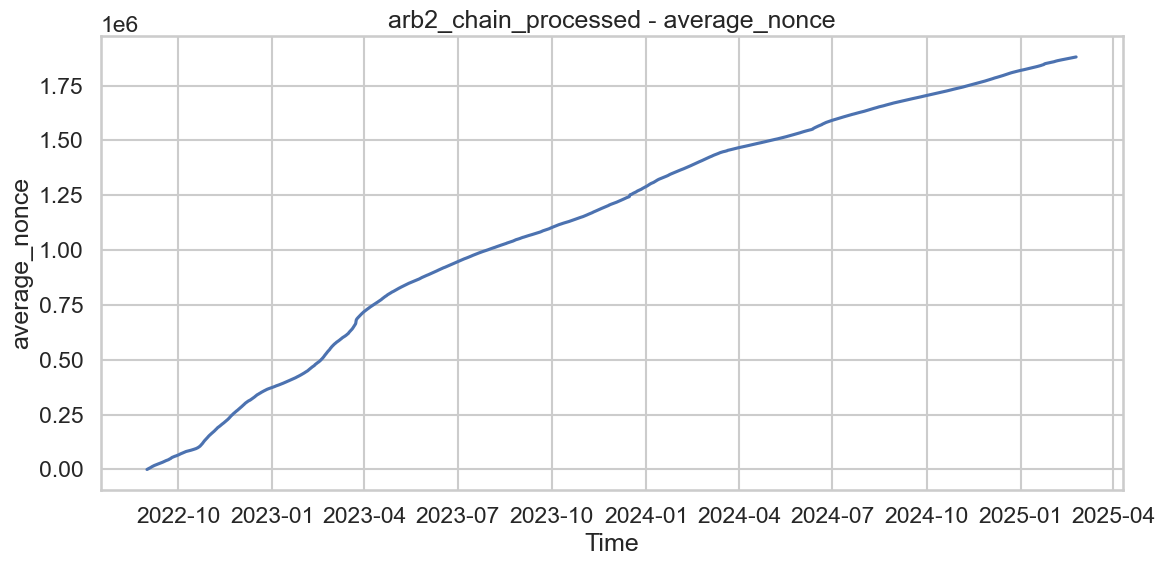

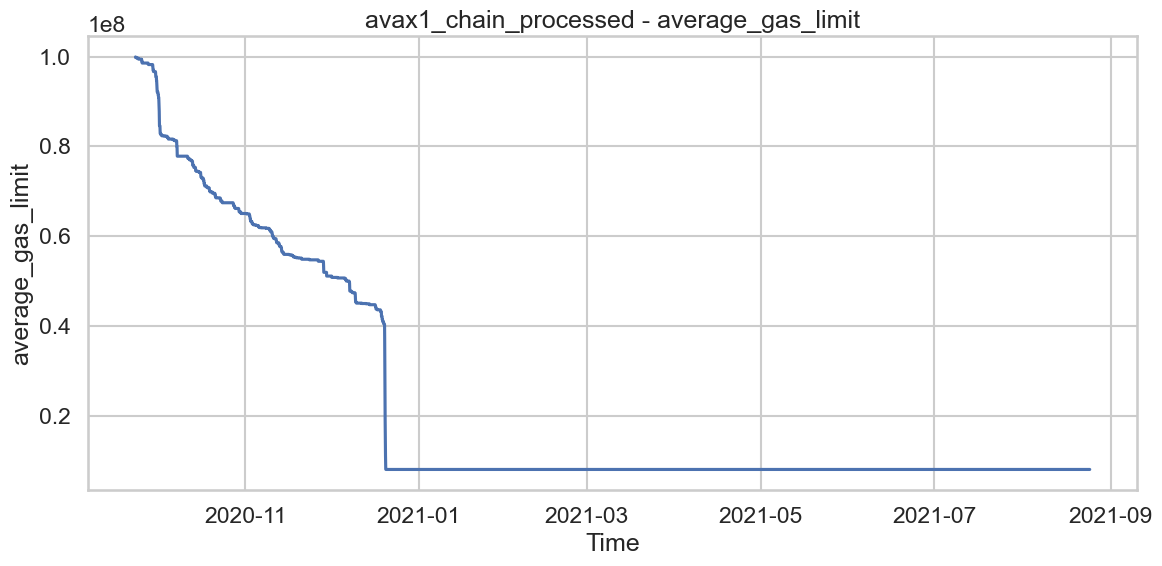

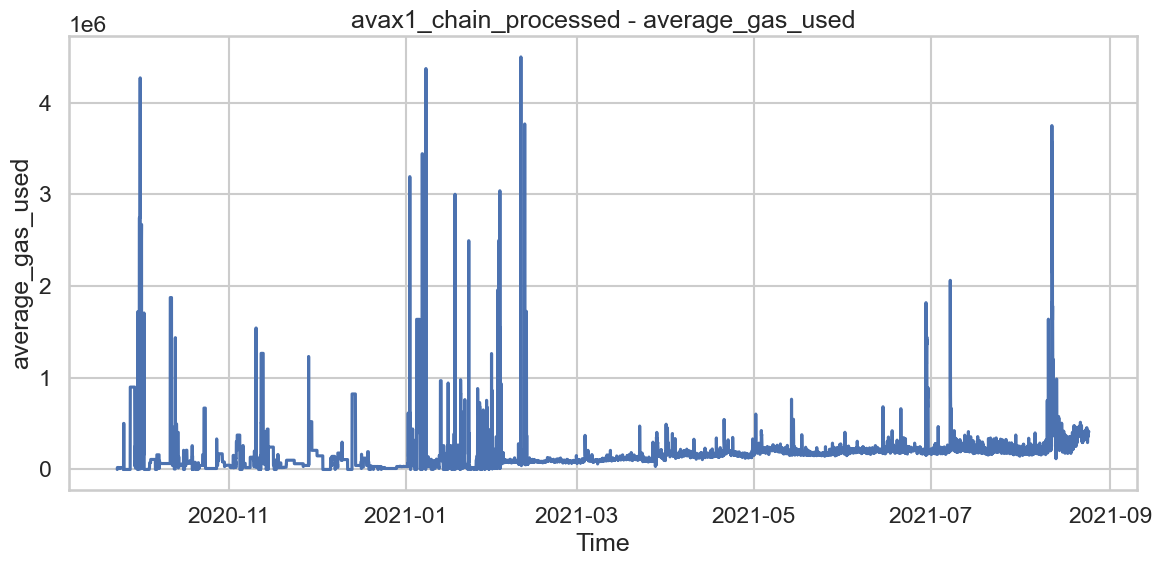

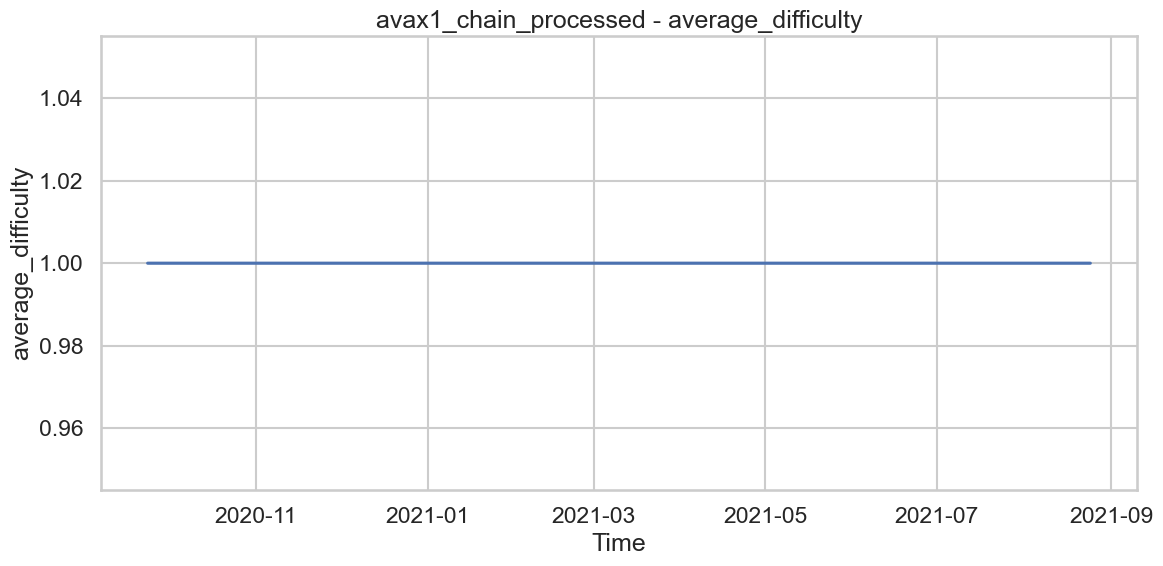

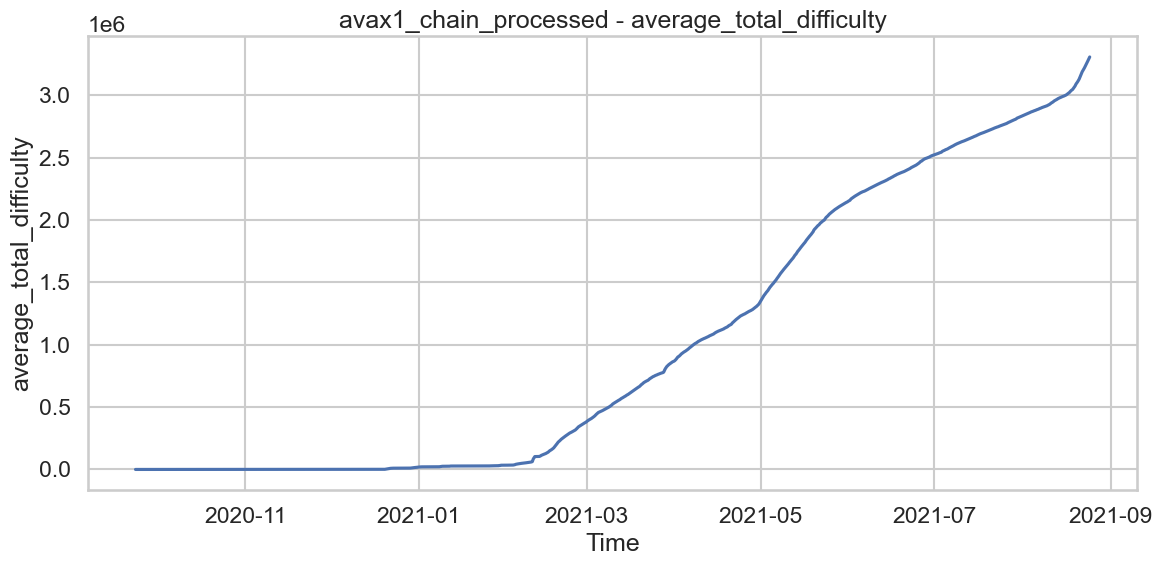

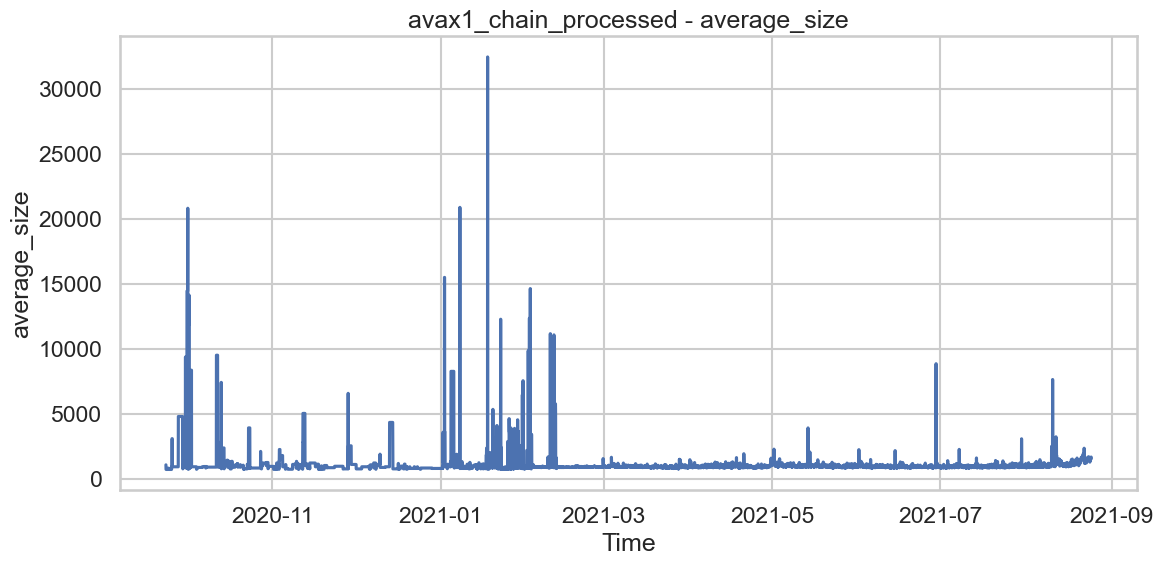

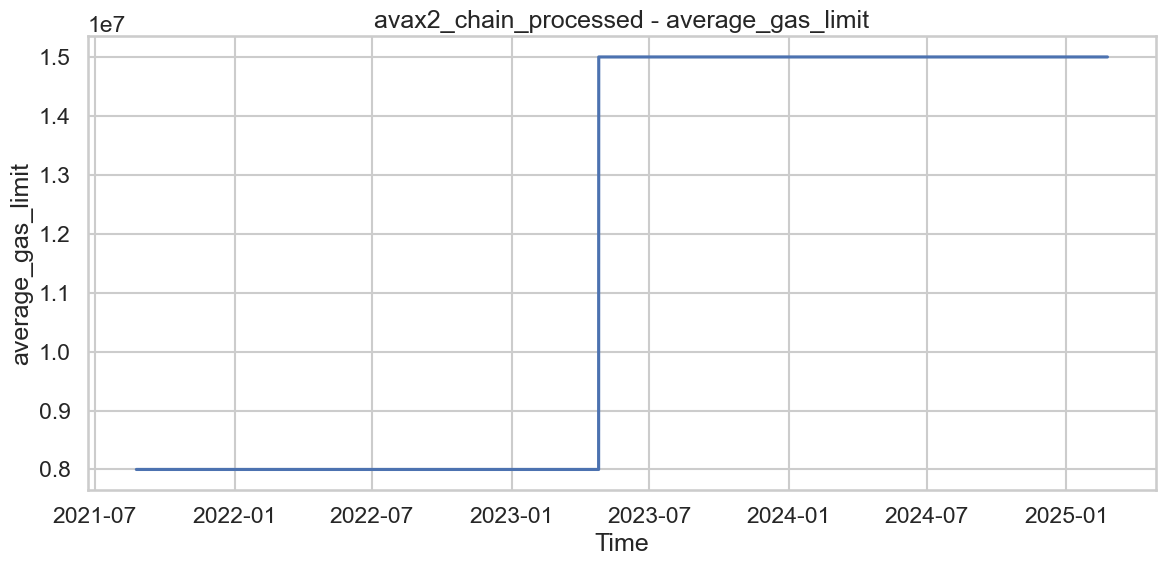

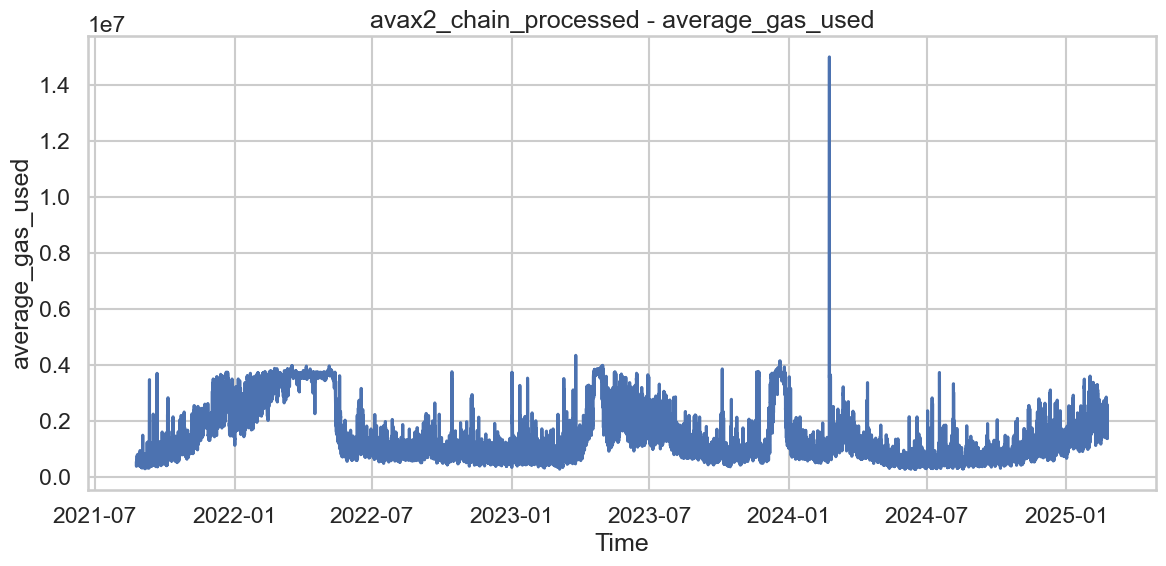

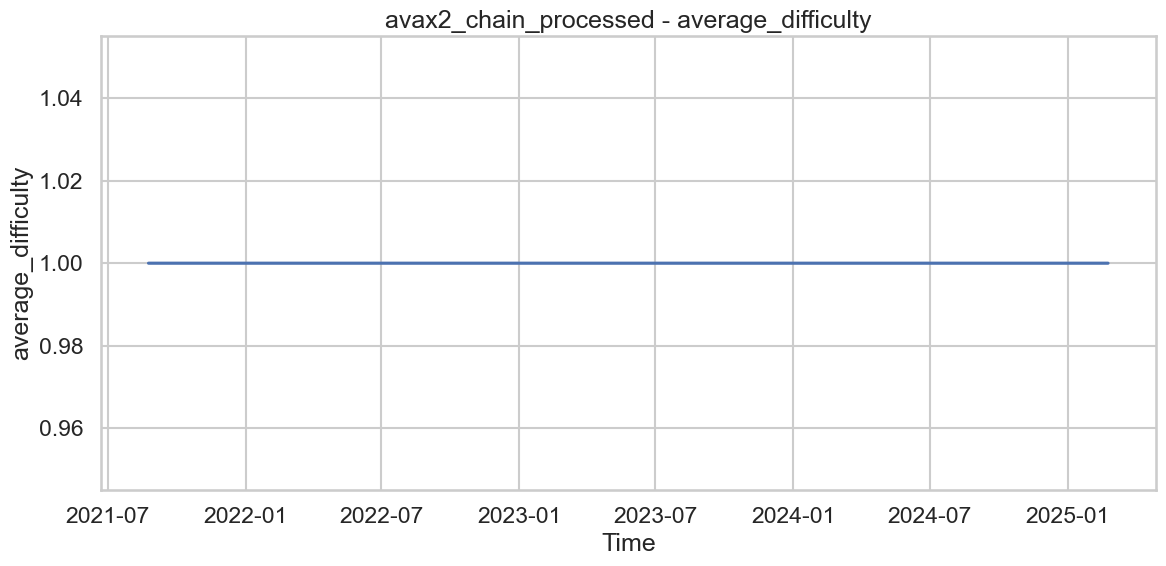

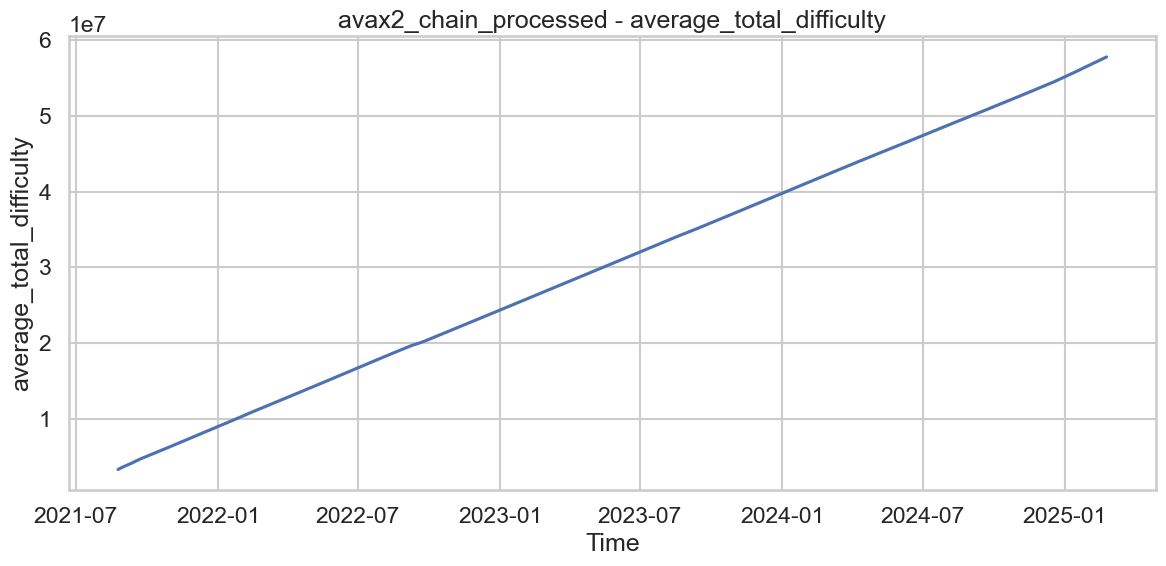

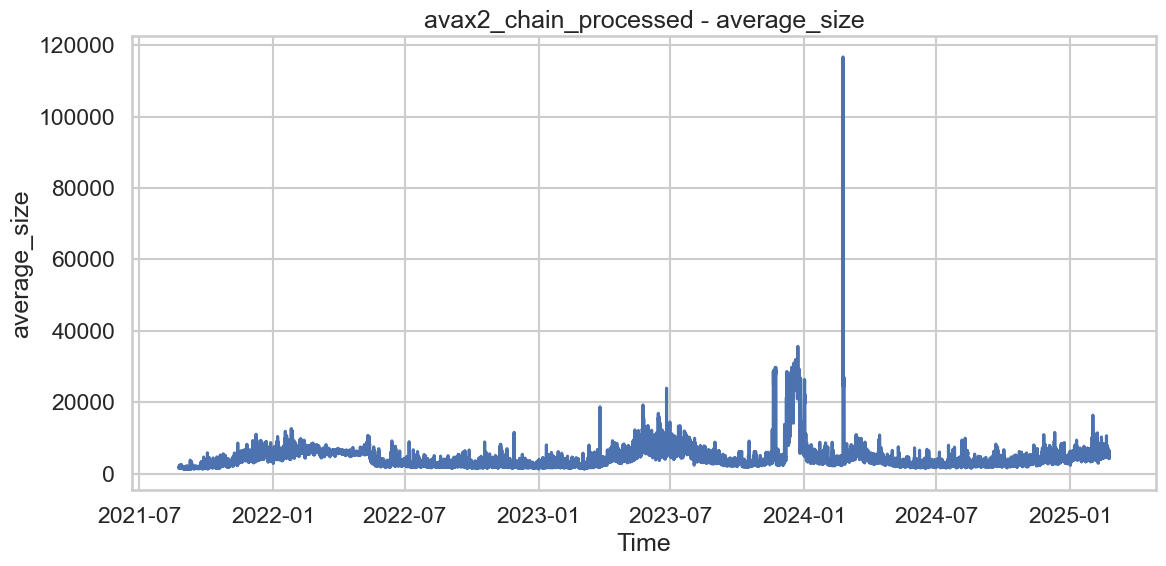

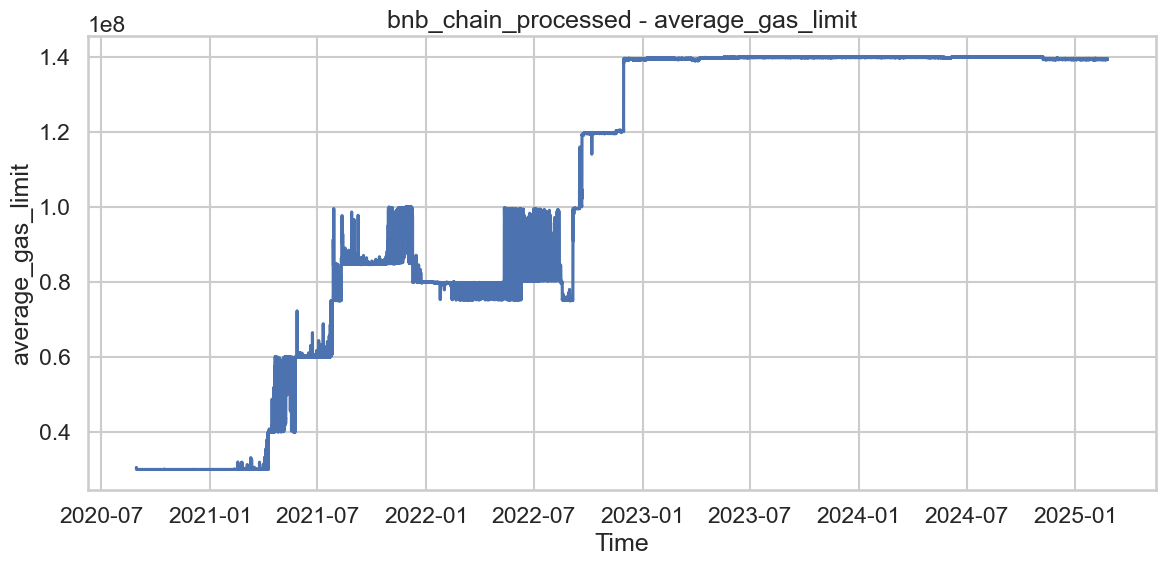

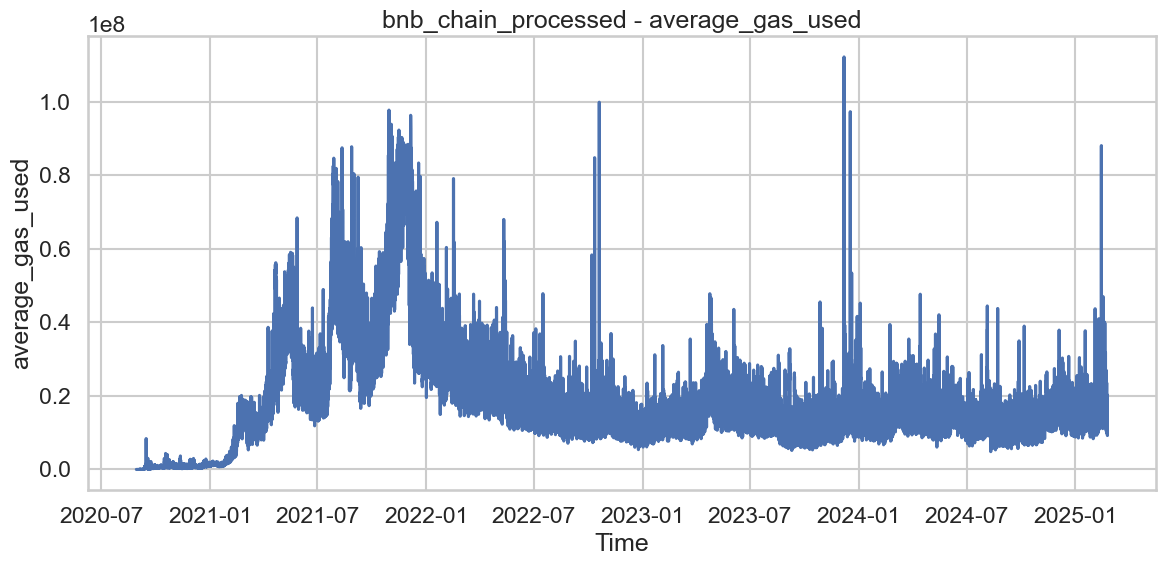

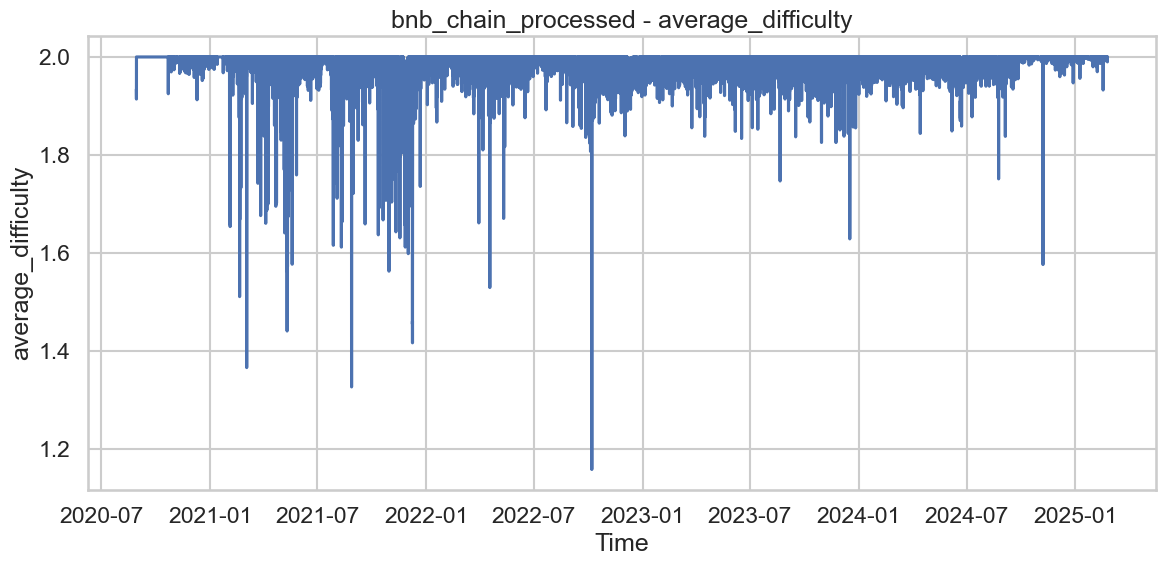

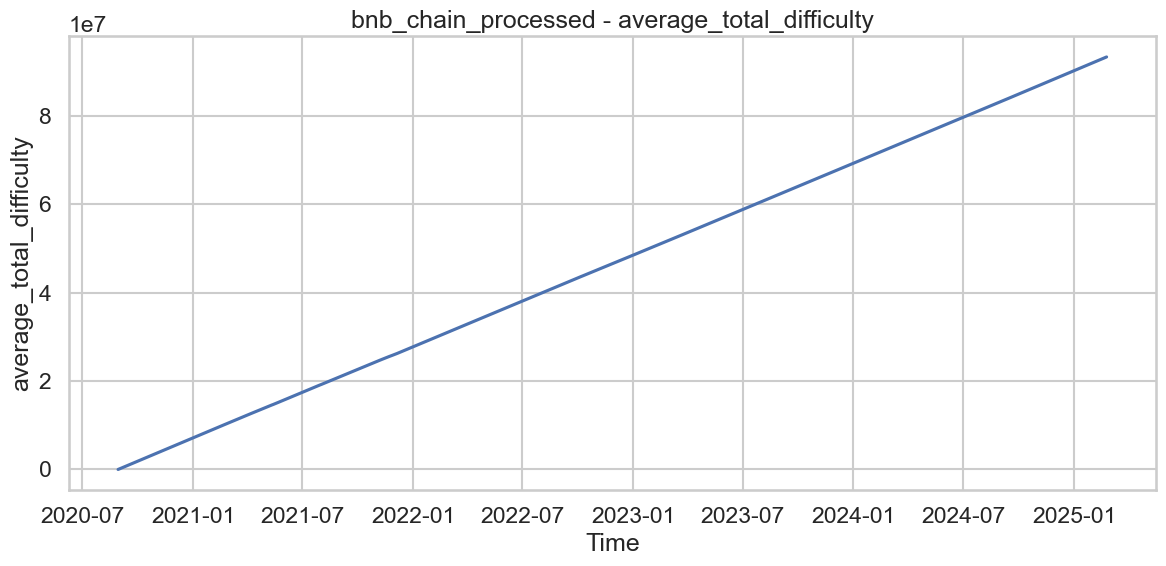

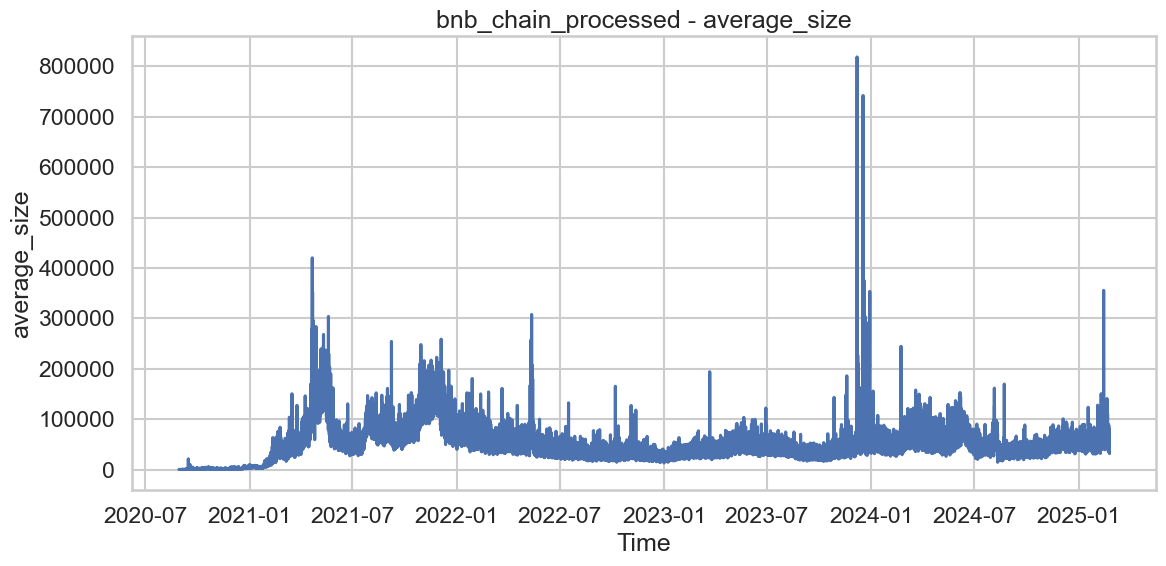

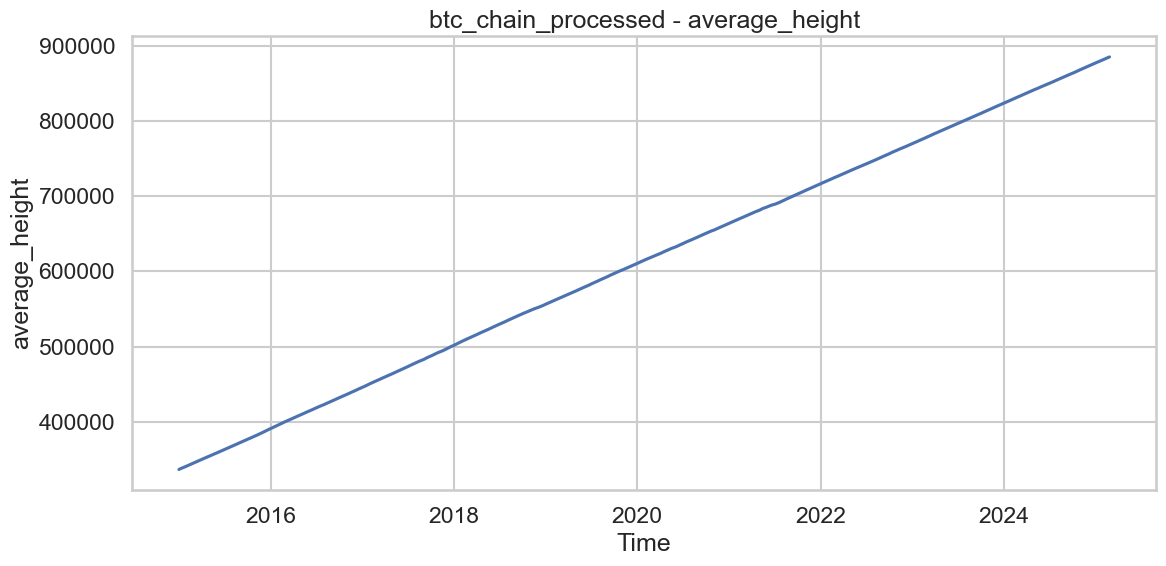

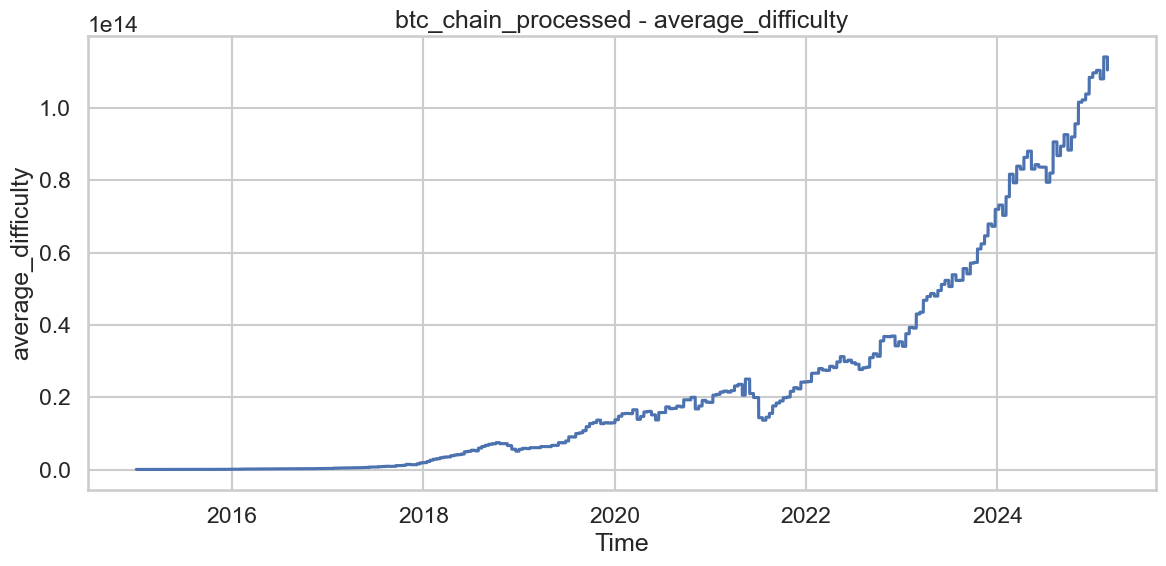

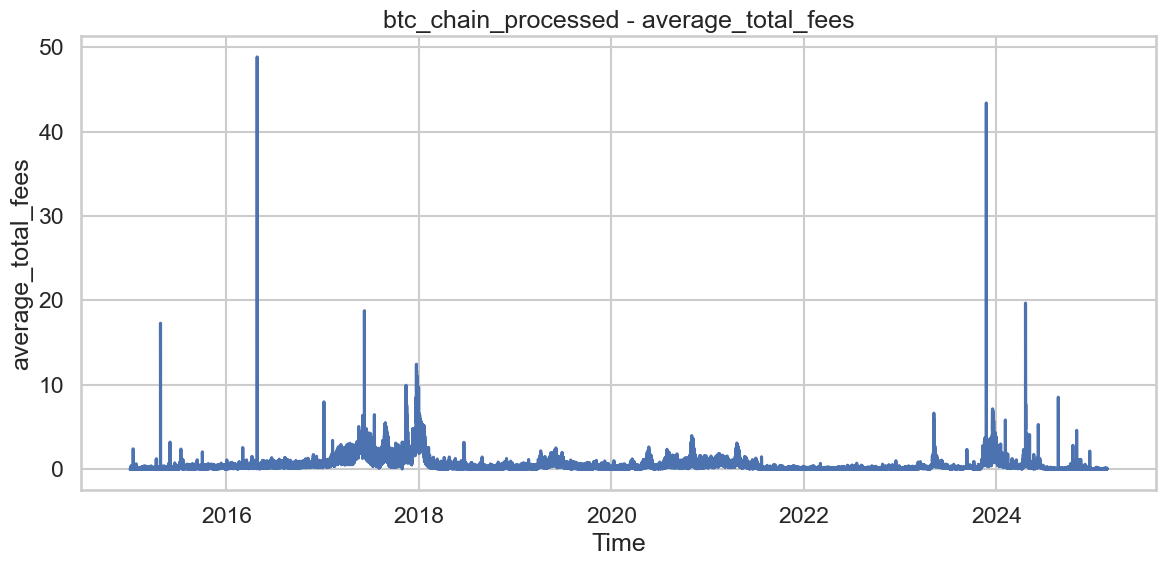

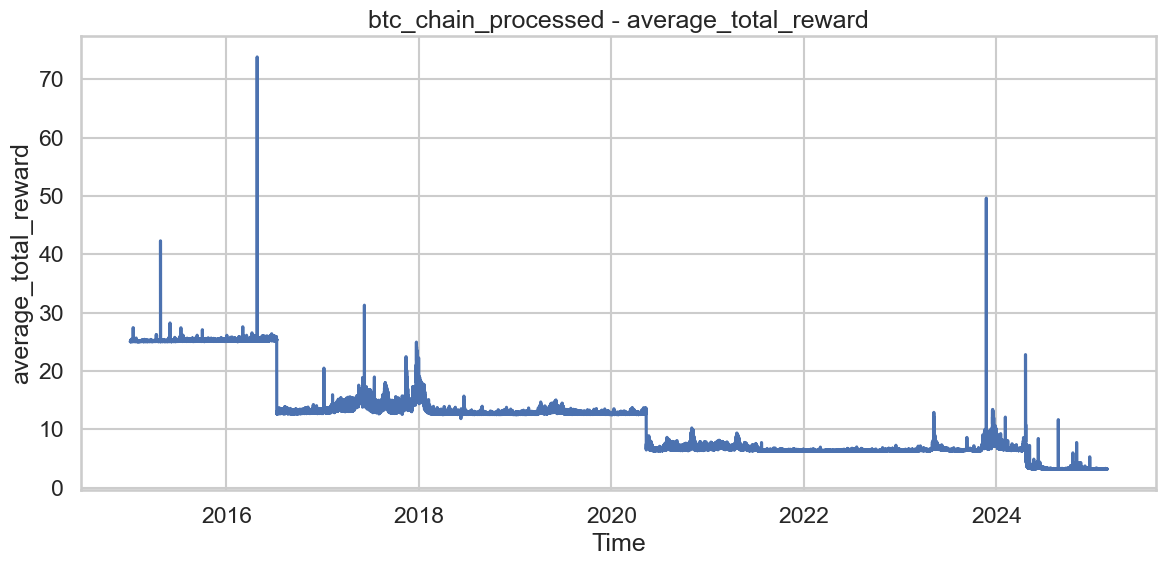

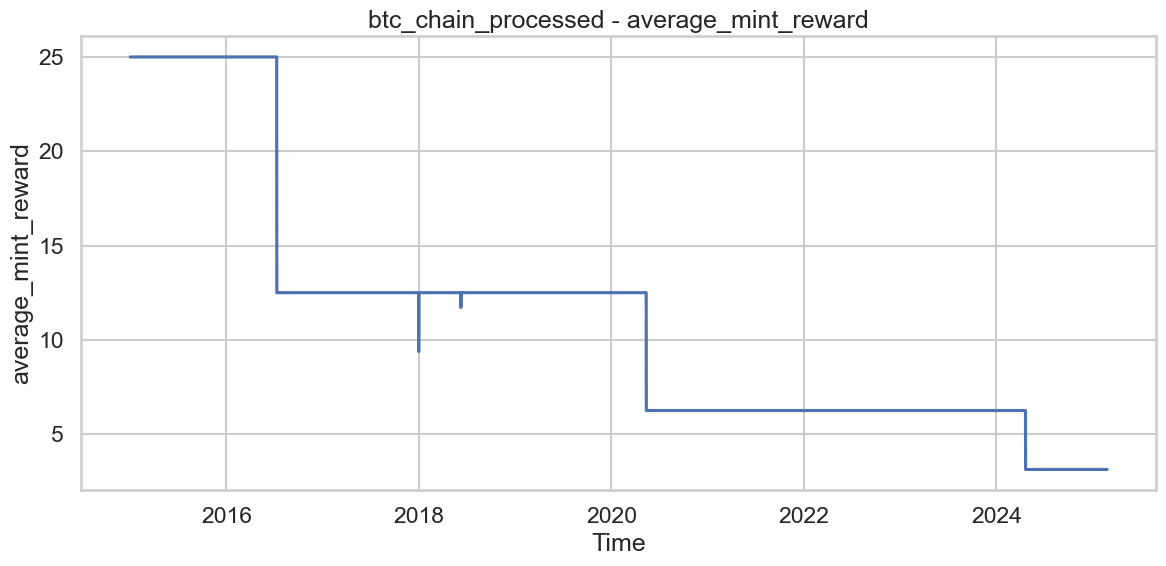

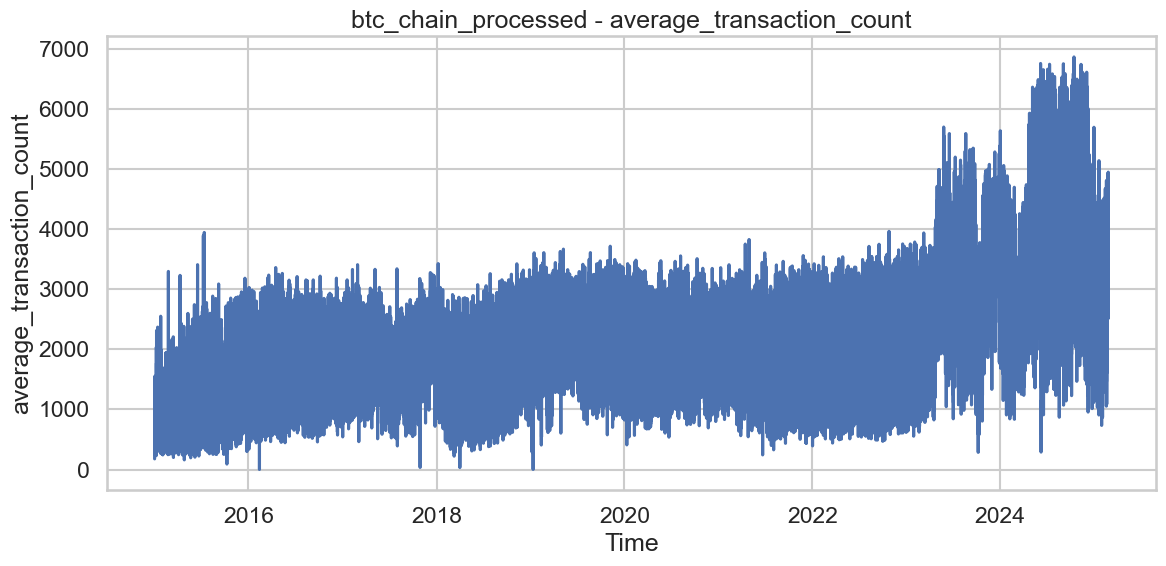

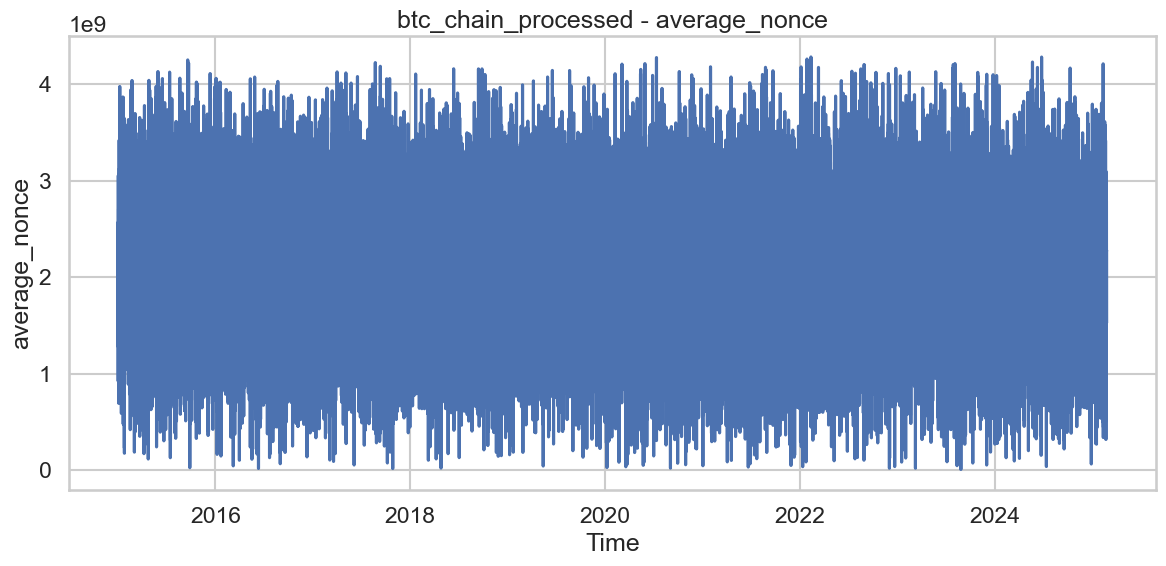

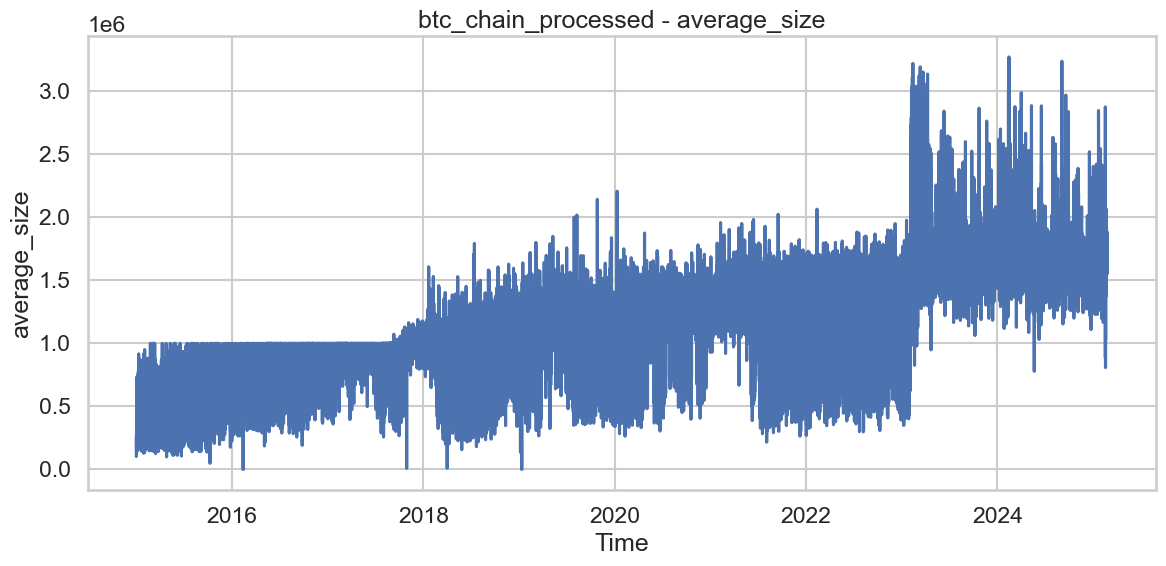

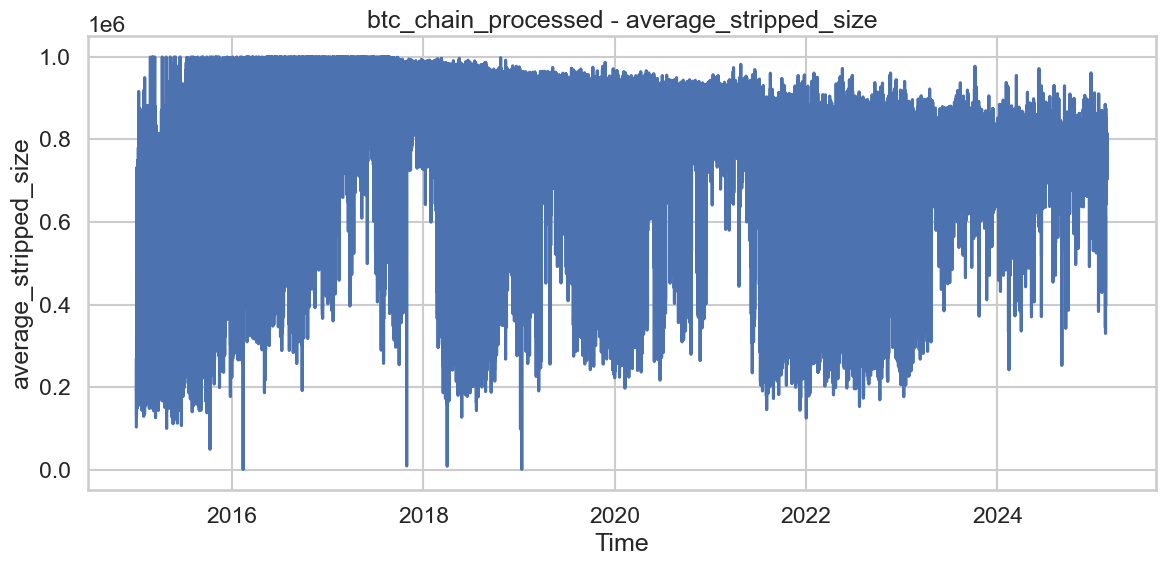

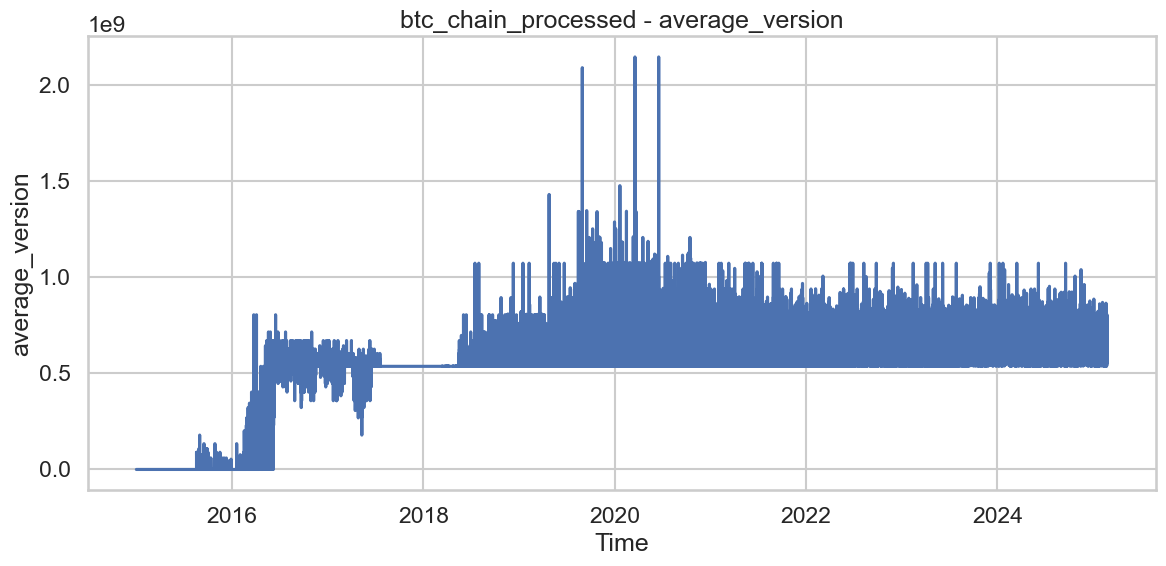

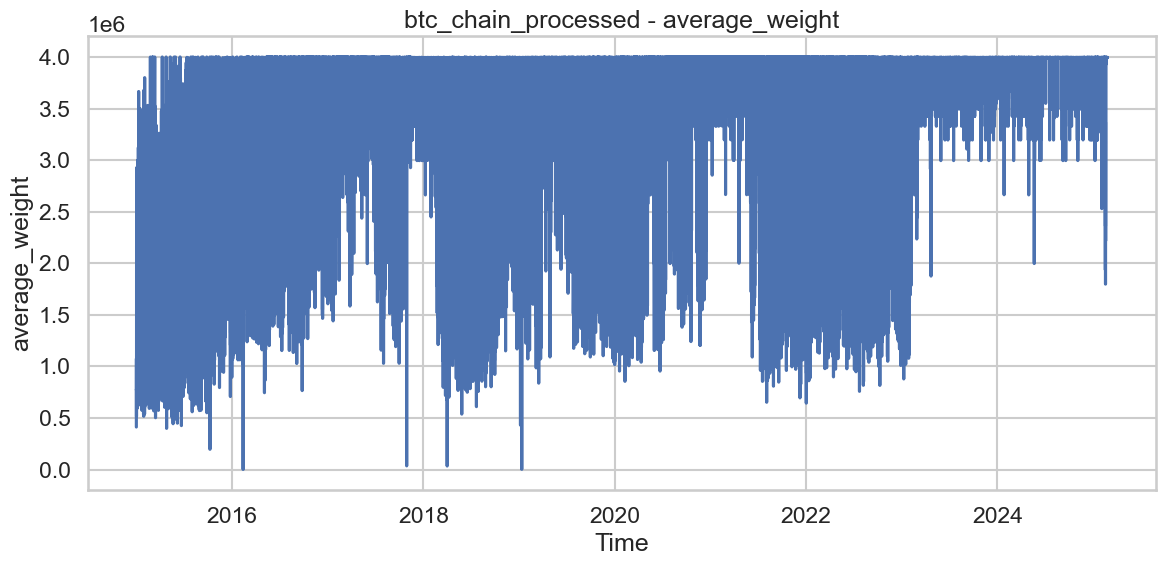

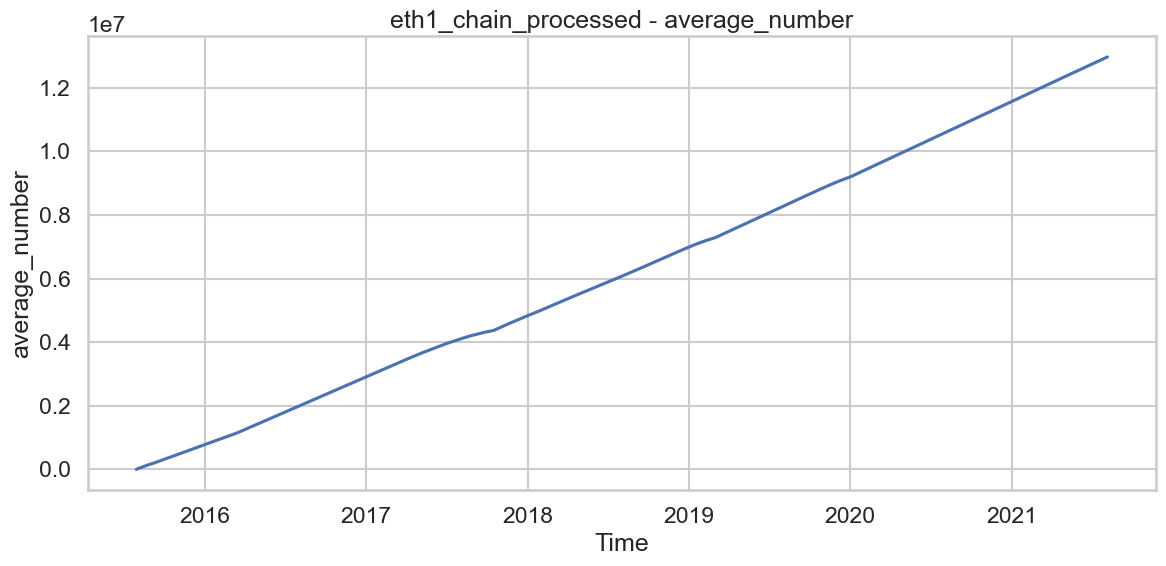

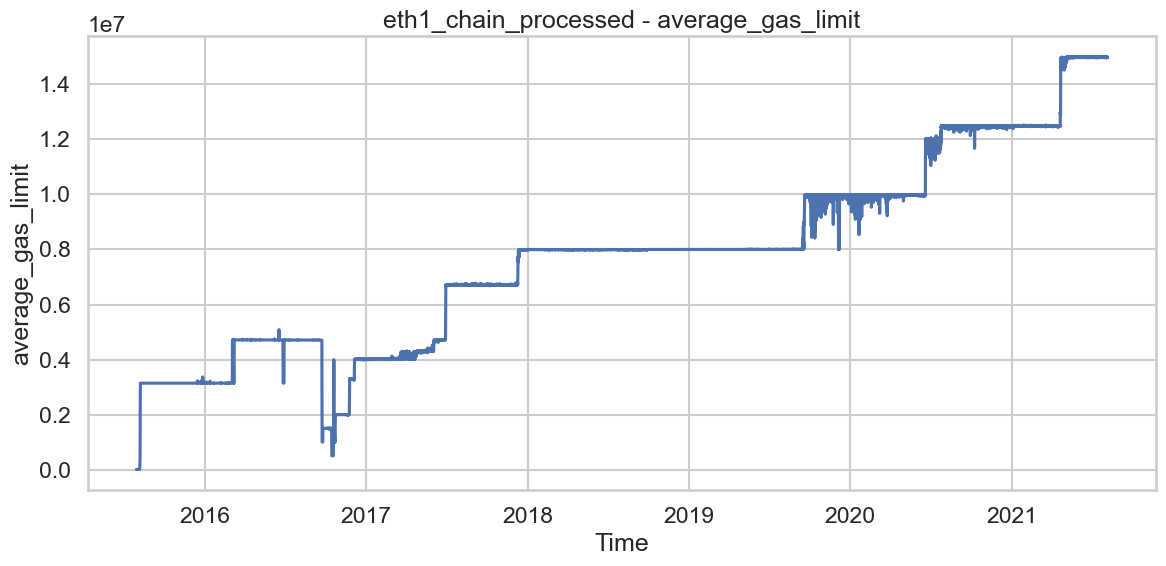

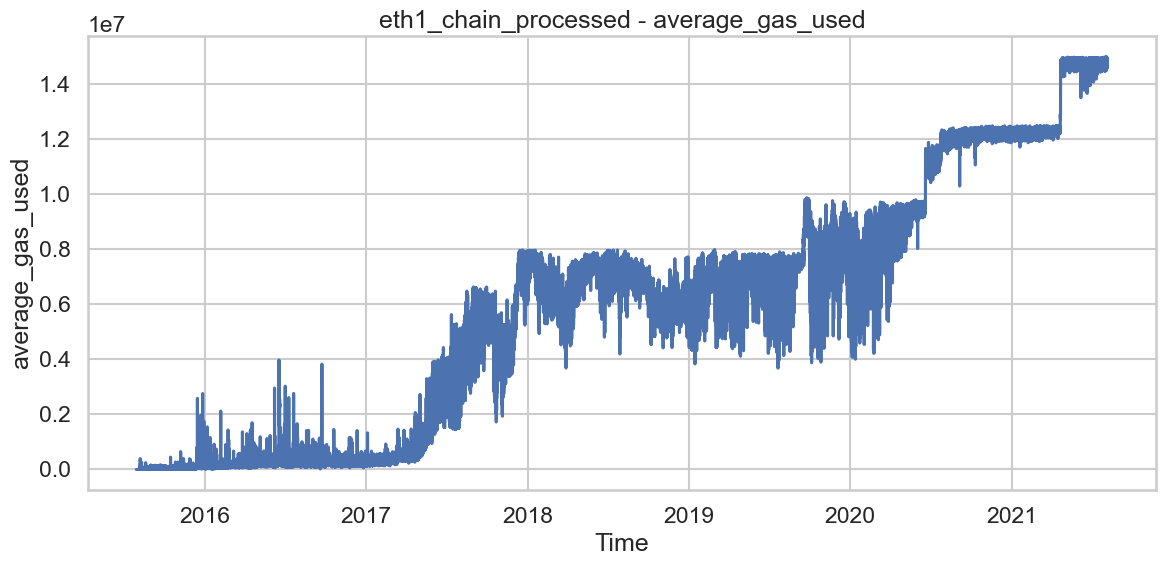

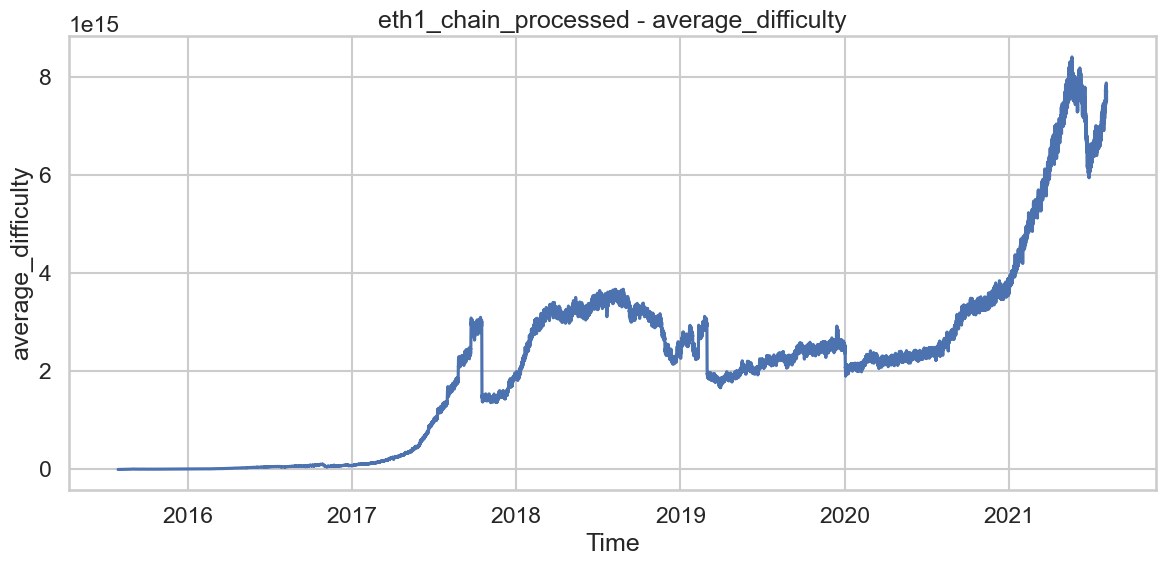

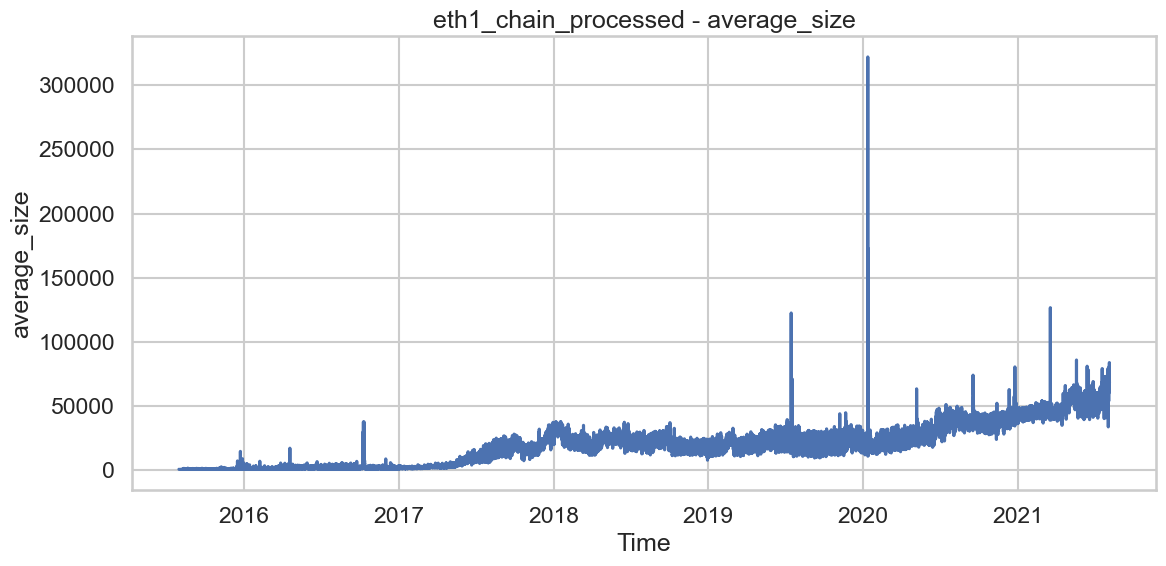

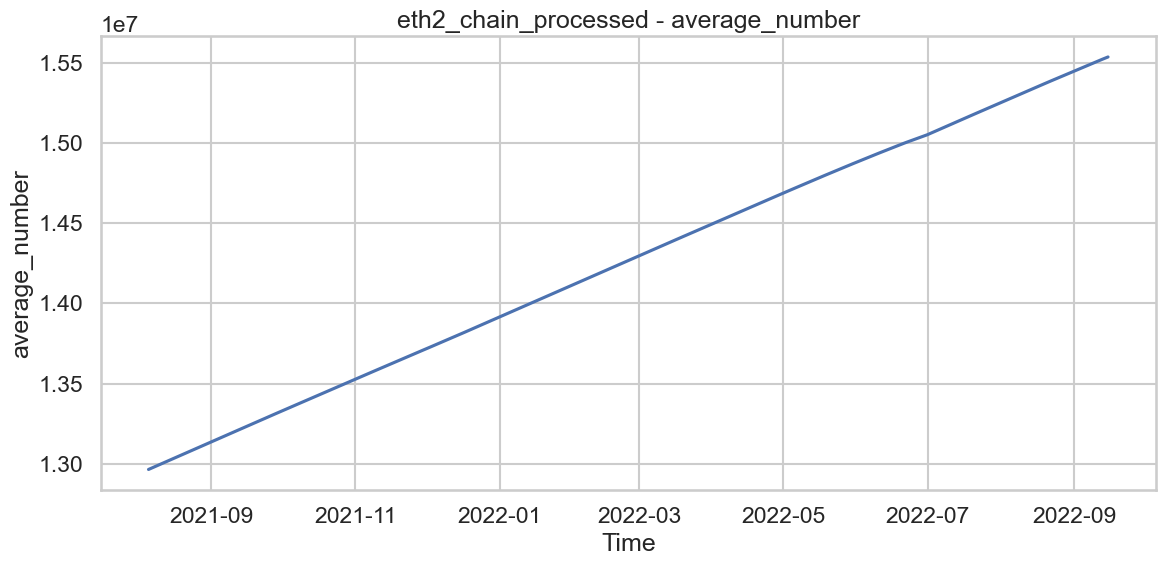

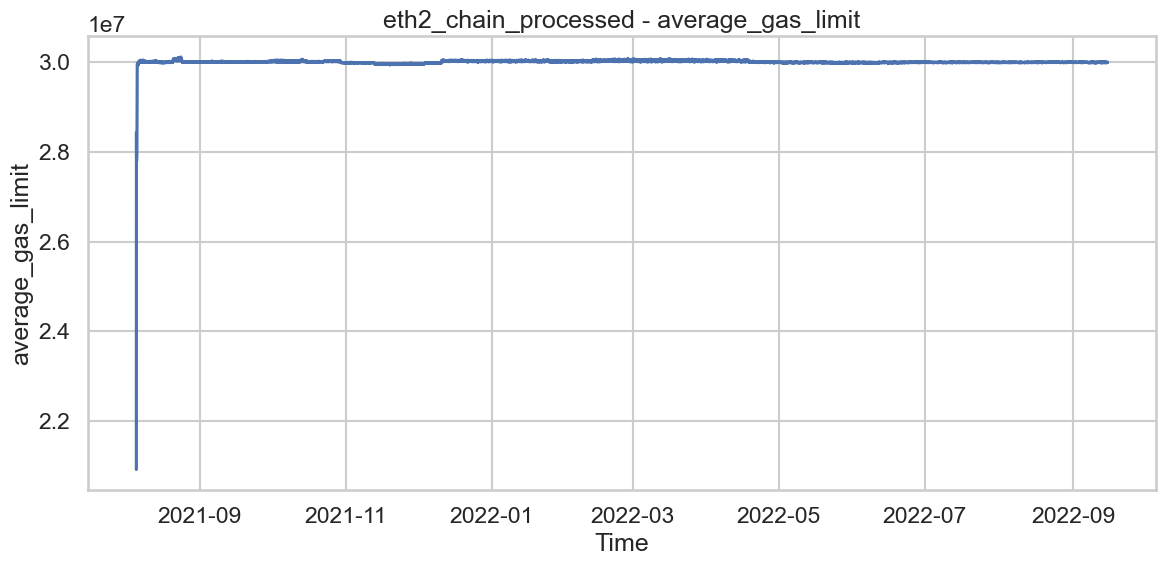

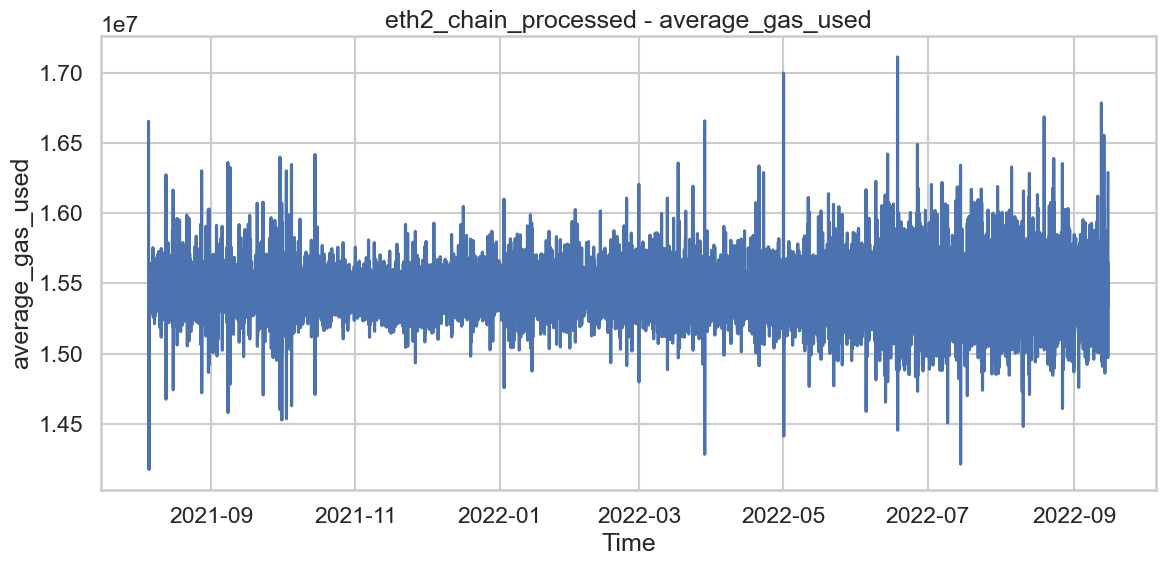

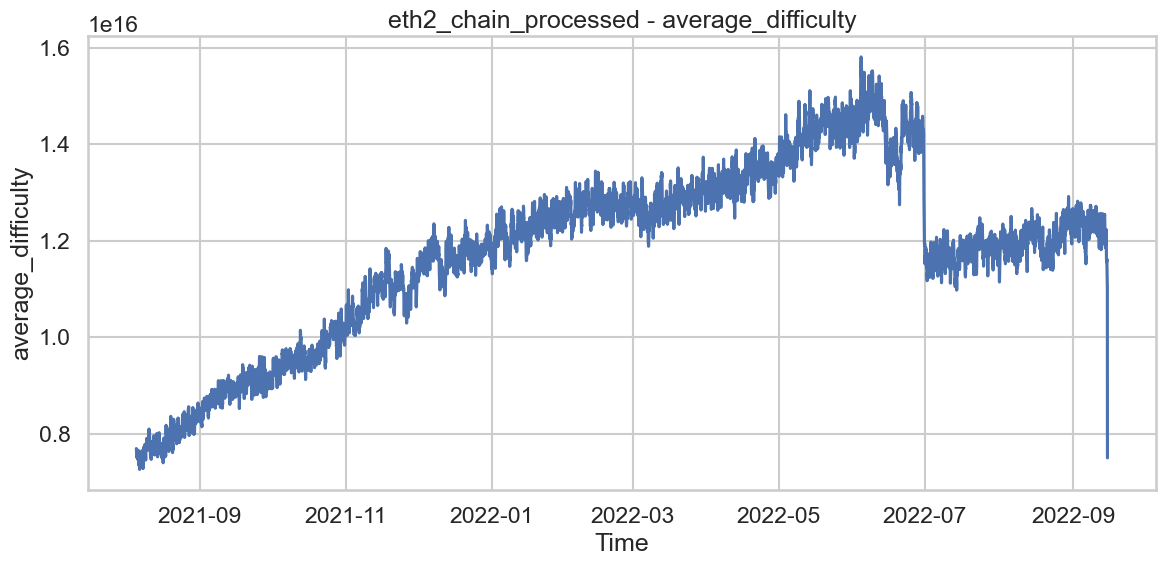

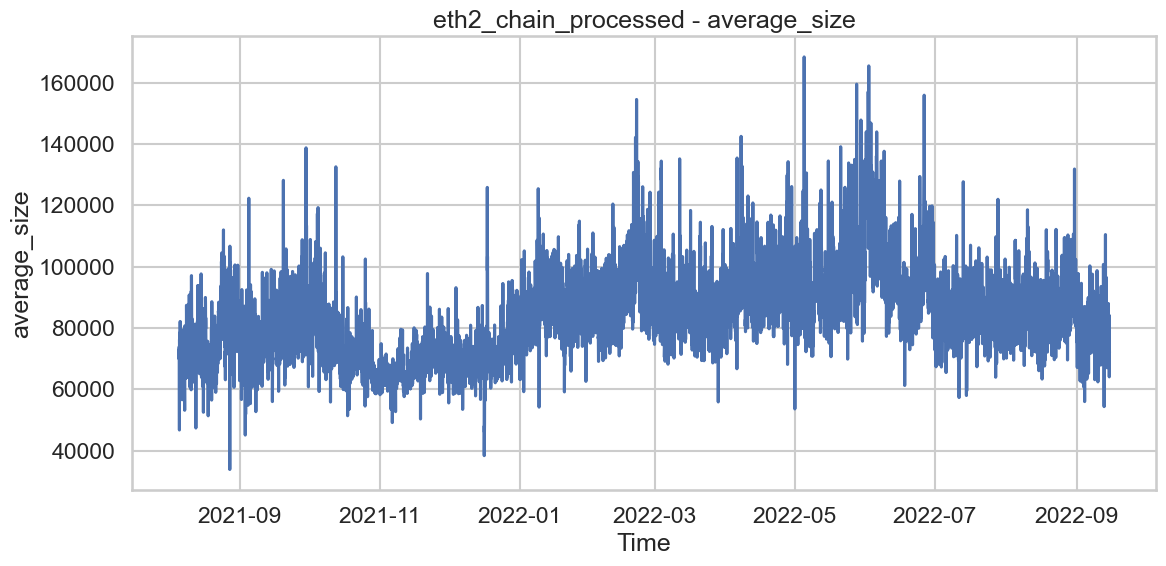

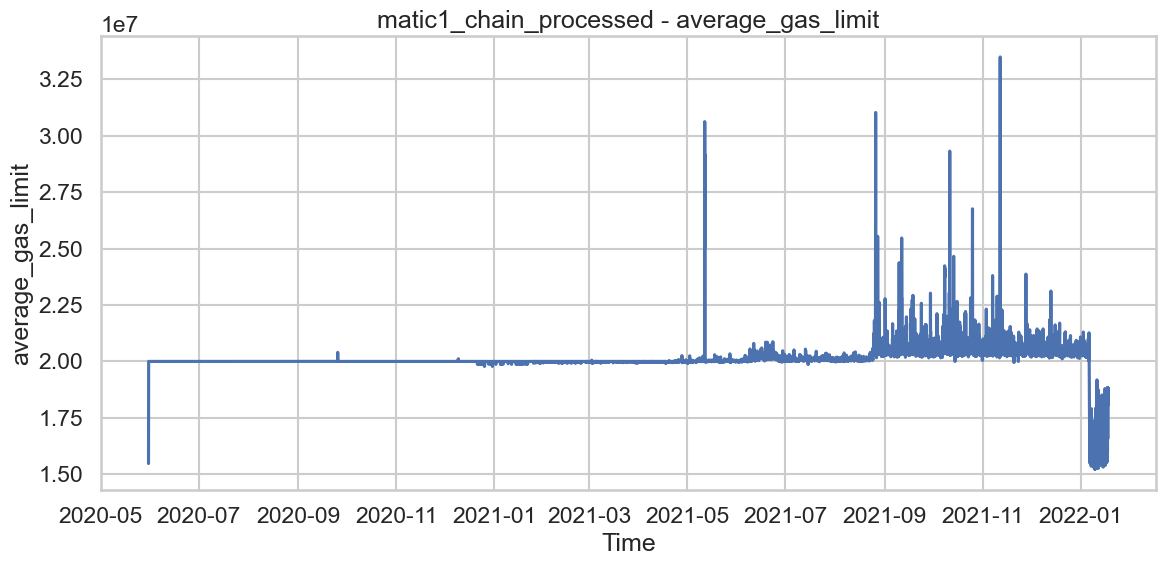

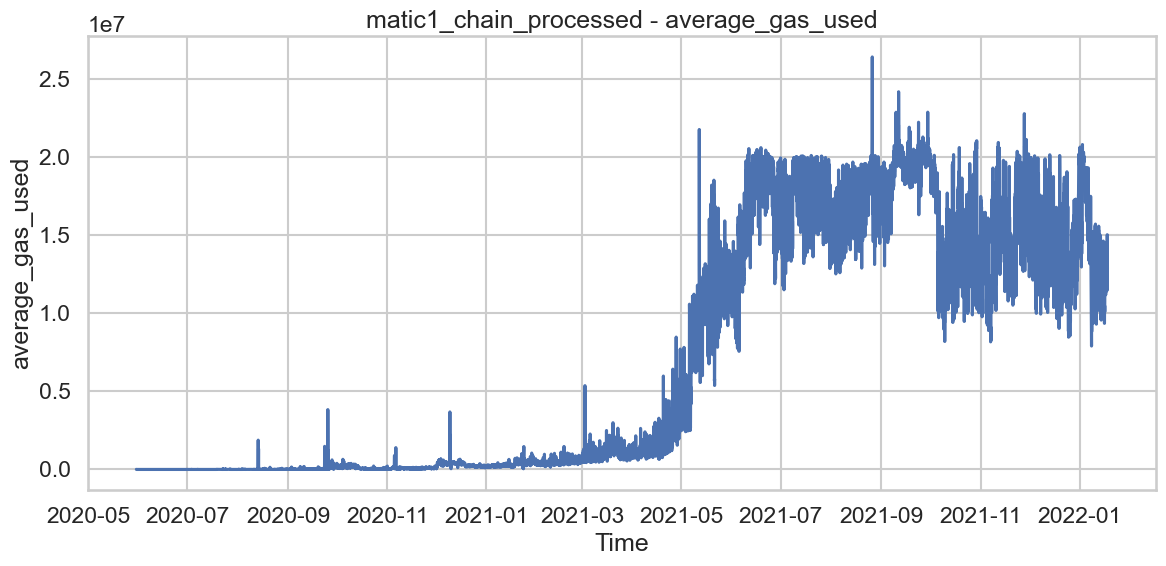

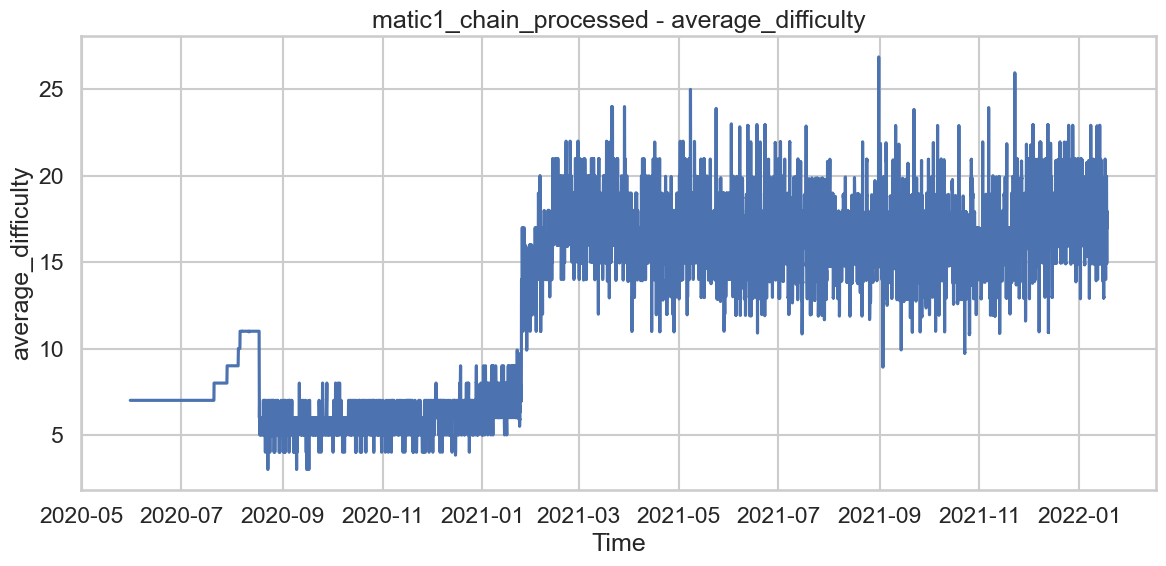

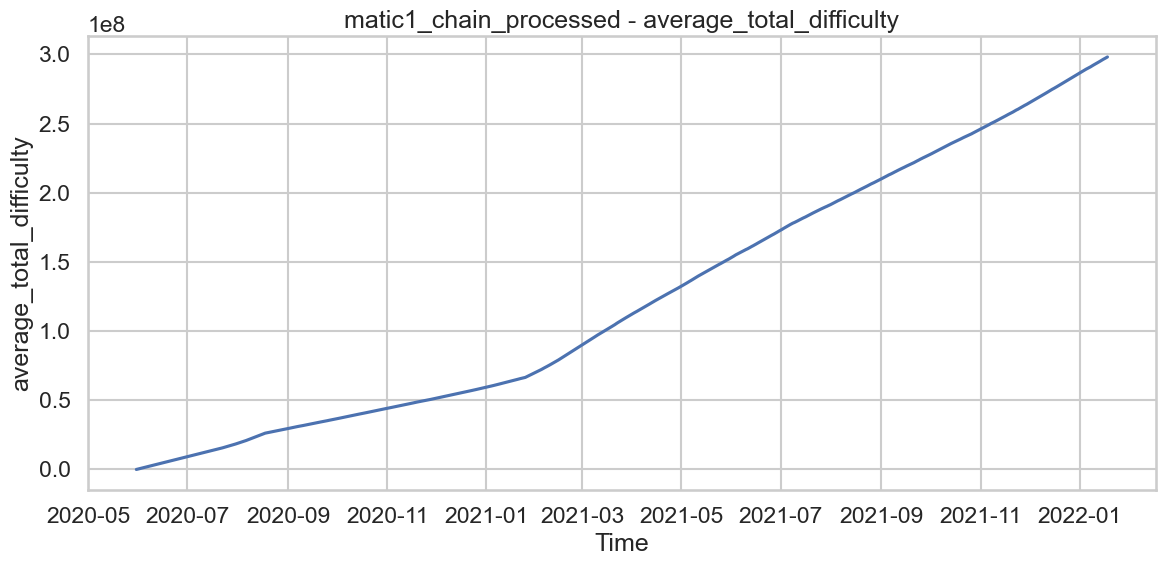

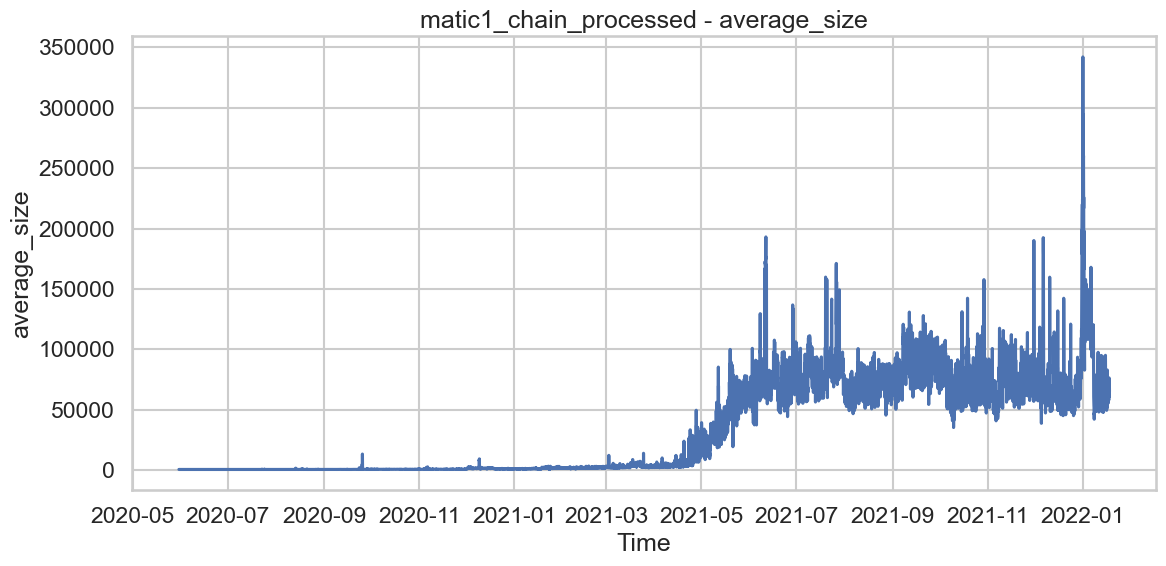

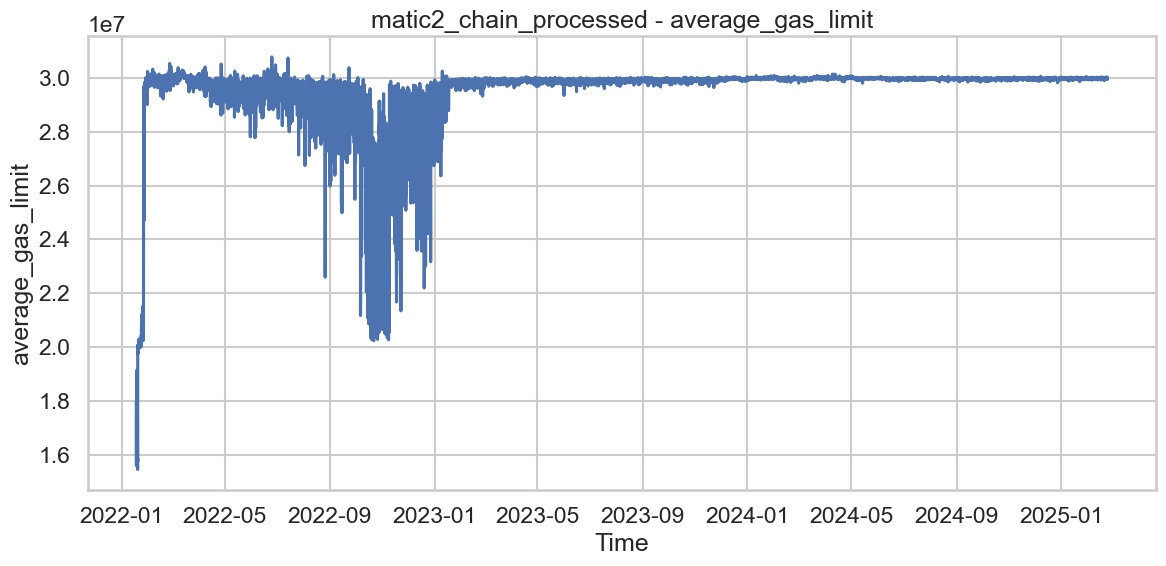

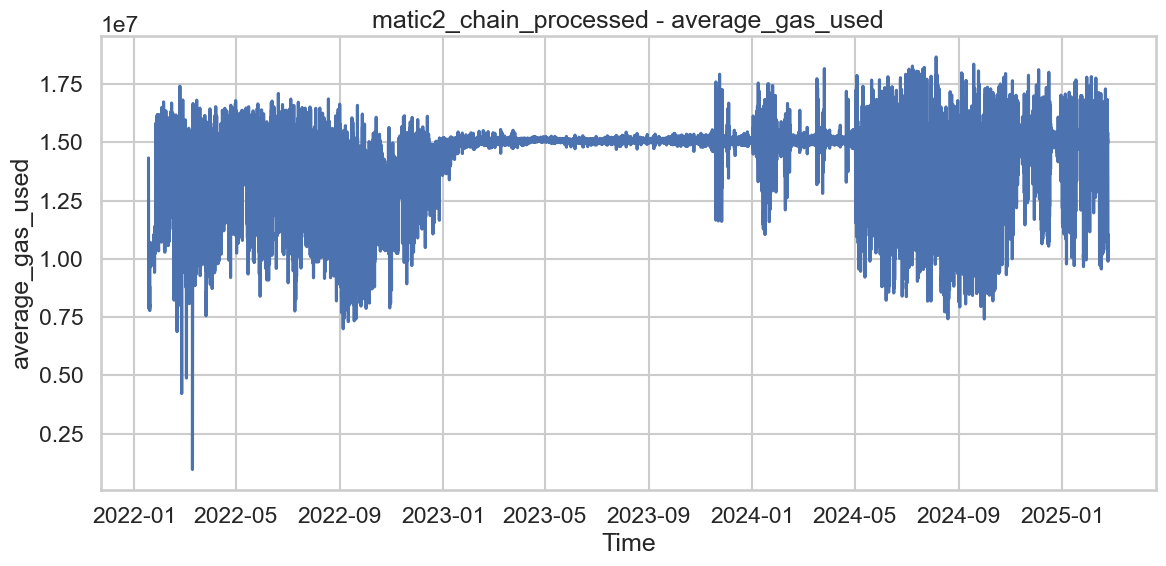

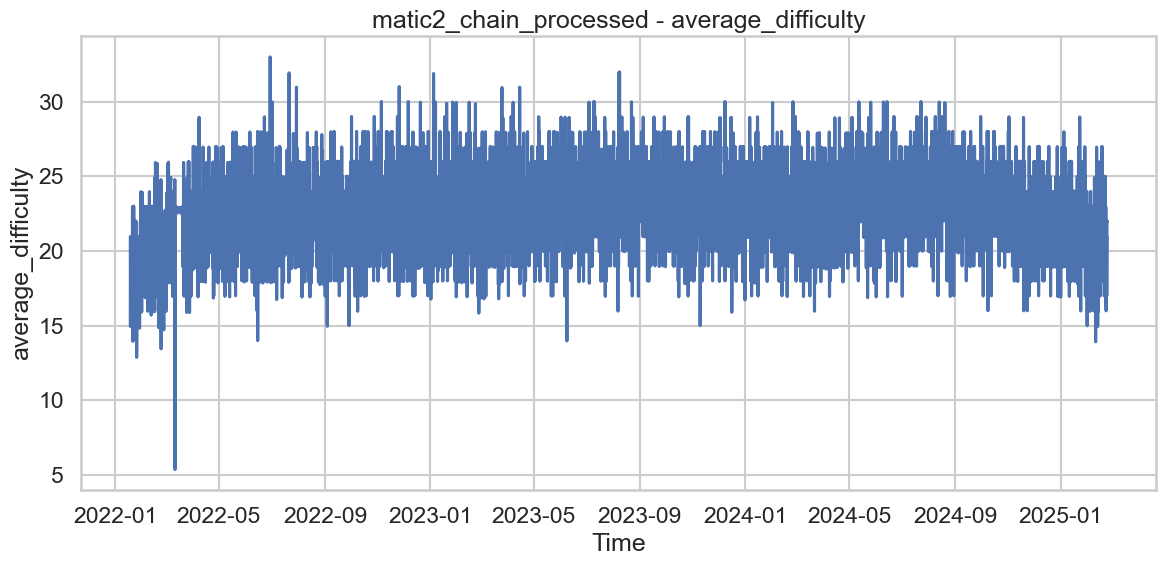

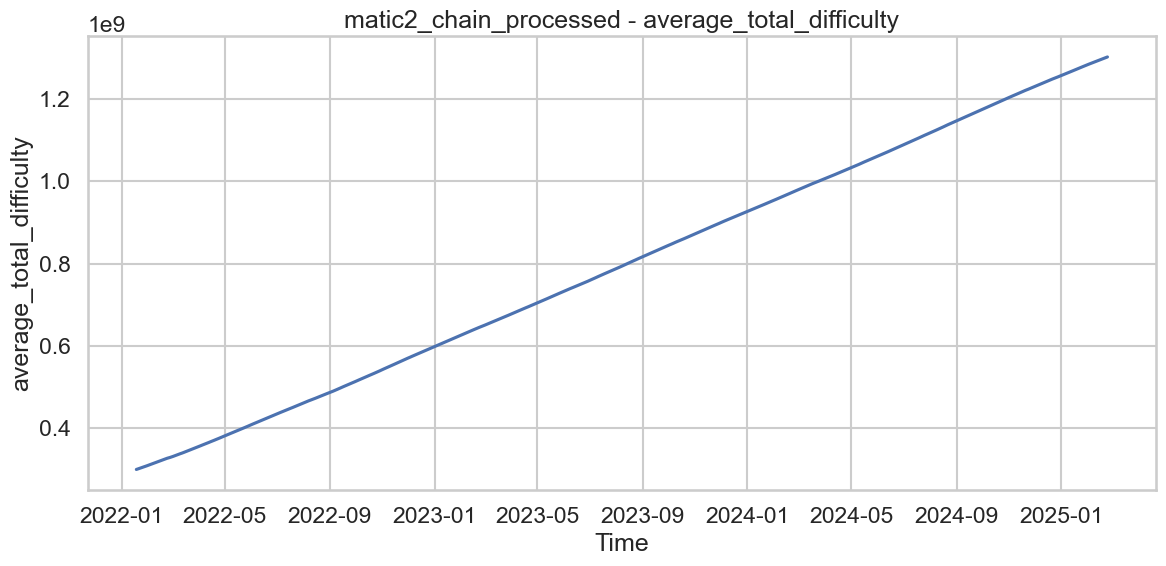

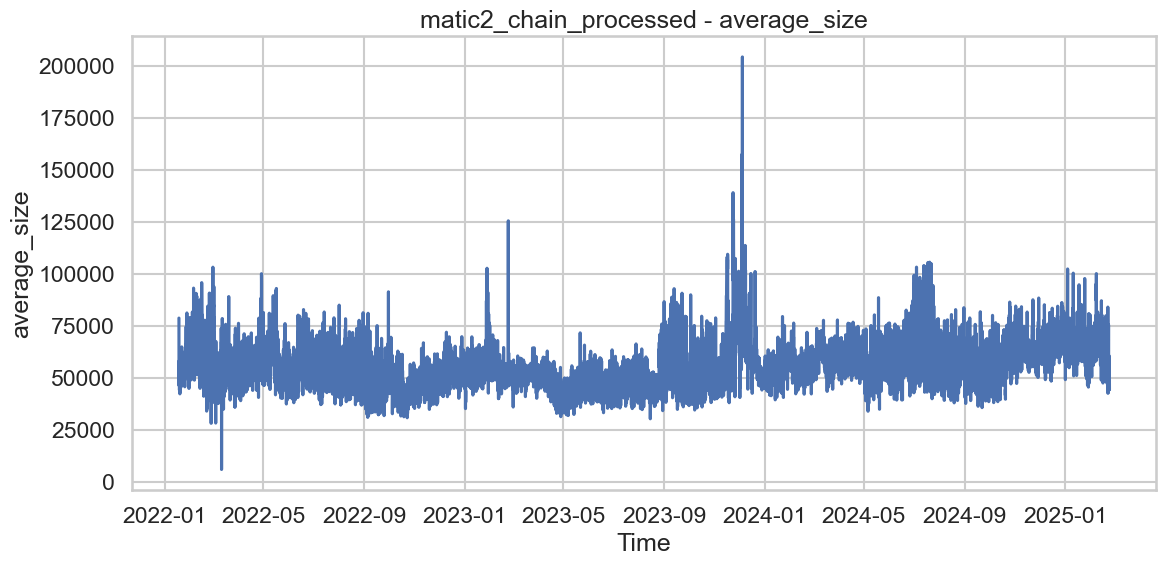

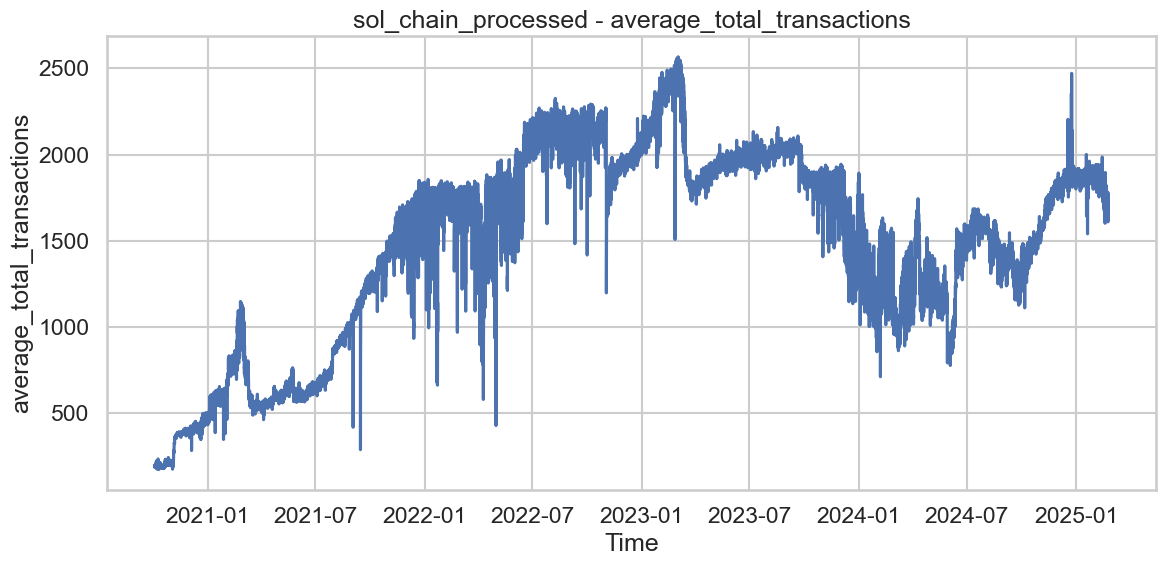

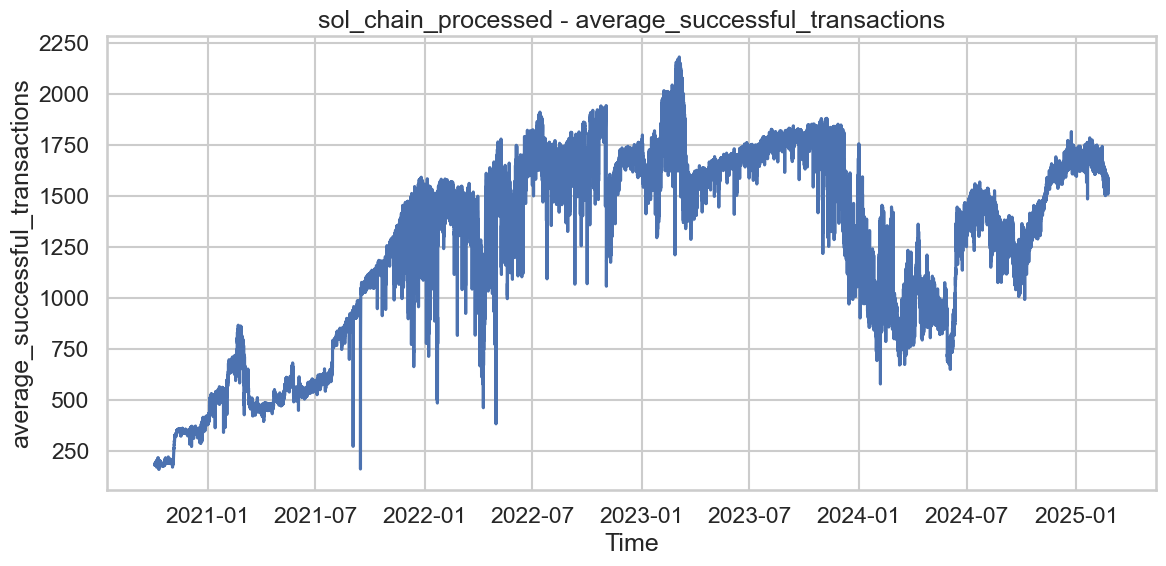

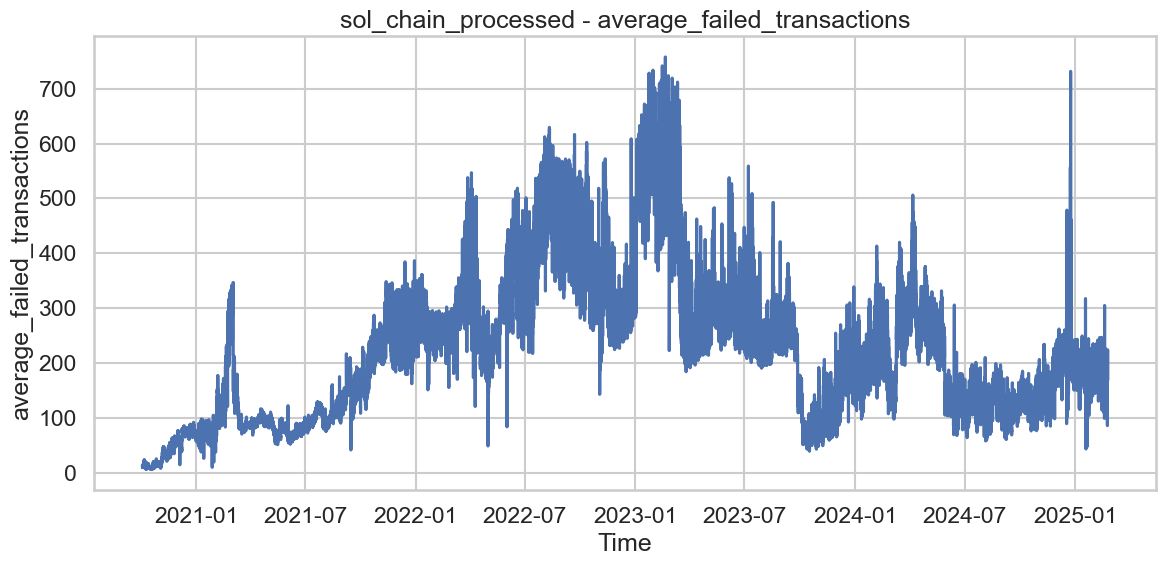

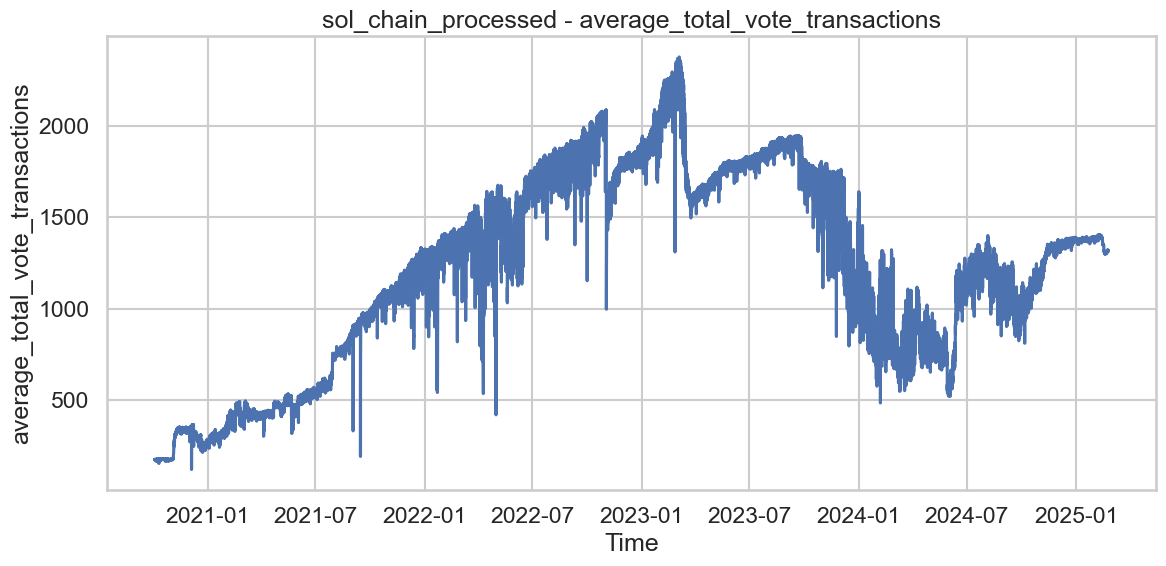

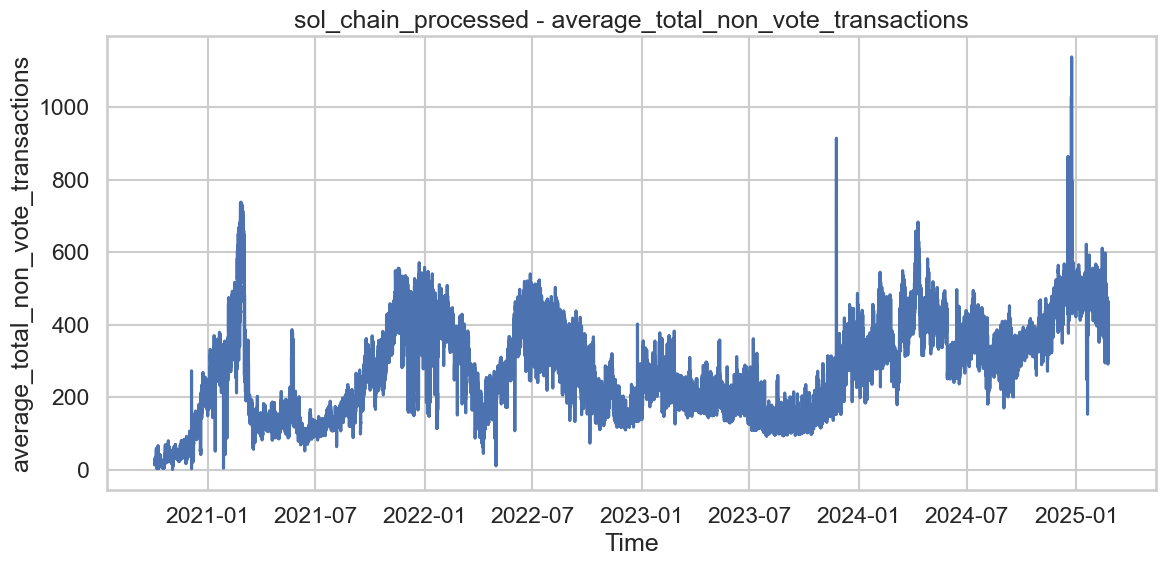

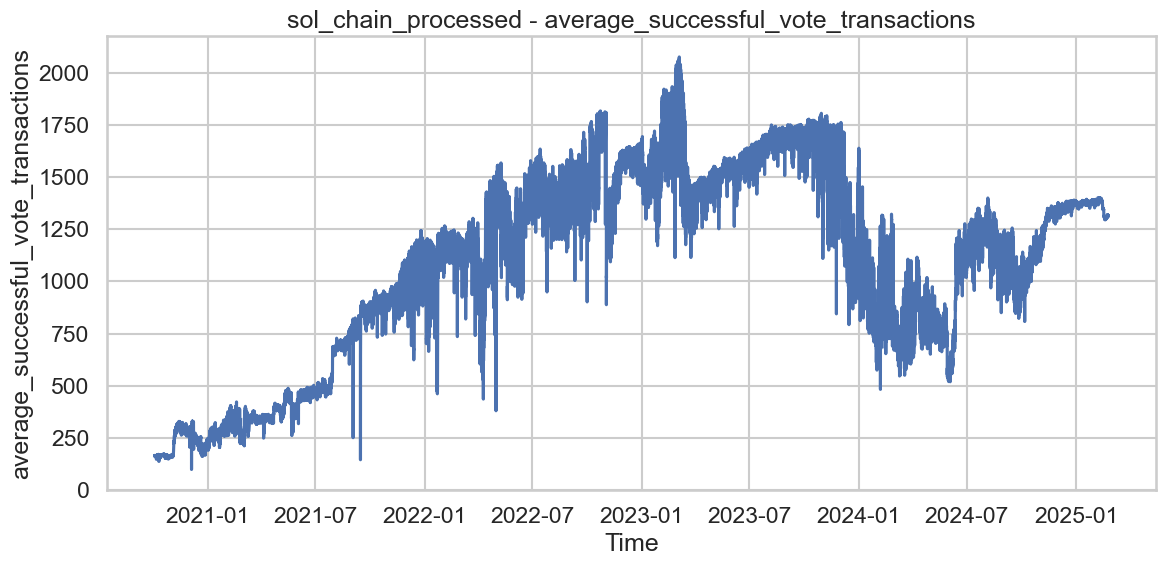

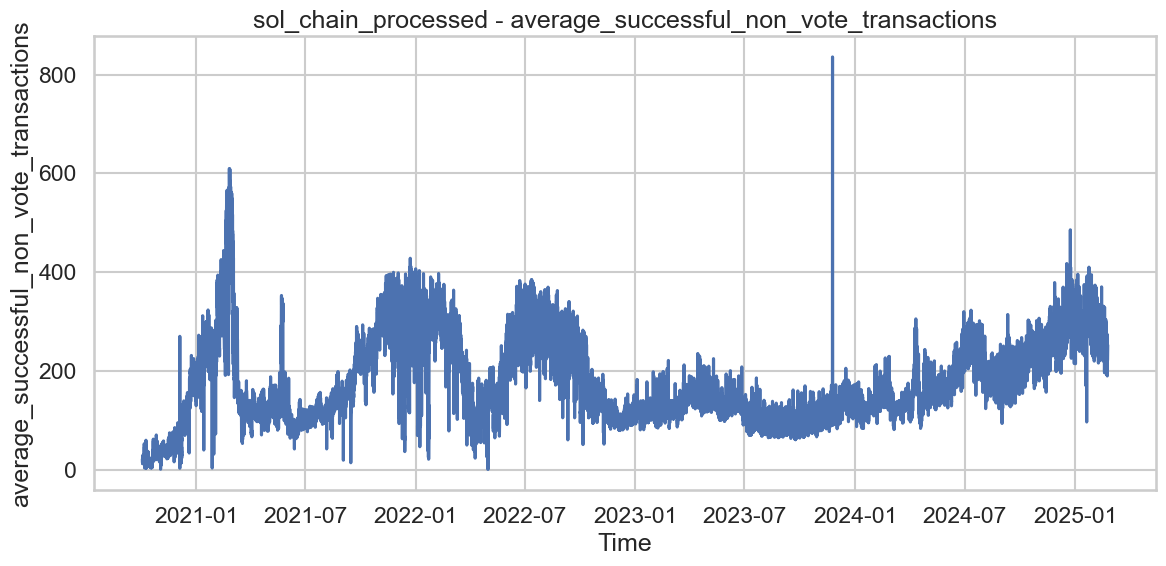

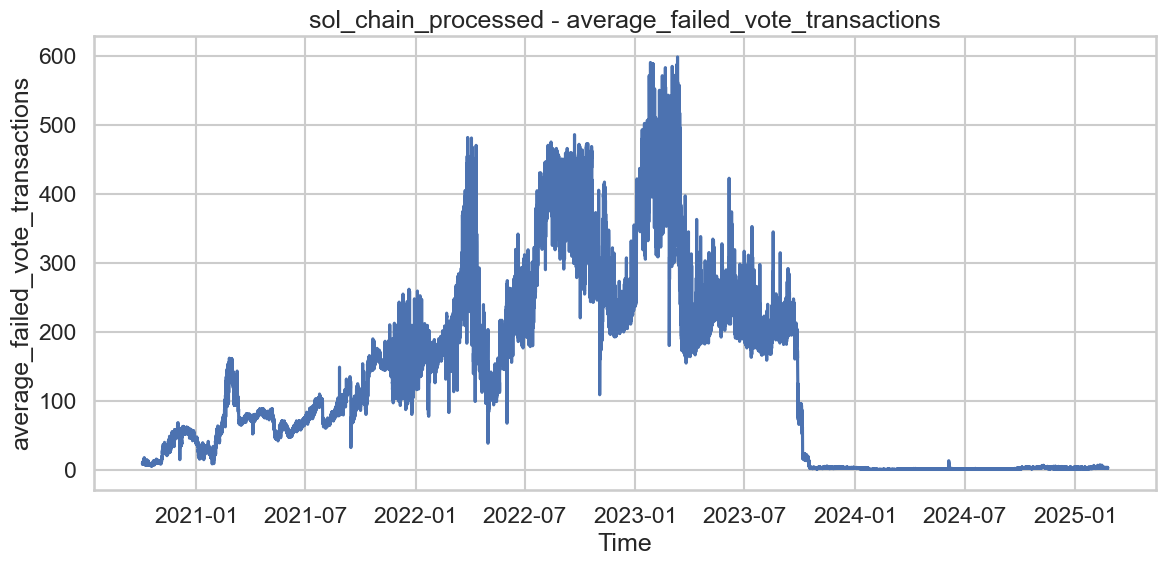

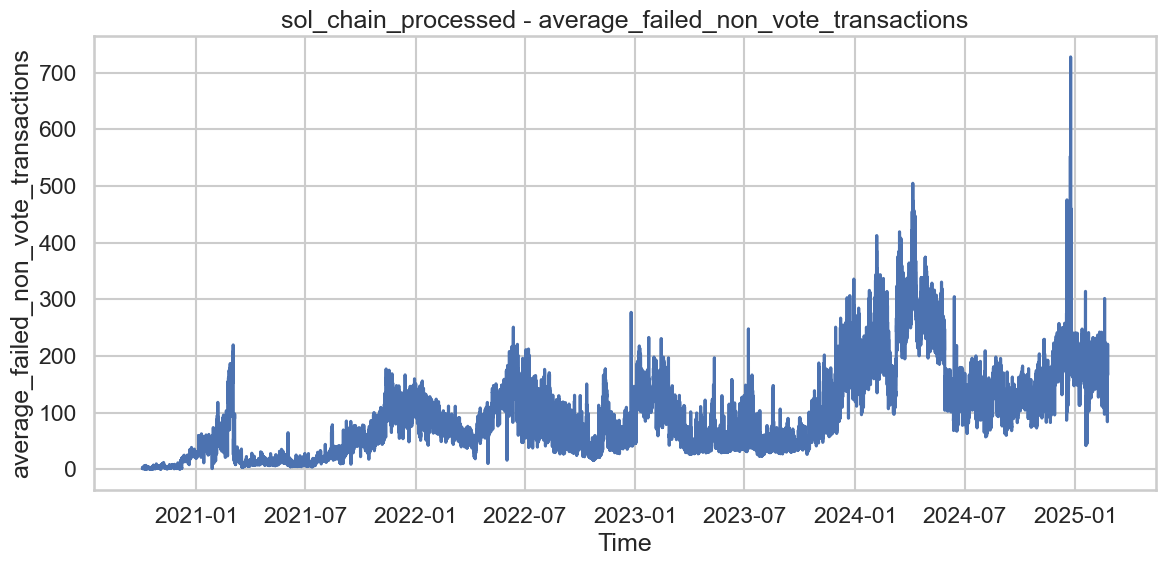

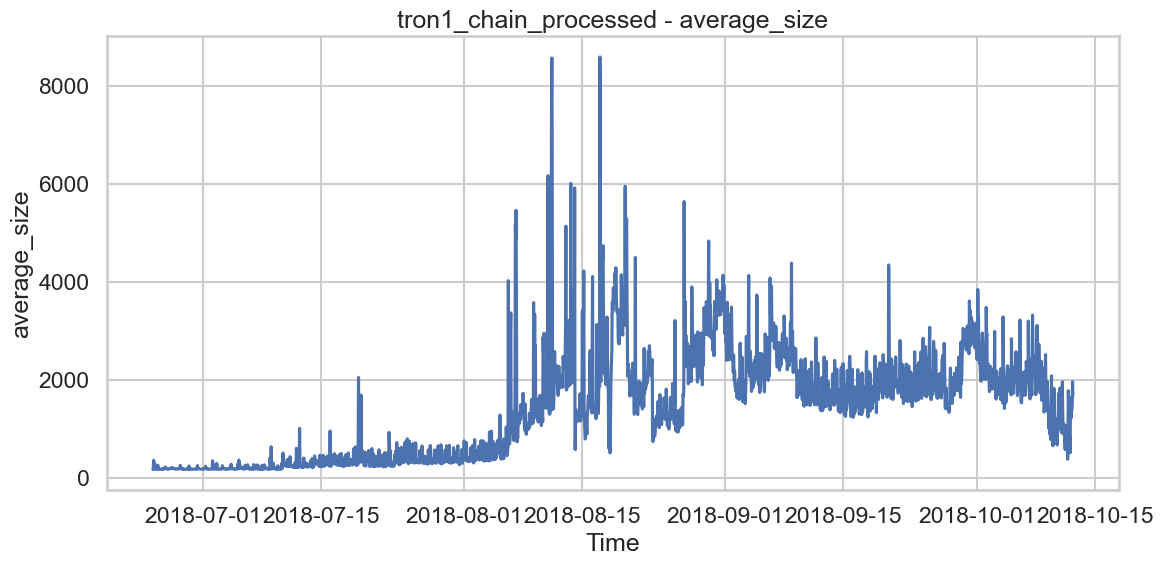

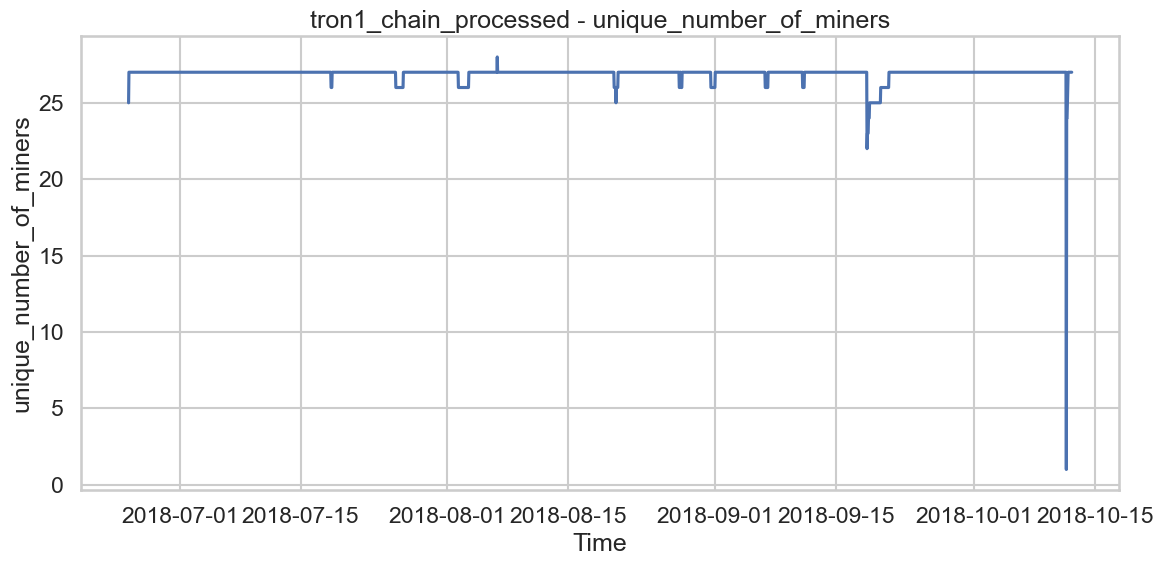

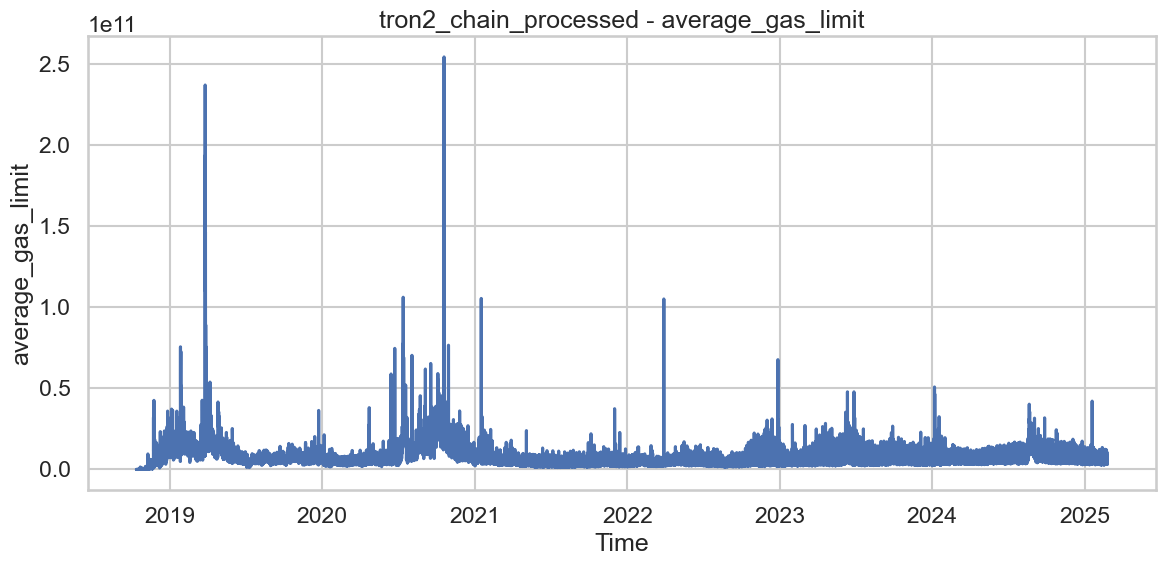

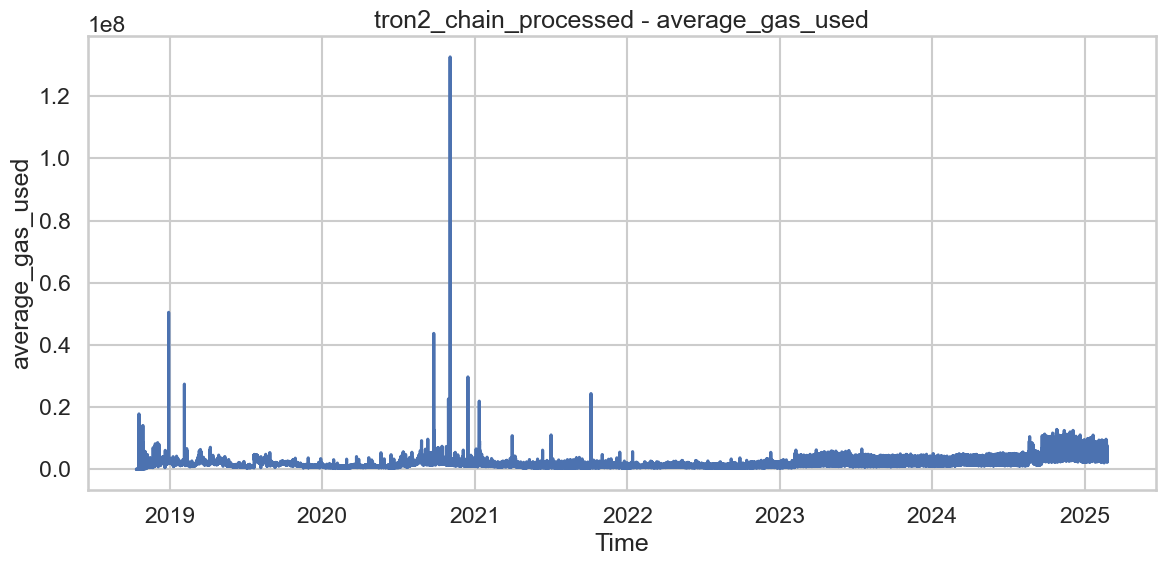

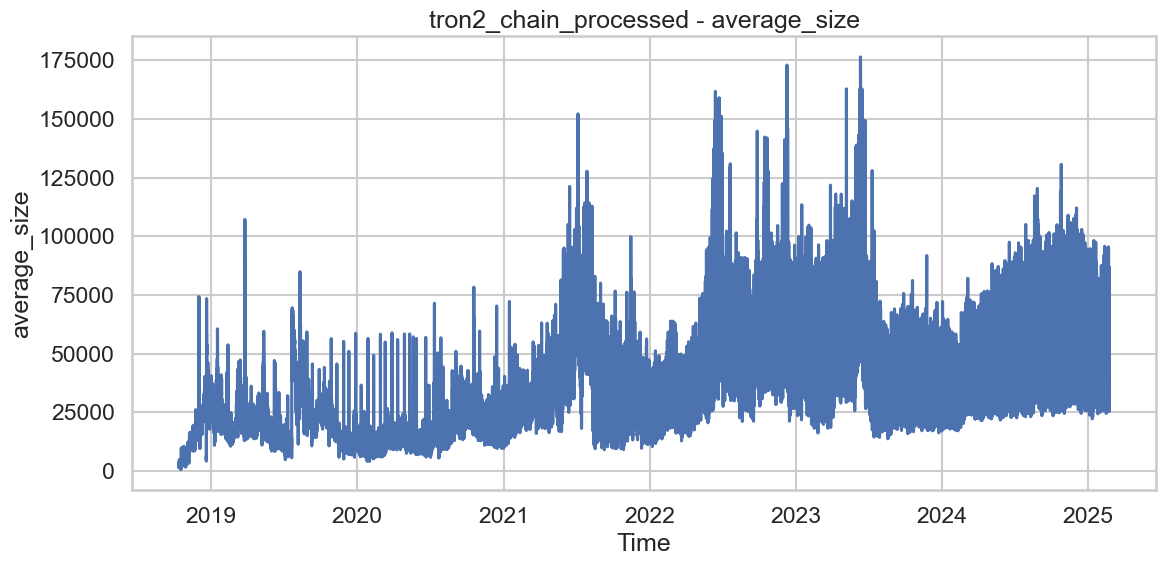

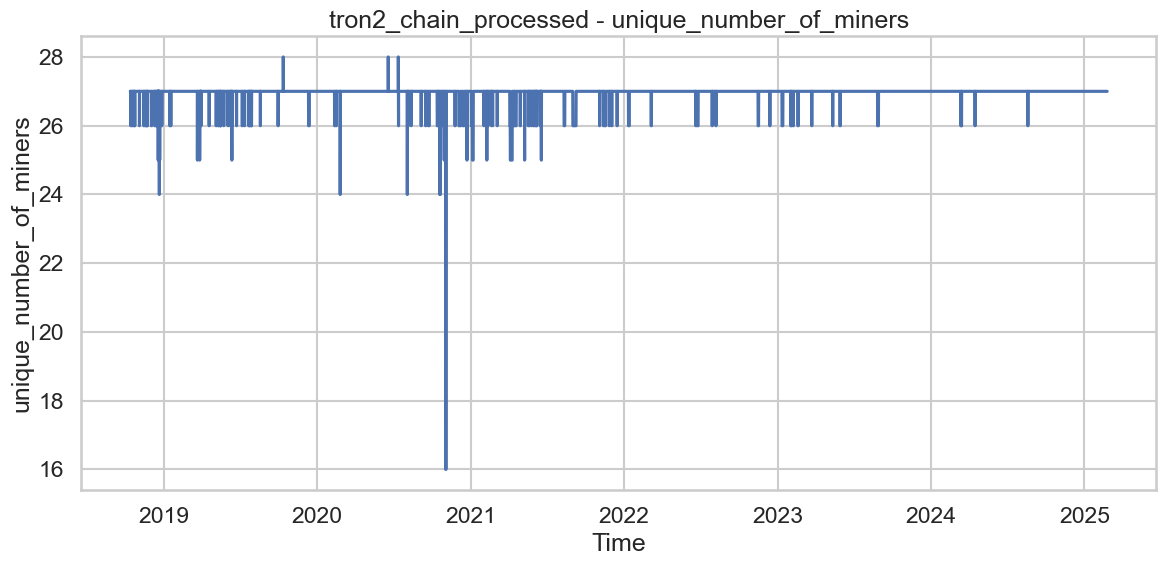

In [32]:
for name, df in dataframes:
    # Ensure the index is a datetime type if possible
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        try:
            df.index = pd.to_datetime(df.index)
        except Exception as e:
            print(f"Warning: Could not convert index to datetime for {name}. Error: {e}")
    
    # Select all columns that do NOT contain "average_base_fee_per_gas"
    columns_to_plot = [col for col in df.columns if "average_base_fee_per_gas" not in col]
    
    for col in columns_to_plot:
        plt.figure(figsize=(12, 6))
        plt.plot(df.index, df[col])
        plt.title(f"{name} - {col}")
        plt.xlabel("Time")
        plt.ylabel(col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

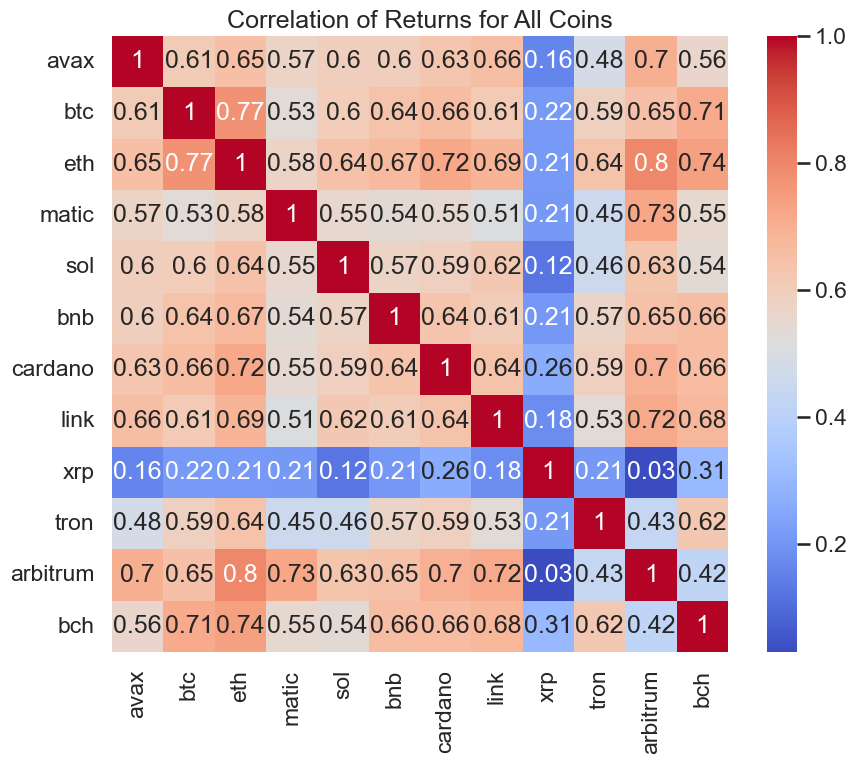

In [ ]:
def plot_return_correlations(df, return_columns=None, title='Correlation of Returns', figsize=(10, 8)):
    if return_columns is None:
        return_columns = df.columns

    corr_matrix = df[return_columns].corr()
    
    corr_matrix.columns = corr_matrix.columns.str.replace('_return', '')
    corr_matrix.index = corr_matrix.index.str.replace('_return', '')
    
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
    plt.title(title)
    plt.show()

plot_return_correlations(all_returns_df, title='Correlation of Returns for All Coins')

In [54]:
eth_price_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/eth_price_processed.parquet')
btc_price_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/btc_price_processed.parquet')
btc_price_processed.head()

time_open                time_close  \
2015-01-14 17:00:00+00:00 2015-01-14 16:07:05+00:00 2015-01-14 16:55:16+00:00   
2015-01-14 18:00:00+00:00 2015-01-14 16:07:05+00:00 2015-01-14 16:55:16+00:00   
2015-01-14 19:00:00+00:00 2015-01-14 18:50:59+00:00 2015-01-14 18:50:59+00:00   
2015-01-14 20:00:00+00:00 2015-01-14 19:05:36+00:00 2015-01-14 19:40:43+00:00   
2015-01-14 21:00:00+00:00 2015-01-14 19:05:36+00:00 2015-01-14 19:40:43+00:00   

                           price_open  price_high  price_low  price_close  \
2015-01-14 17:00:00+00:00      173.93      197.97      110.2       185.91   
2015-01-14 18:00:00+00:00      173.93      197.97      110.2       185.91   
2015-01-14 19:00:00+00:00      186.00      186.00      186.0       186.00   
2015-01-14 20:00:00+00:00      186.00      188.00      120.0       120.00   
2015-01-14 21:00:00+00:00      186.00      188.00      120.0       120.00   

                           volume_traded  trades_count  
2015-01-14 17:00:00+00:00       1.050000         105.0  
2015-01-14 18:00:00+00:00       1.050000         105.0  
2015-01-14 19:00:00+00:00       0.015362           1.0  
2015-01-14 20:00:00+00:00       0.264638          14.0  
2015-01-14 21:00:00+00:00       0.264638          14.0

In [48]:
def plot_cumulative_returns(
    df, 
    time_col='time_close', 
    price_col='price_close', 
    title='Cumulative Returns Over Time'
):
    
    df = df.sort_values(by=time_col).reset_index(drop=True)
    
    df['returns'] = df[price_col].pct_change()
    
    df['cumulative_returns'] = (1 + df['returns']).cumprod() - 1
    
    plt.figure(figsize=(10, 6))
    plt.plot(df[time_col], df['cumulative_returns'], label='Cumulative Returns')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

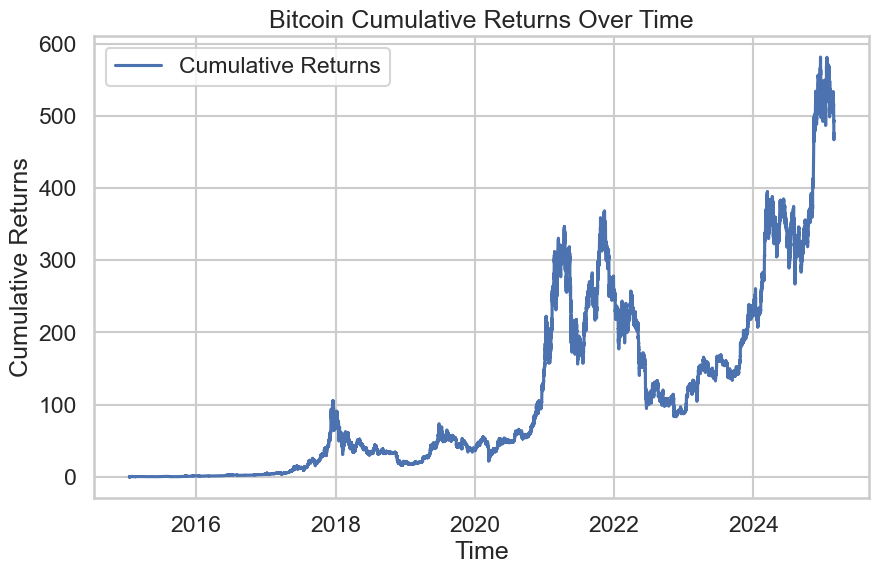

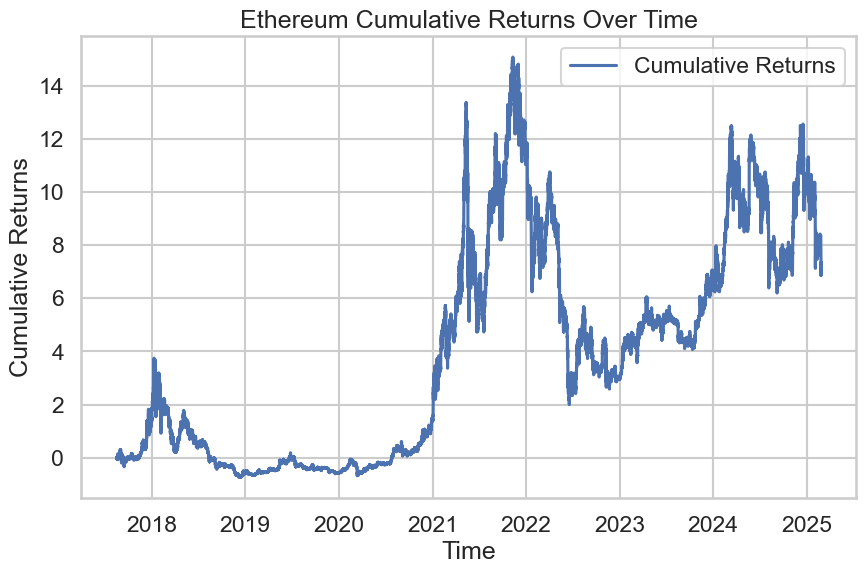

In [49]:
plot_cumulative_returns(btc_price_processed, title= 'Bitcoin Cumulative Returns Over Time')
plot_cumulative_returns(eth_price_processed, title= 'Ethereum Cumulative Returns Over Time')

In [55]:
btc_chain_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/btc_chain_processed.parquet')
eth1_chain_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/eth1_chain_processed.parquet')
eth2_chain_processed = pd.read_parquet('../Crypto_QTS_Data_Processed/eth2_chain_processed.parquet')
btc_chain_processed

average_height  average_difficulty  \
2015-01-01 01:00:00+00:00        336868.0        4.064096e+10   
2015-01-01 02:00:00+00:00        336879.0        4.064096e+10   
2015-01-01 03:00:00+00:00        336886.5        4.064096e+10   
2015-01-01 04:00:00+00:00        336892.5        4.064096e+10   
2015-01-01 05:00:00+00:00        336898.0        4.064096e+10   
...                                   ...                 ...   
2025-02-23 19:00:00+00:00        885009.0        1.141673e+14   
2025-02-23 20:00:00+00:00        885015.5        1.141673e+14   
2025-02-23 21:00:00+00:00        885021.5        1.135675e+14   
2025-02-23 22:00:00+00:00        885030.5        1.105684e+14   
2025-02-23 23:00:00+00:00        885039.0        1.105684e+14   

                           average_total_fees  average_total_reward  \
2015-01-01 01:00:00+00:00            0.023508             25.023508   
2015-01-01 02:00:00+00:00            0.043085             25.043085   
2015-01-01 03:00:00+00:00            0.029944             25.029944   
2015-01-01 04:00:00+00:00            0.074818             25.074818   
2015-01-01 05:00:00+00:00            0.032928             25.032928   
...                                       ...                   ...   
2025-02-23 19:00:00+00:00            0.144594              3.269594   
2025-02-23 20:00:00+00:00            0.134470              3.259470   
2025-02-23 21:00:00+00:00            0.104493              3.229493   
2025-02-23 22:00:00+00:00            0.105299              3.230299   
2025-02-23 23:00:00+00:00            0.120435              3.245435   

                           average_mint_reward  average_transaction_count  \
2015-01-01 01:00:00+00:00               25.000                 177.733333   
2015-01-01 02:00:00+00:00               25.000                 309.571429   
2015-01-01 03:00:00+00:00               25.000                 228.750000   
2015-01-01 04:00:00+00:00               25.000                 497.000000   
2015-01-01 05:00:00+00:00               25.000                 246.571429   
...                                        ...                        ...   
2025-02-23 19:00:00+00:00                3.125                4950.428571   
2025-02-23 20:00:00+00:00                3.125                4285.500000   
2025-02-23 21:00:00+00:00                3.125                4641.666667   
2025-02-23 22:00:00+00:00                3.125                4720.500000   
2025-02-23 23:00:00+00:00                3.125                4863.400000   

                           average_nonce  average_size  average_stripped_size  \
2015-01-01 01:00:00+00:00   1.982945e+09  1.031537e+05          103153.666667   
2015-01-01 02:00:00+00:00   2.230371e+09  1.685779e+05          168577.857143   
2015-01-01 03:00:00+00:00   2.312130e+09  1.555785e+05          155578.500000   
2015-01-01 04:00:00+00:00   1.882359e+09  2.576930e+05          257693.000000   
2015-01-01 05:00:00+00:00   2.118612e+09  1.304986e+05          130498.571429   
...                                  ...           ...                    ...   
2025-02-23 19:00:00+00:00   2.168669e+09  1.791300e+06          734046.000000   
2025-02-23 20:00:00+00:00   1.526729e+09  1.684308e+06          769134.166667   
2025-02-23 21:00:00+00:00   2.014081e+09  1.765027e+06          743049.666667   
2025-02-23 22:00:00+00:00   2.281051e+09  1.770697e+06          740930.833333   
2025-02-23 23:00:00+00:00   2.271636e+09  1.741509e+06          750635.200000   

                           average_version  average_weight  
2015-01-01 01:00:00+00:00     2.000000e+00    4.126147e+05  
2015-01-01 02:00:00+00:00     2.000000e+00    6.743114e+05  
2015-01-01 03:00:00+00:00     2.000000e+00    6.223140e+05  
2015-01-01 04:00:00+00:00     2.000000e+00    1.030772e+06  
2015-01-01 05:00:00+00:00     2.000000e+00    5.219943e+05  
...                                    ...             ...  
2025-02-23 19:00:00+00:00     6.399871e+08    3.993438e+06  
2025-02

In [ ]:
#drop average_number for eth1 and eth 2
eth1_chain_processed = eth1_chain_processed.drop(columns=['average_number'])
eth2_chain_processed = eth2_chain_processed.drop(columns=['average_number'])

In [ ]:
#drop average_height, average_total_reward, average_nonce, average_version, average_stripped_size, average_size
btc_chain_processed = btc_chain_processed.drop(columns=['average_height', 'average_total_reward', 'average_nonce', 'average_version', 'average_stripped_size', 'average_size'])

In [65]:
eth2_chain_processed = eth2_chain_processed.drop(columns=['average_gas_limit'])

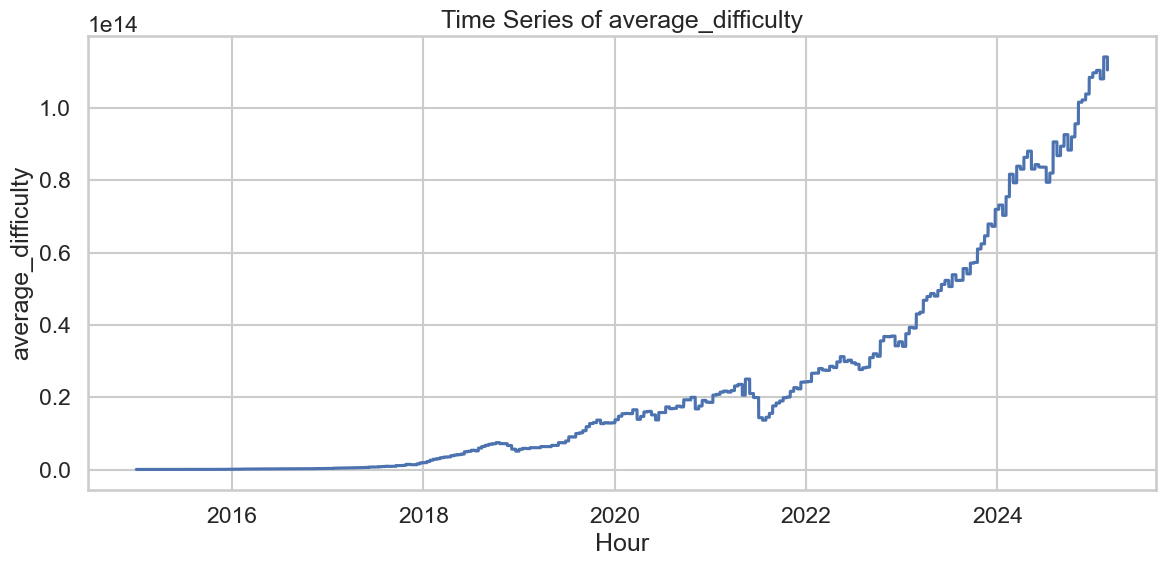

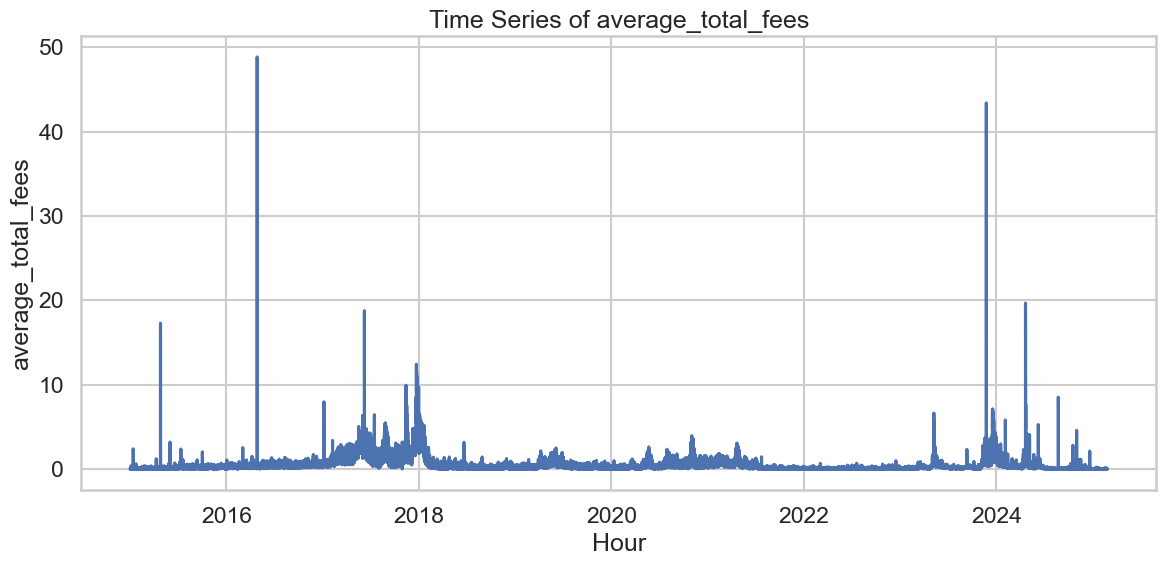

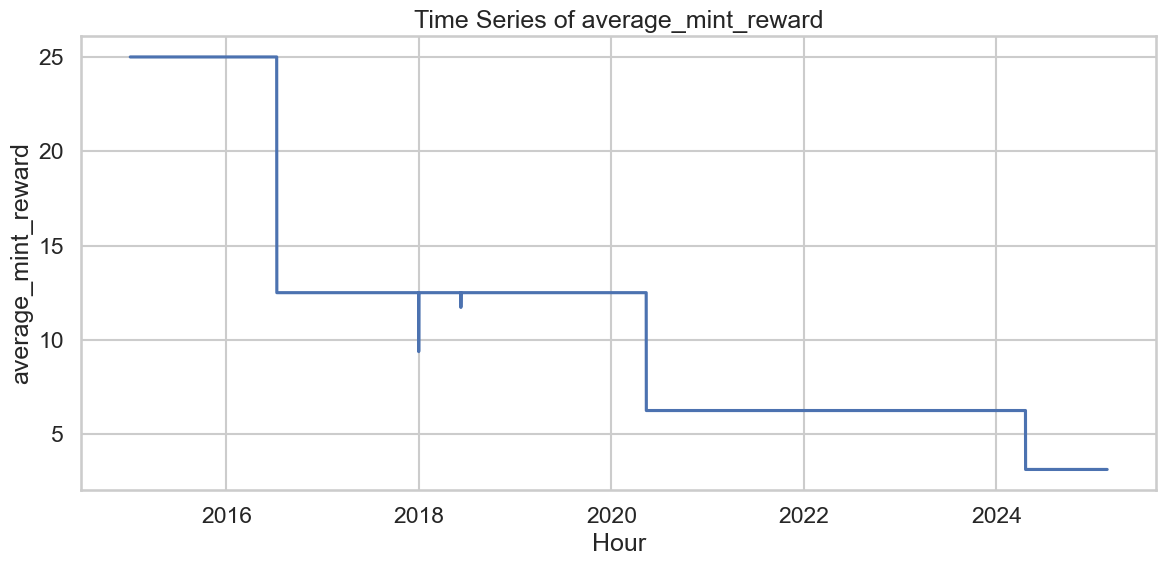

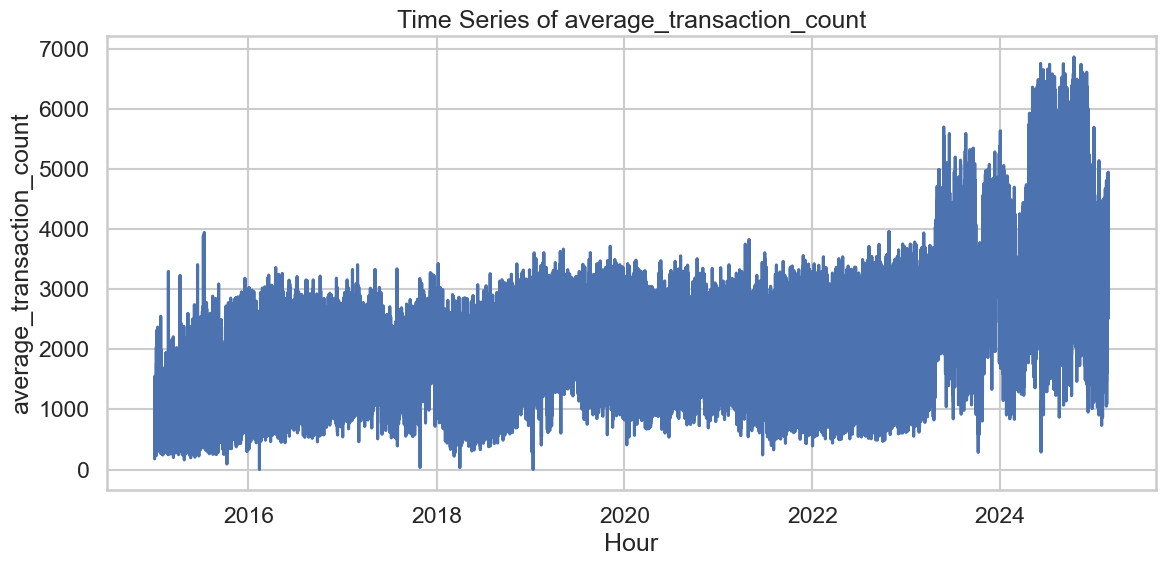

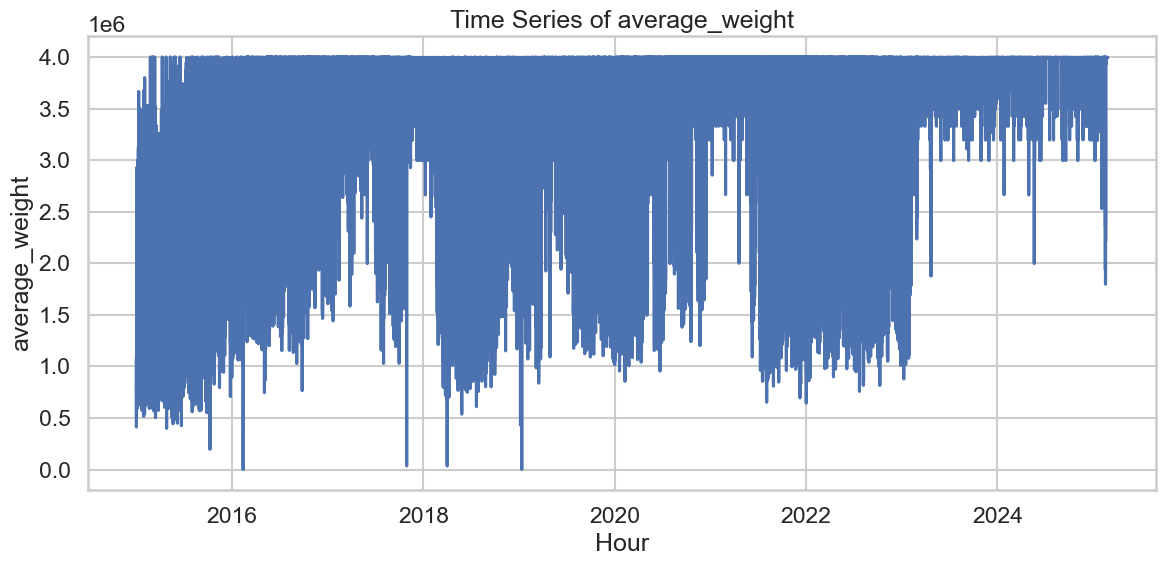

In [67]:
metrics = [col for col in btc_chain_processed.columns if col != 'hour']

for col in metrics:
    plt.figure(figsize=(12, 6))
    plt.plot(btc_chain_processed.index, btc_chain_processed[col], linestyle='-')
    plt.title(f'Time Series of {col}')
    plt.xlabel('Hour')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

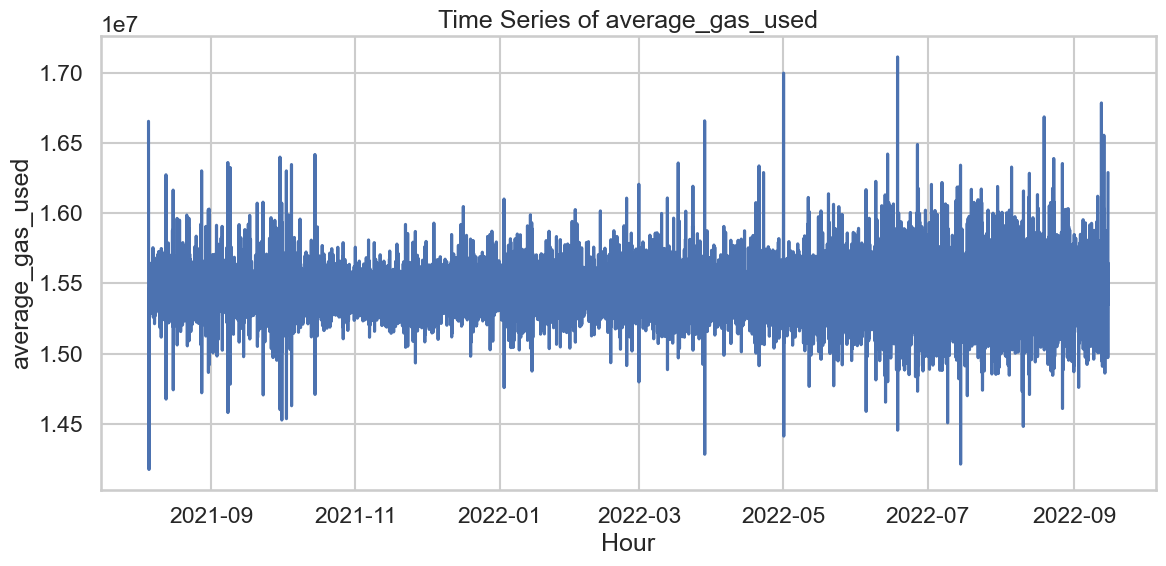

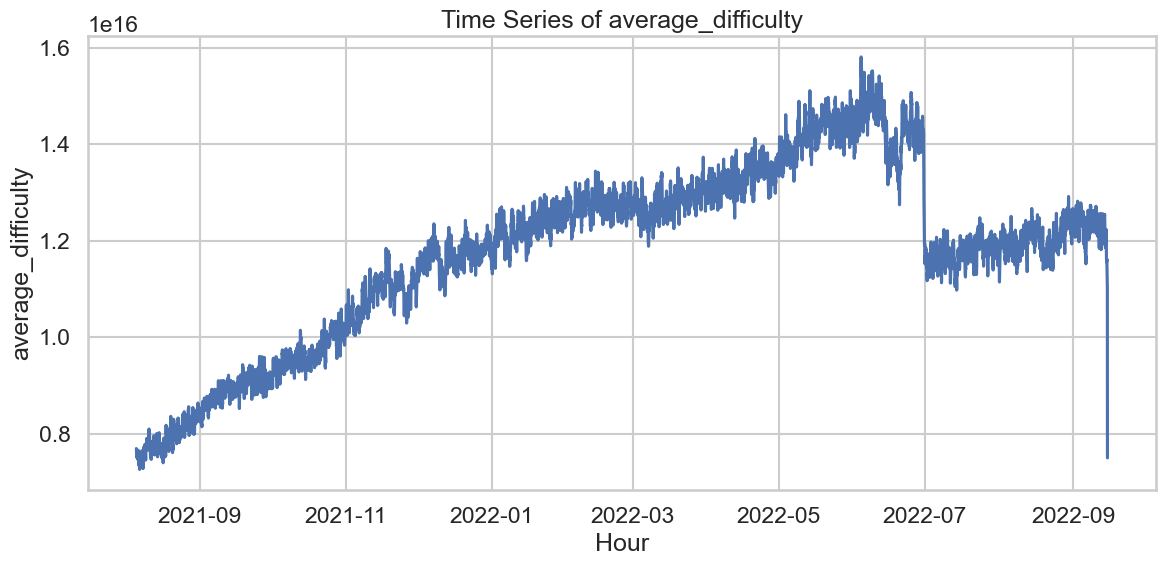

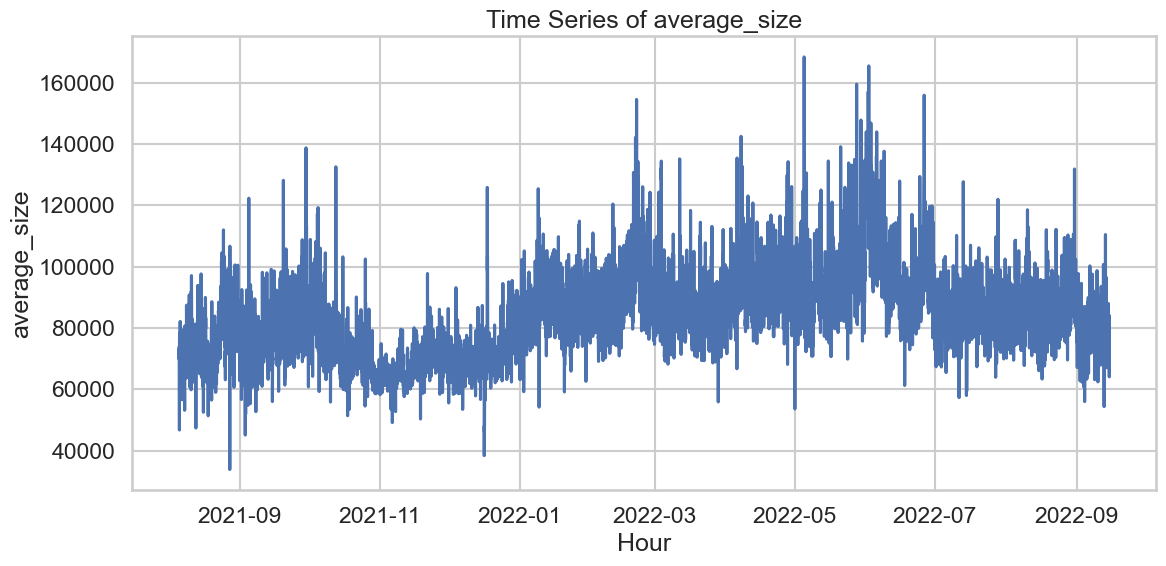

In [68]:
metrics_eth_2 = [col for col in eth2_chain_processed.columns if col != 'hour']

for col in metrics_eth_2:
    plt.figure(figsize=(12, 6))
    plt.plot(eth2_chain_processed.index, eth2_chain_processed[col], linestyle='-')
    plt.title(f'Time Series of {col}')
    plt.xlabel('Hour')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()